In [78]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
from tabulate import tabulate

from astropy.io import fits


Prof. Eikenberry's path, then Aatiya's in the next block:

In [79]:
# filename_nl1 = 'D:/Evryscope/TFAW_data/29984014_noise_level_1.dat' # noise level 1  !!!
# filename_nl2 = 'D:/Evryscope/TFAW_data/29984014_noise_level_2.dat' # noise level 2  !!!
# filename_nl3 = 'D:/Evryscope/TFAW_data/29984014_noise_level_3.dat' # noise level 3  !!!
# filename_nl4 = 'D:/Evryscope/TFAW_data/29984014_noise_level_4.dat' # noise level 4  !!!


# for line in open(filename_nl1, 'r'):
#     item = line.rstrip() 
# #     print(item)

# for line in open(filename_nl2, 'r'):
#     item = line.rstrip()
# #     print(item)

# for line in open(filename_nl3, 'r'):
#     item = line.rstrip()
# #     print(item)
    
# for line in open(filename_nl4, 'r'):
#     item = line.rstrip()
# #     print(item)

In [80]:
filename_nl1 = '404850274_noise_level_1.dat' # noise level 1  !!!
filename_nl2 = '404850274_noise_level_2.dat'
filename_nl3 = '404850274_noise_level_3.dat'
filename_nl4 = '404850274_noise_level_4.dat'

for line in open(filename_nl1, 'r'):
    item = line.rstrip() 
#     print(item)

for line in open(filename_nl2, 'r'):
    item = line.rstrip()
#     print(item)

for line in open(filename_nl3, 'r'):
    item = line.rstrip()
#     print(item)
    
for line in open(filename_nl4, 'r'):
    item = line.rstrip()
#     print(item)

In [81]:
# index 0 : MJD 
# index 1 : PHASE
# index 2 : RAW_MAGNITUDE  
# index 3 : FIRST_TFAW_MAGNITUDE 
# index 4 : FINAL_TFAW_MAGNITUDE

# FIRST_TFAW_MAGNITUDE == FINAL_TFAW_MAGNITUDE and MJD == PHASE
# as TFAW's iterative reconstruction step is not applied here)

# indices 0,2,4 work
# indices 1,2,3 work too 

times = [x.split(' ')[0] for x in open(filename_nl1).readlines()]
raw_m = [x.split(' ')[2] for x in open(filename_nl1).readlines()]
tfaw_m = [x.split(' ')[4] for x in open(filename_nl1).readlines()]
tfaw_m2 = [x.split(' ')[4] for x in open(filename_nl2).readlines()]
tfaw_m3 = [x.split(' ')[4] for x in open(filename_nl3).readlines()]
tfaw_m4 = [x.split(' ')[4] for x in open(filename_nl4).readlines()]

mjdnew = []
for i in times:
    mjd = float(i)
    mjdnew.append(mjd)

raw_magnitudenew = [] 
for i in raw_m:
    raw_mag = float(i)
    raw_magnitudenew.append(raw_mag)
    
tfaw_magnitudenew1 = []
for i in tfaw_m:
    tfaw_mag = float(i)
    tfaw_magnitudenew1.append(tfaw_mag)

tfaw_magnitudenew2 = []
for i in tfaw_m2:
    tfaw_mag = float(i)
    tfaw_magnitudenew2.append(tfaw_mag)
    
tfaw_magnitudenew3 = []
for i in tfaw_m3:
    tfaw_mag = float(i)
    tfaw_magnitudenew3.append(tfaw_mag)

tfaw_magnitudenew4 = []
for i in tfaw_m4:
    tfaw_mag = float(i)
    tfaw_magnitudenew4.append(tfaw_mag)
    
# converting from string to float:

mjd = mjdnew 
raw_magnitude = raw_magnitudenew
tfaw_magnitude1 = tfaw_magnitudenew1
tfaw_magnitude2 = tfaw_magnitudenew2
tfaw_magnitude3 = tfaw_magnitudenew3
tfaw_magnitude4 =tfaw_magnitudenew4

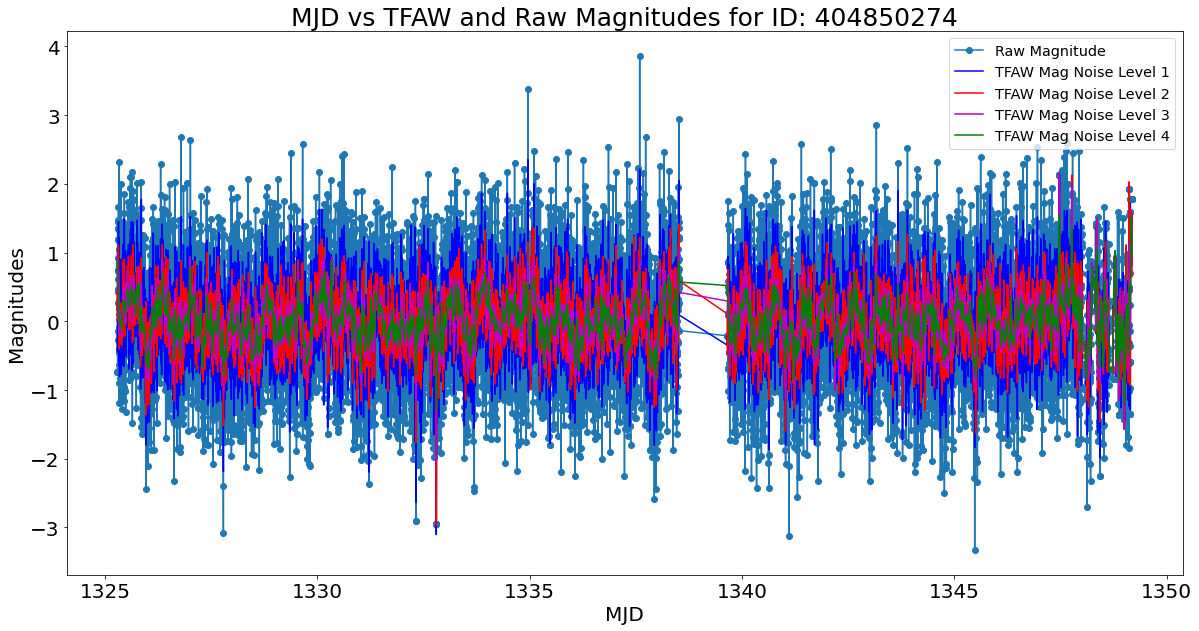

In [82]:
#this makes the pretty plot for TFAW

fig, ax = plt.subplots()
ax.plot(mjd, raw_magnitude, '-o', label='Raw Magnitude')
ax.plot(mjd,tfaw_magnitude1, '-b', label='TFAW Mag Noise Level 1') 
ax.plot(mjd,tfaw_magnitude2, '-r', label='TFAW Mag Noise Level 2') 
ax.plot(mjd,tfaw_magnitude3, '-m', label='TFAW Mag Noise Level 3') 
ax.plot(mjd,tfaw_magnitude4, '-g', label='TFAW Mag Noise Level 4') 
legend = ax.legend(loc='upper right', shadow=False, fontsize='x-large')

fig = plt.gcf()
fig.set_size_inches(20,10)

plt.title("MJD vs TFAW and Raw Magnitudes for ID: 404850274", fontsize = 25) # !!!
plt.xlabel("MJD", fontsize = 20)
plt.ylabel("Magnitudes", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig('404850274_april10.pdf') # !!!
plt.show()


In [83]:
# these are codes needed to generate time series

def lc_correct(t,dt_nom):
    # patches over the occasional irregular time stamps
    dt0=(t[1:]-t[:-1])
    print (t.shape,dt0.shape)
    tnew=np.zeros(t.shape)
    tnew[:]=t[:]
    
    for i in range(5,len(t)-10):
        t1=t[i]
        t2=t[i+1]
        dt=t2-t1
        
        if dt<0.9*dt_nom: # found a weirdness
            j=[k for k in range(i-5,i,1) if dt0[k]>0.9*dt_nom and dt0[k]<1.1*dt_nom]
            a=np.max(j)-5
            j=[k for k in range(i,i+6,1) if dt0[k]>0.9*dt_nom and dt0[k]<1.1*dt_nom]
            b=np.min(j)
            dt2=(t[b]-t[a])/(b-a)
            if dt2>0.9*dt_nom and dt2<1.1*dt_nom:
                tnew[a:b]=t[a]+np.arange(b-a)*dt2
            else:
                tnew[a:i]=t[a]+np.arange(i-a)*dt_nom

    return tnew

def lc_2_timeseries(t,flux,dt_nom,dt_new):
    # takes a lightcurve (time, flux), and resamples to a time series with constant dt_new and no gaps
    # dt_nom = nominal exposure spacing of the input light curve (i.e. if there are no gaps); 5% accuracy OK
    
    tspan=np.max(t)-np.min(t)
    nel=(tspan/dt_new).astype('int')
    fnew=np.zeros(nel)
    tnew=np.arange(nel)*dt_new
    ifl=0
    
    for i in range(len(t)-3):
        t1=t[i]
        t2=t[i+1]
        dt=t2-t1
        if dt>1.9*dt_nom: # last bin before a gap
            print ('gap ',i,t1,t2, dt, t[i],flux[i])
            dt=dt_nom
            t2=t1+dt_nom
            print (dt,t2)
        if dt>0.0:
            ta=np.max(tnew[tnew<=t1]) # ta = new time bin that starts at/before the start of time bin in question
            a=np.min(np.where(tnew==ta)) # index of ta
            #print t2, np.max(tnew)
            tb=np.min(tnew[tnew>=t2]) # tb = new time bin that starts at/before the end of time bin in question
            b=np.min(np.where(tnew==tb)) # index of tb

            if ta==t1: #exact match of start time
                if b==(a+1):
                    fnew[a]=fnew[a]+flux[i]
                else:
                    fnew[a]=fnew[a]+(dt_new/dt)*flux[i] # true as long as the time bins are close in size; i.e. tb-ta < 2*dt
                    fnew[a+1]=fnew[a+1]+((t2-(ta+dt_new))/dt)*flux[i]
            else: # output bin starts BEFORE the input bin start time
                if b==(a+1):
                    fnew[a]=fnew[a]+flux[i]
                else:
                    fnew[a]=fnew[a]+(((ta+dt_new)-t1)/dt)*flux[i]
                    if b==(a+2):
                        fnew[a+1]=fnew[a+1]+((t2-(ta+dt_new))/dt)*flux[i]
                    else:
                        fnew[a+1]=fnew[a+1]+(dt_new/dt)*flux[i]
                        fnew[a+2]=fnew[a+2]+((t2-(ta+2*dt_new))/dt)*flux[i]
            print (i,t1,t2,ta,tb,dt,dt_new,a,b,flux[i],fnew[a])
#        else:
#            print t1,t2,ta,tb,dt,dt_new,a,b,flux[i],fnew[a]

            
 
    return tnew, fnew

            
def ts_sig_filter(t,f,nsig,wlen):
    #wlen = number of bins to calculate over
    # nsig = sigma chop limit
    # NOTE: no need to use this code for TFAW-cleaned data; just including it for completeness
    
    f_filt=np.zeros(f.shape)
    f_filt[:]=f[:]
    
    nsegs=np.int(len(t)/wlen)
    for i in range(nsegs):
        i1=i*wlen
        i2=i1+wlen
        b1=np.mean(f[i1:i2])
        b2=np.mean(f[i1:i2]**2)
        sd=(b2-b1**2)**0.5
        j=[k for k in range(i1,i2,1) if np.abs(f[k]-b1)>nsig*sd]
        if len(j)>0:
            f_filt[j]=b1
        
    return f_filt
               

In [84]:
ts=np.array(mjd)*24.*3600.0 # convert mjd to seconds
ts=ts-ts[0] # start at time=0
dt=ts[1:]-ts[:-1] # get delta-t array
tdum=lc_correct(ts,np.median(dt)) # prep for conversion
flux4=np.array(tfaw_magnitude4)-np.min(tfaw_magnitude4)+1.0 # prep the fluxes
t1,f1 = lc_2_timeseries(tdum,flux4,np.median(dt),120.0) # convert to time series with 120s spacing
# for some reason this one only has 16383 data points, so pad to 16384 (a power of 2)

# f1.astype('float32').tofile('D:/Evryscope/TFAW_data/29984014_tfaw4_ts.dat') # write the data to the output .dat file

f1.astype('float32').tofile('404850274_tfaw4_ts.dat')

(16384,) (16383,)
0 0.0 119.99978806078434 0.0 120.0 119.99978806078434 120.0 0 1 3.184887751250598 3.184887751250598
1 119.99978806078434 239.99957610666752 0.0 240.0 119.99978804588318 120.0 0 2 3.1235363311392317 3.184893267925676
2 239.99957610666752 359.99936655163765 120.0 360.0 119.99979044497013 120.0 1 3 3.067617743336812 3.1235416506723097
3 359.99936655163765 479.9991571456194 240.0 480.0 119.99979059398174 120.0 2 4 3.0177933760700264 3.067622837292054
4 479.9991571456194 599.9989476948977 360.0 600.0 119.99979054927826 120.0 3 5 2.97440387176173 3.0177983375208677
5 599.9989476948977 719.998740658164 480.0 720.0 119.99979296326637 120.0 4 6 2.937484083706792 2.9744087396043444
6 719.998740658164 839.9985312372446 600.0 840.0 119.99979057908058 120.0 5 7 2.9068095427499023 2.9374888298603956
7 839.9985312372446 959.9983243048191 720.0 960.0 119.9997930675745 120.0 6 8 2.8819550256482334 2.9068143114353093
8 959.9983243048191 1079.9981173276901 840.0 1080.0 119.9997930228710

116 13919.979167118669 14039.979017972946 13800.0 14040.0 119.99985085427761 120.0 115 117 2.589473131412907 2.588619471086681
117 14039.979017972946 14159.97886891663 13920.0 14160.0 119.99985094368458 120.0 116 118 2.588373735806087 2.5894761575937677
118 14159.97886891663 14279.978719741106 14040.0 14280.0 119.99985082447529 120.0 117 119 2.5851610463156187 2.5883763851918515
119 14279.978719741106 14399.978570610285 14160.0 14400.0 119.99985086917877 120.0 118 120 2.5797792249040032 2.585163305619945
120 14399.978570610285 14519.978424057364 14280.0 14520.0 119.99985344707966 120.0 119 121 2.5722611065627836 2.579781088362339
121 14519.978424057364 14639.978277474642 14400.0 14640.0 119.99985341727734 120.0 120 122 2.5627139854814116 2.572262531433307
122 14639.978277474642 14759.97812832892 14520.0 14760.0 119.99985085427761 120.0 121 123 2.5513203459745277 2.5627150534173326
123 14759.97812832892 14879.977984249592 14640.0 14880.0 119.99985592067242 120.0 122 124 2.53834121422565

203 24359.967836111784 24479.967722192407 24240.0 24480.0 119.99988608062267 120.0 202 204 2.5289562221348807 2.539474799143085
204 24479.967722192407 24599.967610791326 24360.0 24600.0 119.99988859891891 120.0 203 205 2.5199815837375055 2.5289562089161994
205 24599.967610791326 24719.967501953244 24480.0 24720.0 119.99989116191864 120.0 204 206 2.5128601355664215 2.5199820009784224
206 24719.967501953244 24839.96739049256 24600.0 24840.0 119.99988853931427 120.0 205 207 2.507853486304561 2.512861058820053
207 24839.96739049256 24959.967281609774 24720.0 24960.0 119.99989111721516 120.0 206 208 2.5051572189610045 2.50785508298408
208 24959.967281609774 25079.967170253396 24840.0 25080.0 119.9998886436224 120.0 207 209 2.5048997566295044 2.505159421849927
209 25079.967170253396 25199.967061325908 24960.0 25200.0 119.99989107251167 120.0 208 210 2.507151773236103 2.5049026971991637
210 25199.967061325908 25319.96695239842 25080.0 25320.0 119.99989107251167 120.0 209 211 2.511930691166740

290 34799.959517493844 34919.95943631232 34680.0 34920.0 119.99991881847382 120.0 289 291 2.720201050466261 2.7303009677125174
291 34919.95943631232 35039.95935763419 34800.0 35040.0 119.9999213218689 120.0 290 292 2.706862146243967 2.7201983817364326
292 35039.95935763419 35159.959278836846 34920.0 35160.0 119.9999212026596 120.0 291 293 2.690510469598993 2.706858382909329
293 35159.959278836846 35279.95919767022 35040.0 35280.0 119.99991883337498 120.0 292 294 2.6714392132754585 2.6905057646248776
294 35279.95919767022 35399.95911897719 35160.0 35400.0 119.99992130696774 120.0 293 295 2.650015010313497 2.6714337355391
295 35399.95911897719 35519.95904017985 35280.0 35520.0 119.9999212026596 120.0 294 296 2.626665648123498 2.6500087935761014
296 35519.95904017985 35639.958964034915 35400.0 35640.0 119.9999238550663 120.0 295 297 2.601866031110552 2.6266589079862297
297 35639.958964034915 35759.95888532698 35520.0 35760.0 119.99992129206657 120.0 296 298 2.5761328531754266 2.6018588822

394 47279.9528054744 47399.95275694132 47160.0 47400.0 119.99995146691799 120.0 393 395 2.2671106210674212 2.2402228869586427
395 47399.95275694132 47519.95270588994 47280.0 47520.0 119.99994894862175 120.0 394 396 2.2957157642925194 2.267122799627361
396 47519.95270588994 47639.952657327056 47400.0 47640.0 119.99995143711567 120.0 395 397 2.325166756370721 2.295728348094824
397 47639.952657327056 47759.952608808875 47520.0 47760.0 119.99995148181915 120.0 396 398 2.35458906406962 2.3251793051045775
398 47759.952608808875 47879.95256026089 47640.0 47880.0 119.99995145201683 120.0 397 399 2.3831180762524835 2.354601282943519
399 47879.95256026089 47999.95251171291 47760.0 48000.0 119.99995145201683 120.0 398 400 2.409932422413977 2.3831296409335163
400 47999.95251171291 48119.95246319473 47880.0 48120.0 119.99995148181915 120.0 399 401 2.434273835437774 2.409943030162767
401 48119.95246319473 48239.95241463184 48000.0 48240.0 119.99995143711567 120.0 400 402 2.455465907260275 2.43428321

482 57839.94935685396 57959.94932848215 57720.0 57960.0 119.99997162818909 120.0 481 483 1.8079348539722069 1.8273519166502052
483 57959.94932848215 58079.94929997623 57840.0 58080.0 119.99997149407864 120.0 482 484 1.7887950516510898 1.807927199400832
484 58079.94929997623 58199.94926904142 57960.0 58200.0 119.99996906518936 120.0 483 485 1.7701184568969905 1.788787585726563
485 58199.94926904142 58319.94924069941 58080.0 58320.0 119.99997165799141 120.0 484 486 1.7521004517989005 1.7701112959425478
486 58319.94924069941 58439.94921477139 58200.0 58440.0 119.99997407197952 120.0 485 487 1.734946650085435 1.7520936096414268
487 58439.94921477139 58559.949186339974 58320.0 58560.0 119.99997156858444 120.0 486 488 1.7188581790407047 1.7349402161579892
488 58559.949186339974 58679.94915789366 58440.0 58680.0 119.99997155368328 120.0 487 489 1.7040066698889784 1.7188522974563532
489 58679.94915789366 58799.94912955165 58560.0 58800.0 119.99997165799141 120.0 488 490 1.6905327189961827 1.70

550 65999.94783693552 66119.94782106578 65880.0 66120.0 119.99998413026333 120.0 549 551 2.06532600441166 2.0293374704286165
551 66119.94782106578 66239.94780527055 66000.0 66240.0 119.99998420476913 120.0 550 552 2.0983074515329267 2.0653406186875225
552 66239.94780527055 66359.94779196382 66120.0 66360.0 119.99998669326305 120.0 551 553 2.1276879235400066 2.098320506924104
553 66359.94779196382 66479.94777603447 66240.0 66480.0 119.99998407065868 120.0 552 554 2.1529961806812405 2.1276991702866264
554 66479.94777603447 66599.94776023924 66360.0 66600.0 119.99998420476913 120.0 553 555 2.173871939493919 2.1530055516040902
555 66599.94776023924 66719.94774441421 66480.0 66720.0 119.99998417496681 120.0 554 556 2.1900611622616726 2.1738792733112327
556 66719.94774441421 66839.94773104787 66600.0 66840.0 119.99998663365841 120.0 555 557 2.2014192894914992 2.190066397104242
557 66839.94773104787 66959.94771526754 66720.0 66960.0 119.9999842196703 120.0 556 558 2.207932742839983 2.20142237

724 86879.94748663902 86999.94749598205 86760.0 87000.0 120.00000934302807 120.0 723 725 2.619684617025056 2.616512447105653
725 86999.94749598205 87119.94750523567 86880.0 87120.0 120.0000092536211 120.0 724 726 2.6190996077924145 2.6196841570999276
726 87119.94750523567 87239.94751703739 87000.0 87240.0 120.00001180171967 120.0 725 727 2.614687548451565 2.6190974757168686
727 87239.94751703739 87359.94752639532 87120.0 87360.0 120.00000935792923 120.0 726 728 2.606497060803438 2.614683709151271
728 87359.94752639532 87479.94753822684 87240.0 87480.0 120.00001183152199 120.0 727 729 2.5947056596052507 2.6064917013743
729 87479.94753822684 87599.94754749537 87360.0 87600.0 120.00000926852226 120.0 728 730 2.5796103407600963 2.5946988044090964
730 87599.94754749537 87719.94755931199 87480.0 87720.0 120.00001181662083 120.0 729 731 2.5616057110207016 2.579602271594438
731 87719.94755931199 87839.94757117331 87600.0 87840.0 120.00001186132431 120.0 730 732 2.541172701201071 2.561596529432

799 95879.9485565126 95999.94857339561 95760.0 96000.0 120.00001688301563 120.0 798 800 2.5435950594430197 2.5632335289532344
800 95999.94857339561 96119.94859267771 95880.0 96120.0 120.00001928210258 120.0 799 801 2.5237849633804634 2.543586211843239
801 96119.94859267771 96239.94861206412 96000.0 96240.0 120.00001938641071 120.0 800 802 2.5043419752919993 2.5237762285823058
802 96239.94861206412 96359.94862894714 96120.0 96360.0 120.00001688301563 120.0 801 803 2.4858080218261778 2.504333633883768
803 96359.94862894714 96479.94864836335 96240.0 96480.0 120.00001941621304 120.0 802 804 2.4687236421671104 2.485800358384061
804 96479.94864836335 96599.94866771996 96360.0 96600.0 120.00001935660839 120.0 803 805 2.4536098727913043 2.46871677508493
805 96599.94866771996 96719.94868701696 96480.0 96720.0 120.00001929700375 120.0 804 806 2.4409284833926557 2.453604052307784
806 96719.94868701696 96839.94870641828 96600.0 96840.0 120.00001940131187 120.0 805 807 2.4310467619957374 2.44092386

872 104639.95013830066 104759.95016522706 104520.0 104760.0 120.00002692639828 120.0 871 873 2.1699891991395353 2.1950659777242634
873 104759.95016522706 104879.95018962026 104640.0 104880.0 120.00002439320087 120.0 872 874 2.1503477781502323 2.16998055536242
874 104879.95018962026 104999.95021405816 104760.0 105000.0 120.00002443790436 120.0 873 875 2.136305987687103 2.1503415124780045
875 104999.95021405816 105119.95023840666 104880.0 105120.0 120.00002434849739 120.0 874 876 2.12784163468959 2.136302040916669
876 105119.95023840666 105239.95026533306 105000.0 105240.0 120.00002692639828 120.0 875 877 2.1247589386523984 2.1278399245908997
877 105239.95026533306 105359.95028972626 105120.0 105360.0 120.00002439320087 120.0 876 878 2.126700605679033 2.124759266638077
878 105359.95028972626 105479.95031659305 105240.0 105480.0 120.00002686679363 120.0 877 879 2.1331543301760876 2.126702846821832
879 105479.95031659305 105599.95034100115 105360.0 105600.0 120.00002440810204 120.0 878 880

987 118439.95350396633 118559.95353588462 118320.0 118560.0 120.00003191828728 120.0 986 988 2.3981648870622747 2.4237155476114336
988 118559.95353588462 118679.9535702616 118440.0 118680.0 120.00003437697887 120.0 987 989 2.3691858014854583 2.3981530284392027
989 118679.9535702616 118799.95360223949 118560.0 118800.0 120.00003197789192 120.0 988 990 2.3378162037525696 2.3691729854433237
990 118799.95360223949 118919.95363670588 118680.0 118920.0 120.00003446638584 120.0 989 991 2.305074006639728 2.337802921045509
991 118919.95363670588 119039.95366863906 118800.0 119040.0 120.00003193318844 120.0 990 992 2.2719468806254994 2.3050605455766493
992 119039.95366863906 119159.95370312035 118920.0 119160.0 120.000034481287 120.0 991 993 2.239380102784008 2.2719337021635924
993 119159.95370312035 119279.95373754203 119040.0 119280.0 120.00003442168236 120.0 992 994 2.208258097323138 2.2393674522176554
994 119279.95373754203 119399.95376950502 119160.0 119400.0 120.00003196299076 120.0 993 99

1069 128279.95641170442 128399.9564486742 128160.0 128400.0 120.00003696978092 120.0 1068 1070 1.9344837382850584 1.8938021825424718
1070 128399.9564486742 128519.95648811758 128280.0 128520.0 120.00003944337368 120.0 1069 1071 1.9769201480195253 1.934498543636258
1071 128519.95648811758 128639.95652510226 128400.0 128640.0 120.00003698468208 120.0 1070 1072 2.0199751391750147 1.9769351099238877
1072 128639.95652510226 128759.95656204224 128520.0 128760.0 120.0000369399786 120.0 1071 1073 2.062583103789227 2.019989953077113
1073 128759.95656204224 128879.95660150051 128640.0 128880.0 120.00003945827484 120.0 1072 1074 2.1037448861099035 2.062597368702073
1074 128879.95660150051 128999.9566384852 128760.0 129000.0 120.00003698468208 120.0 1073 1075 2.142544310726912 2.103758226343702
1075 128999.9566384852 129119.95667800307 128880.0 129120.0 120.00003951787949 120.0 1074 1076 2.1781679078791516 2.1425565228049934
1076 129119.95667800307 129239.95671494305 129000.0 129240.0 120.00003693

1203 144359.96183244884 144479.9618744105 144240.0 144480.0 120.00004196166992 120.0 1202 1204 2.1744399631703732 2.187236135927694
1204 144479.9618744105 144599.96191893518 144360.0 144600.0 120.00004452466965 120.0 1203 1205 2.1638473647755396 2.1744358373888817
1205 144599.96191893518 144719.96196092665 144480.0 144720.0 120.00004199147224 120.0 1204 1206 2.156172605229899 2.163844126394479
1206 144719.96196092665 144839.96200548112 144600.0 144840.0 120.00004455447197 120.0 1205 1207 2.152111227675997 2.156170563283536
1207 144839.96200548112 144959.9620474279 144720.0 144960.0 120.00004194676876 120.0 1206 1208 2.1523129930160465 2.1521104925227257
1208 144959.9620474279 145079.96208937466 144840.0 145080.0 120.00004194676876 120.0 1207 1209 2.1573490837419085 2.1523138334325944
1209 145079.96208937466 145199.96213392913 144960.0 145200.0 120.00004455447197 120.0 1208 1210 2.167689679121579 2.1573515964312655
1210 145199.96213392913 145319.9621759057 145080.0 145320.0 120.00004197

1279 153479.9651747048 153599.96521925926 153360.0 153600.0 120.00004455447197 120.0 1278 1280 2.6285120090874603 2.6319346419958483
1280 153599.96521925926 153719.96526375413 153480.0 153720.0 120.00004449486732 120.0 1279 1281 2.6236916641702352 2.6285096360292903
1281 153719.96526375413 153839.9653082043 153600.0 153840.0 120.00004445016384 120.0 1280 1282 2.617743089315541 2.62368896940509
1282 153839.9653082043 153959.96535275877 153720.0 153960.0 120.00004455447197 120.0 1281 1283 2.6109711614009123 2.6177401619038947
1283 153959.96535275877 154079.96539977193 153840.0 154080.0 120.00004701316357 120.0 1282 1284 2.6037169414571606 2.6109680974770657
1284 154079.96539977193 154199.9654442519 153960.0 154200.0 120.00004447996616 120.0 1283 1285 2.5963440333807974 2.603713795530268
1285 154199.9654442519 154319.96548880637 154080.0 154320.0 120.00004455447197 120.0 1284 1286 2.589218636125641 2.596341019142056
1286 154319.96548880637 154439.96553325653 154200.0 154440.0 120.00004445

1351 162119.96846216917 162239.96850924194 162000.0 162240.0 120.00004707276821 120.0 1350 1352 2.344394288971265 2.322798366569905
1352 162239.96850924194 162359.9685562849 162120.0 162360.0 120.00004704296589 120.0 1351 1353 2.3630453542863443 2.3443982637953305
1353 162359.9685562849 162479.96860070527 162240.0 162480.0 120.00004442036152 120.0 1352 1354 2.3783687729433876 2.363048443136658
1354 162479.96860070527 162599.96864776313 162360.0 162600.0 120.00004705786705 120.0 1353 1355 2.3900611965626197 2.378370951977624
1355 162599.96864776313 162719.9686947912 162480.0 162720.0 120.00004702806473 120.0 1354 1356 2.3978985454169806 2.3900623069559703
1356 162719.9686947912 162839.96874174476 162600.0 162840.0 120.00004695355892 120.0 1355 1357 2.4017565963848613 2.397898612155369
1357 162839.96874174476 162959.96878629923 162720.0 162960.0 120.00004455447197 120.0 1356 1358 2.4016245297692693 2.4017556222378174
1358 162959.96878629923 163079.9688332975 162840.0 163080.0 120.0000469

1419 170279.97164706886 170399.97169411182 170160.0 170400.0 120.00004704296589 120.0 1418 1420 2.3989380968131044 2.416292024237489
1420 170399.97169411182 170519.971741125 170280.0 170520.0 120.00004701316357 120.0 1419 1421 2.378065086714755 2.398932232796769
1421 170519.971741125 170639.97178812325 170400.0 170640.0 120.0000469982624 120.0 1420 1422 2.353639822997216 2.37805840312713
1422 170639.97178812325 170759.97183515131 170520.0 170760.0 120.00004702806473 120.0 1421 1423 2.3257203481426 2.3536323373519656
1423 170759.97183515131 170879.97188216448 170640.0 170880.0 120.00004701316357 120.0 1422 1424 2.294458616173897 2.3257120993452527
1424 170879.97188216448 170999.97192916274 170760.0 171000.0 120.0000469982624 120.0 1423 1425 2.2600933865320085 2.2944496649638615
1425 170999.97192916274 171119.9719762057 170880.0 171120.0 120.00004704296589 120.0 1424 1426 2.2229381392932135 2.260083809874227
1426 171119.9719762057 171239.97202570736 171000.0 171240.0 120.00004950165749 1

1552 186239.97799395025 186359.9780409634 186120.0 186360.0 120.00004701316357 120.0 1551 1553 2.239569895915469 2.2582893946442026
1553 186359.9780409634 186479.97809049487 186240.0 186480.0 120.00004953145981 120.0 1552 1554 2.219274719363352 2.2395653046438255
1554 186479.97809049487 186599.97813749313 186360.0 186600.0 120.0000469982624 120.0 1553 1555 2.1982276734143955 2.219269960588141
1555 186599.97813749313 186719.9781845808 186480.0 186720.0 120.00004708766937 120.0 1554 1556 2.1772801127175123 2.1982229960903434
1556 186719.9781845808 186839.97823411226 186600.0 186840.0 120.00004953145981 120.0 1555 1557 2.1572954570773377 2.1772756252389
1557 186839.97823411226 186959.97828105092 186720.0 186960.0 120.00004693865776 120.0 1556 1558 2.1391298277899375 2.1572912717121073
1558 186959.97828105092 187079.97833062708 186840.0 187080.0 120.00004957616329 120.0 1557 1559 2.123588493166226 2.1391261782050988
1559 187079.97833062708 187199.97837767005 186960.0 187200.0 120.000047042

1659 199079.98312328756 199199.98317027092 198960.0 199200.0 120.00004698336124 120.0 1658 1660 2.234517206692783 2.242373039087552
1660 199199.98317027092 199319.98321986198 199080.0 199320.0 120.00004959106445 120.0 1659 1661 2.2259335091871573 2.234515127966541
1661 199319.98321986198 199439.98326694965 199200.0 199440.0 120.00004708766937 120.0 1660 1662 2.2166256984768076 2.225931287754871
1662 199439.98326694965 199559.9833139181 199320.0 199560.0 120.00004696846008 120.0 1661 1663 2.2066374959570525 2.2166234359043875
1663 199559.9833139181 199679.98336090147 199440.0 199680.0 120.00004698336124 120.0 1662 1664 2.196065815753515 2.206635162272206
1664 199679.98336090147 199799.98341049254 199560.0 199800.0 120.00004959106445 120.0 1663 1665 2.1850626767703596 2.1960634302406388
1665 199799.98341049254 199919.9834574759 199680.0 199920.0 120.00004698336124 120.0 1664 1666 2.1738324841051875 2.18506022125333
1666 199919.9834574759 200039.98350445926 199800.0 200040.0 120.000046983

1750 209999.98744247854 210119.9874895513 209880.0 210120.0 120.00004707276821 120.0 1749 1751 1.836825740156553 1.8546756464252105
1751 210119.9874895513 210239.98753650486 210000.0 210240.0 120.00004695355892 120.0 1750 1752 1.8212272871752944 1.8368233934233453
1752 210239.98753650486 210359.98758351803 210120.0 210360.0 120.00004701316357 120.0 1751 1753 1.8081038627409984 1.8212252115356853
1753 210359.98758351803 210479.9876305908 210240.0 210480.0 120.00004707276821 120.0 1752 1754 1.7976403636273075 1.8081020717038516
1754 210479.9876305908 210599.98767757416 210360.0 210600.0 120.00004698336124 120.0 1753 1755 1.7899709755154285 1.797638867913798
1755 210599.98767757416 210719.98772461712 210480.0 210720.0 120.00004704296589 120.0 1754 1756 1.7851874707795246 1.789969783488843
1756 210719.98772461712 210839.9877716303 210600.0 210840.0 120.00004701316357 120.0 1755 1757 1.7833473210775173 1.785186582704456
1757 210839.9877716303 210959.98781862855 210720.0 210960.0 120.0000469

1821 218519.99075835943 218639.9908054024 218400.0 218640.0 120.00004704296589 120.0 1820 1822 1.872046931769699 1.8641218232513954
1822 218639.9908054024 218759.99084995687 218520.0 218760.0 120.00004455447197 120.0 1821 1823 1.877097333361435 1.8720465848542376
1823 218759.99084995687 218879.99089695513 218640.0 218880.0 120.0000469982624 120.0 1822 1824 1.8793686333371746 1.877096809603813
1824 218879.99089695513 218999.9909439683 218760.0 219000.0 120.00004701316357 120.0 1823 1825 1.8790053932505408 1.879367869723698
1825 218999.9909439683 219119.99098849297 218880.0 219120.0 120.00004452466965 120.0 1824 1826 1.8762051648918028 1.8790044457793091
1826 219119.99098849297 219239.99103547633 219000.0 219240.0 120.00004698336124 120.0 1825 1827 1.8712095719651178 1.876204093595688
1827 219239.99103547633 219359.9910824895 219120.0 219360.0 120.00004701316357 120.0 1826 1828 1.8642895962840784 1.87120832238223
1828 219359.9910824895 219479.99112696946 219240.0 219480.0 120.00004447996

1961 235319.99708989263 235439.9971344471 235200.0 235440.0 120.00004455447197 120.0 1960 1962 2.1070251832006273 2.119910581686703
1962 235439.9971344471 235559.99717900157 235320.0 235560.0 120.00004455447197 120.0 1961 1963 2.0973449475030512 2.107024169729154
1963 235559.99717900157 235679.99722343683 235440.0 235680.0 120.00004443526268 120.0 1962 1964 2.0906302146801465 2.097344010933886
1964 235679.99722343683 235799.9972654283 235560.0 235800.0 120.00004199147224 120.0 1963 1965 2.0865844919013945 2.0906293469238877
1965 235799.9972654283 235919.99730998278 235680.0 235920.0 120.00004455447197 120.0 1964 1966 2.0848725638584225 2.086583722732776
1966 235919.99730998278 236039.99735450745 235800.0 236040.0 120.00004452466965 120.0 1965 1967 2.085146806214645 2.084871795919723
1967 236039.99735450745 236159.9973989874 235920.0 236160.0 120.00004447996616 120.0 1966 1968 2.0870695855696724 2.0851460749334816
1968 236159.9973989874 236279.99744096398 236040.0 236280.0 120.000041976

2056 246720.00118733943 246840.001229316 246720.0 246960.0 120.00004197657108 120.0 2056 2058 2.2538239905326 2.2538233298463752
2057 246840.001229316 246960.00127129257 246840.0 247080.0 120.00004197657108 120.0 2057 2059 2.240011322383801 2.240010680318521
2058 246960.00127129257 247080.00131332874 246960.0 247200.0 120.00004203617573 120.0 2058 2060 2.225376316569001 2.225375692061433
2059 247080.00131332874 247200.00135535002 247080.0 247320.0 120.00004202127457 120.0 2059 2061 2.210072679094 2.210072072666177
2060 247200.00135535002 247320.0013972968 247200.0 247440.0 120.00004194676876 120.0 2060 2062 2.1943343975787233 2.1943338082926016
2061 247320.0013972968 247440.00143936276 247320.0 247560.0 120.00004206597805 120.0 2061 2063 2.178466262847977 2.178465683958036
2062 247440.00143936276 247560.00148130953 247440.0 247680.0 120.00004194676876 120.0 2062 2064 2.1628066914703994 2.1628061232793367
2063 247560.00148130953 247680.0015232563 247560.0 247800.0 120.00004194676876 120

2147 257640.00492818654 257760.00496771932 257640.0 257880.0 120.00003953278065 120.0 2147 2149 2.1572340693084033 2.1572333021317016
2148 257760.00496771932 257880.0050071329 257760.0 258000.0 120.00003941357136 120.0 2148 2150 2.1585793058107816 2.158578541143637
2149 257880.0050071329 258000.00504912436 257880.0 258120.0 120.00004199147224 120.0 2149 2151 2.1595433756320634 2.1595425797206818
2150 258000.00504912436 258120.00508864224 258000.0 258240.0 120.00003951787949 120.0 2150 2152 2.159800211435476 2.1597994893711707
2151 258120.00508864224 258240.0051280558 258120.0 258360.0 120.00003941357136 120.0 2151 2153 2.159056586929857 2.159055909329235
2152 258240.0051280558 258360.0051675141 258240.0 258480.0 120.00003945827484 120.0 2152 2154 2.1570809150935637 2.1570802902326687
2153 258360.0051675141 258480.00520706177 258360.0 258600.0 120.00003954768181 120.0 2153 2155 2.1537212364766605 2.1537206713644528
2154 258480.00520706177 258600.00524657965 258480.0 258720.0 120.0000395

2222 266640.0078588426 266760.007898286 266640.0 266880.0 120.00003944337368 120.0 2222 2224 2.491799918574272 2.4918003425402397
2223 266760.007898286 266880.00793530047 266760.0 267000.0 120.0000370144844 120.0 2223 2225 2.4676374427393677 2.467638271934264
2224 266880.00793530047 267000.00797477365 266880.0 267120.0 120.000039473176 120.0 2224 2226 2.4392039253018036 2.4392050031829458
2225 267000.00797477365 267120.0080117285 267000.0 267240.0 120.00003695487976 120.0 2225 2227 2.407540740883383 2.4075421036824785
2226 267120.0080117285 267240.0080512017 267120.0 267360.0 120.000039473176 120.0 2226 2228 2.373776533780344 2.3737780071929175
2227 267240.0080512017 267360.0080882013 267240.0 267480.0 120.00003699958324 120.0 2227 2229 2.3390724932212077 2.3390741004217874
2228 267360.0080882013 267480.00812517107 267360.0 267600.0 120.00003696978092 120.0 2228 2230 2.3045807005135046 2.3045823153189553
2229 267480.00812517107 267600.00816458464 267480.0 267720.0 120.00003941357136 12

2362 283440.01292562485 283560.01296006143 283440.0 283680.0 120.00003443658352 120.0 2362 2364 2.246272623123361 2.2462731107719174
2363 283560.01296006143 283680.0129945278 283560.0 283800.0 120.00003446638584 120.0 2363 2365 2.232269534962528 2.2322704061508354
2364 283680.0129945278 283800.0130289495 283680.0 283920.0 120.00003442168236 120.0 2364 2366 2.2147471820107576 2.214748444171796
2365 283800.0130289495 283920.0130608678 283800.0 284040.0 120.00003191828728 120.0 2365 2367 2.1937595074699656 2.1937612026837106
2366 283920.0130608678 284040.0130953193 283920.0 284160.0 120.00003445148468 120.0 2366 2368 2.169464830329655 2.169466851736462
2367 284040.0130953193 284160.01312975585 284040.0 284280.0 120.00003443658352 120.0 2367 2369 2.1421420584079596 2.142144425343649
2368 284160.01312975585 284280.01316419244 284160.0 284400.0 120.00003443658352 120.0 2368 2370 2.112200769120741 2.1122034389936424
2369 284280.01316419244 284400.0131986886 284280.0 284520.0 120.0000344961881

2426 291120.0150498152 291240.0150818229 291120.0 291360.0 120.00003200769424 120.0 2426 2428 1.858553572896243 1.8585524508925766
2427 291240.0150818229 291360.01511372626 291240.0 291480.0 120.00003190338612 120.0 2427 2429 1.8655543637871317 1.8655529879357164
2428 291360.01511372626 291480.01514565945 291360.0 291600.0 120.00003193318844 120.0 2428 2430 1.8748091037640855 1.8748074392459284
2429 291480.01514565945 291600.01517763734 291480.0 291720.0 120.00003197789192 120.0 2429 2431 1.8865389868448779 1.886537003642542
2430 291600.01517763734 291720.0152095109 291600.0 291840.0 120.0000318735838 120.0 2430 2432 1.9009196850519767 1.9009173612678454
2431 291720.0152095109 291840.0152414441 291720.0 291960.0 120.00003193318844 120.0 2431 2433 1.9180576242858491 1.9180549417086035
2432 291840.0152414441 291960.015273422 291840.0 292080.0 120.00003197789192 120.0 2432 2434 1.9379750207459563 1.9379719745615194
2433 291960.015273422 292080.0153053254 291960.0 292200.0 120.000031903386

2489 298680.0229602009 298800.02319326997 298680.0 298920.0 120.00023306906223 120.0 2489 2491 2.49489745586046 2.494893886530804
2490 298800.02319326997 298920.0234262943 298800.0 299040.0 120.00023302435875 120.0 2490 2492 2.4886729662429383 2.488669336623524
2491 298920.0234262943 299040.0236618966 298920.0 299160.0 120.00023560225964 120.0 2491 2493 2.483343297020354 2.483339461814218
2492 299040.0236618966 299160.02389502525 299040.0 299280.0 120.00023312866688 120.0 2492 2494 2.479280855428178 2.47927683987282
2493 299160.02389502525 299280.0241281092 299160.0 299400.0 120.0002330839634 120.0 2493 2495 2.4767763932341413 2.476772081136743
2494 299280.0241281092 299400.0243611336 299280.0 299520.0 120.00023302435875 120.0 2494 2496 2.4760287207809433 2.476024062997388
2495 299400.0243611336 299520.02459418774 299400.0 299640.0 120.00023305416107 120.0 2495 2497 2.4771349720058877 2.4771299365479034
2496 299520.02459418774 299640.0248298496 299520.0 299760.0 120.00023566186428 120.

2561 307320.03970885277 307440.039941892 307320.0 307560.0 120.00023303925991 120.0 2561 2563 2.390630881961674 2.390622327725732
2562 307440.039941892 307560.0401724428 307440.0 307680.0 120.00023055076599 120.0 2562 2564 2.4063471952889297 2.406337340920702
2563 307560.0401724428 307680.04040300846 307560.0 307800.0 120.00023056566715 120.0 2563 2565 2.4253013061395174 2.425290300959533
2564 307680.04040300846 307800.0406360924 307680.0 307920.0 120.0002330839634 120.0 2564 2566 2.4467656317197193 2.446753652383799
2565 307800.0406360924 307920.0408666432 307800.0 308040.0 120.00023055076599 120.0 2565 2567 2.469967213032853 2.469954610752611
2566 307920.0408666432 308040.04109722376 307920.0 308160.0 120.00023058056831 120.0 2566 2568 2.494116771290911 2.4941037545974396
2567 308040.04109722376 308160.0413303226 308040.0 308280.0 120.00023309886456 120.0 2567 2569 2.5184421954478413 2.5184289725463205
2568 308160.0413303226 308280.0415608734 308160.0 308400.0 120.00023055076599 120.

2688 322560.0688214451 322680.0690494925 322560.0 322800.0 120.00022804737091 120.0 2688 2690 1.968333783458635 1.9683233828616216
2689 322680.0690494925 322800.06927753985 322680.0 322920.0 120.00022804737091 120.0 2689 2691 1.9810963079367199 1.9810851993774765
2690 322800.06927753985 322920.0695030391 322800.0 323040.0 120.00022549927235 120.0 2690 2692 1.9942774011908824 1.9942660440061386
2691 322920.0695030391 323040.0697310865 322920.0 323160.0 120.00022804737091 120.0 2691 2693 2.0071938039011163 2.0071825084095027
2692 323040.0697310865 323160.0699566901 323040.0 323280.0 120.00022560358047 120.0 2692 2694 2.019221504691604 2.0192107192860833
2693 323160.0699566901 323280.07018467784 323160.0 323400.0 120.00022798776627 120.0 2693 2695 2.0298117695676945 2.029801739342397
2694 323280.07018467784 323400.0704101473 323280.0 323520.0 120.00022546947002 120.0 2694 2696 2.0385147260420347 2.0385058057252867
2695 323400.0704101473 323520.0706382543 323400.0 323640.0 120.000228106975

2776 333120.088653028 333240.0888786316 333120.0 333360.0 120.00022560358047 120.0 2776 2778 2.301511081668649 2.3015203273134817
2777 333240.0888786316 333360.08910161257 333240.0 333480.0 120.0002229809761 120.0 2777 2779 2.28004238015869 2.2800540442892347
2778 333360.08910161257 333480.08932456374 333360.0 333600.0 120.00022295117378 120.0 2778 2780 2.2561356545068882 2.256149213812229
2779 333480.08932456374 333600.089547649 333480.0 333720.0 120.00022308528423 120.0 2779 2781 2.2304892384578707 2.230504182311961
2780 333600.089547649 333720.0897731781 333600.0 333840.0 120.00022552907467 120.0 2780 2782 2.2038279759922643 2.2038437295473012
2781 333720.0897731781 333840.0899961442 333720.0 333960.0 120.00022296607494 120.0 2781 2783 2.1768956423316146 2.176911745827392
2782 333840.0899961442 333960.09021916986 333840.0 334080.0 120.00022302567959 120.0 2782 2784 2.1504411685698583 2.1504570118498214
2783 333960.09021916986 334080.09044218063 333960.0 334200.0 120.00022301077843 1

2904 348480.11697533727 348600.11719584465 348480.0 348720.0 120.00022050738335 120.0 2904 2906 2.3024293425993134 2.302450349346485
2905 348600.11719584465 348720.11741375923 348600.0 348840.0 120.0002179145813 120.0 2905 2907 2.272755376261304 2.2727802294926938
2906 348720.11741375923 348840.1176317632 348720.0 348960.0 120.00021800398827 120.0 2906 2908 2.2399926649415516 2.2400206521070647
2907 348840.1176317632 348960.1178522855 348840.0 349080.0 120.00022052228451 120.0 2907 2909 2.204951700607623 2.20498199800997
2908 348960.1178522855 349080.1180702597 348960.0 349200.0 120.00021797418594 120.0 2908 2910 2.1685431318610933 2.1685749496457727
2909 349080.1180702597 349200.1182882637 349080.0 349320.0 120.00021800398827 120.0 2909 2911 2.131737797802052 2.1317701384772327
2910 349200.1182882637 349320.11850619316 349200.0 349440.0 120.00021792948246 120.0 2910 2912 2.095506961029219 2.0955388693868495
2911 349320.11850619316 349440.11872421205 349320.0 349560.0 120.0002180188894

3038 364560.1459315121 364680.1461444646 364560.0 364800.0 120.00021295249462 120.0 3038 3040 2.065466002597191 2.065435330342158
3039 364680.1461444646 364800.1463574916 364680.0 364920.0 120.00021302700043 120.0 3039 3041 2.0927259438071393 2.0926890297355314
3040 364800.1463574916 364920.1465704441 364800.0 365040.0 120.00021295249462 120.0 3040 3042 2.124858550728033 2.1248155896220458
3041 364920.1465704441 365040.1467833668 364920.0 365160.0 120.0002129226923 120.0 3041 3043 2.1615567103814874 2.1615080512169094
3042 365040.1467833668 365160.1469963193 365040.0 365280.0 120.00021295249462 120.0 3042 3044 2.2023912932129486 2.202337436290264
3043 365160.1469963193 365280.1472093463 365160.0 365400.0 120.00021302700043 120.0 3043 3045 2.246832390474152 2.2467739629654875
3044 365280.1472093463 365400.1474247575 365280.0 365520.0 120.00021541118622 120.0 3044 3046 2.2942970245086265 2.2942346792170385
3045 365400.1474247575 365520.1476376802 365400.0 365640.0 120.0002129226923 120.0

3118 374160.1628651023 374280.1630755365 374160.0 374400.0 120.00021043419838 120.0 3118 3120 2.359270204286545 2.359261141530908
3119 374280.1630755365 374400.1632859856 374280.0 374520.0 120.00021044909954 120.0 3119 3121 2.365807010828258 2.3657939785582713
3120 374400.1632859856 374520.1634964347 374400.0 374640.0 120.00021044909954 120.0 3120 3122 2.375152677171987 2.3751357949925764
3121 374520.1634964347 374640.1637043208 374520.0 374760.0 120.00020788609982 120.0 3121 3123 2.387119742252312 2.387099302039544
3122 374640.1637043208 374760.1639147699 374640.0 374880.0 120.00021044909954 120.0 3122 3124 2.4014193609541126 2.4013956420160194
3123 374760.1639147699 374880.1641252786 374760.0 375000.0 120.00021050870419 120.0 3123 3125 2.4176612607993255 2.417634833963857
3124 374880.1641252786 375000.1643356681 374880.0 375120.0 120.0002103894949 120.0 3124 3126 2.4353570020024375 2.4353285296158687
3125 375000.1643356681 375120.1645435244 375000.0 375240.0 120.0002078562975 120.0 3

3198 383760.1795295477 383880.1797349751 383760.0 384000.0 120.00020542740822 120.0 3198 3200 1.754207223127657 1.7542340934580898
3199 383880.1797349751 384000.1799403876 383880.0 384120.0 120.00020541250706 120.0 3199 3201 1.735420179352896 1.7354453477414475
3200 384000.1799403876 384120.1801483184 384000.0 384240.0 120.0002079308033 120.0 3200 3202 1.7182045182605385 1.7182273559846115
3201 384120.1801483184 384240.1803536862 384120.0 384360.0 120.00020536780357 120.0 3201 3203 1.7029114048709129 1.7029314489938963
3202 384240.1803536862 384360.1805616319 384240.0 384480.0 120.00020794570446 120.0 3202 3204 1.6898542681048814 1.6898709640043559
3203 384360.1805616319 384480.1807670891 384360.0 384600.0 120.00020545721054 120.0 3203 3205 1.6793056918447902 1.679318688792149
3204 384480.1807670891 384600.18097253144 384480.0 384720.0 120.00020544230938 120.0 3204 3206 1.6714918071451466 1.671500716280038
3205 384600.18097253144 384720.18118040264 384600.0 384840.0 120.00020787119865 

3348 401760.2100198418 401880.2102202177 401760.0 402000.0 120.00020037591457 120.0 3348 3350 2.603328090241959 2.6032773875297237
3349 401880.2102202177 402000.2104180604 401880.0 402120.0 120.00019784271717 120.0 3349 3351 2.6284933215044237 2.628444902582516
3350 402000.2104180604 402120.21061843634 402000.0 402240.0 120.00020037591457 120.0 3350 3352 2.651979944812668 2.6519343332975494
3351 402120.21061843634 402240.21081888676 402120.0 402360.0 120.00020045042038 120.0 3351 3353 2.6734268803778036 2.6733847720379074
3352 402240.21081888676 402360.21101921797 402240.0 402480.0 120.00020033121109 120.0 3352 3354 2.6924642999736053 2.6924263597636116
3353 402360.21101921797 402480.2112170607 402360.0 402600.0 120.00019784271717 120.0 3353 3355 2.708736482217034 2.708703401782077
3354 402480.2112170607 402600.2114174813 402480.0 402720.0 120.00020042061806 120.0 3354 3356 2.7219291174471287 2.721901350592994
3355 402600.2114174813 402720.2116179466 402600.0 402840.0 120.0002004653215

3450 414000.2301749587 414120.23037031293 414000.0 414240.0 120.00019535422325 120.0 3450 3452 2.5842731763225593 2.58429090296243
3451 414120.23037031293 414240.23056566715 414120.0 414360.0 120.00019535422325 120.0 3451 3453 2.5754967557010833 2.5755094114521198
3452 414240.23056566715 414360.2307610363 414240.0 414480.0 120.00019536912441 120.0 3452 3454 2.5698496771262054 2.569856343392282
3453 414360.2307610363 414480.2309563607 414360.0 414600.0 120.00019532442093 120.0 3453 3455 2.5677174136754917 2.5677173345521673
3454 414480.2309563607 414600.2311517149 414480.0 414720.0 120.00019535422325 120.0 3454 3456 2.569389613330207 2.56938221212466
3455 414600.2311517149 414720.23134712875 414600.0 414840.0 120.0001954138279 120.0 3455 3457 2.5750584375662315 2.5750433245893833
3456 414720.23134712875 414840.2315424979 414720.0 414960.0 120.00019536912441 120.0 3456 3458 2.5848114465318335 2.584788435542698
3457 414840.2315424979 414960.231735304 414840.0 415080.0 120.00019280612469 1

3516 421920.2429627776 422040.24315564334 421920.0 422160.0 120.00019286572933 120.0 3516 3518 2.931955600132279 2.9320122548963043
3517 422040.24315564334 422160.2433459908 422040.0 422280.0 120.00019034743309 120.0 3517 3519 2.897458149796332 2.8975234556181393
3518 422160.2433459908 422280.2435388267 422160.0 422400.0 120.00019283592701 120.0 3518 3520 2.8595419912018833 2.859614285563797
3519 422280.2435388267 422400.24373167753 422280.0 422520.0 120.00019285082817 120.0 3519 3521 2.819058955239604 2.819136584559113
3520 422400.24373167753 422520.24392446876 422400.0 422640.0 120.00019279122353 120.0 3520 3522 2.776916683679117 2.7769978172240686
3521 422520.24392446876 422640.2441148162 422520.0 422760.0 120.00019034743309 120.0 3521 3523 2.7340579611968767 2.7341407432022646
3522 422640.2441148162 422760.2443076968 422640.0 422880.0 120.0001928806305 120.0 3522 3524 2.691446755242862 2.6915291127175793
3523 422760.2443076968 422880.24449804425 422760.0 423000.0 120.00019034743309

3592 431040.2574351877 431160.25762297213 431040.0 431280.0 120.00018778443336 120.0 3592 3594 2.3817274323142357 2.3817242578106805
3593 431160.25762297213 431280.257810846 431160.0 431400.0 120.00018787384033 120.0 3593 3595 2.3826117619331617 2.382606133162063
3594 431280.257810846 431400.2580011636 431280.0 431520.0 120.00019031763077 120.0 3594 3596 2.3846524095936683 2.3846442435233937
3595 431400.2580011636 431520.25818891823 431400.0 431640.0 120.00018775463104 120.0 3595 3597 2.387837931551217 2.3878273464915942
3596 431520.25818891823 431640.25837673247 431520.0 431760.0 120.00018781423569 120.0 3596 3598 2.392116012045367 2.3921030635147233
3597 431640.25837673247 431760.2585646063 431640.0 431880.0 120.00018787384033 120.0 3597 3599 2.397388517105078 2.3973734113044802
3598 431760.2585646063 431880.25875243545 431760.0 432000.0 120.00018782913685 120.0 3598 3600 2.4035458026907937 2.4035287734483832
3599 431880.25875243545 432000.2589427084 431880.0 432120.0 120.00019027292

3693 443160.27624078095 443280.2764235586 443160.0 443400.0 120.0001827776432 120.0 3693 3695 2.266229252401415 2.266195107911479
3694 443280.2764235586 443400.27660641074 443280.0 443520.0 120.00018285214901 120.0 3694 3696 2.2807842287010986 2.2807472255553773
3695 443400.27660641074 443520.2767916471 443400.0 443640.0 120.0001852363348 120.0 3695 3697 2.296251756388461 2.2962125584986235
3696 443520.2767916471 443640.27697438 443520.0 443760.0 120.00018273293972 120.0 3696 3698 2.3122479266285363 2.312207508828184
3697 443640.27697438 443760.27715723217 443640.0 443880.0 120.00018285214901 120.0 3697 3699 2.3283347448282354 2.328294066749613
3698 443760.27715723217 443880.2773426026 443760.0 444000.0 120.00018537044525 120.0 3698 3700 2.3440389050837527 2.343999013282184
3699 443880.2773426026 444000.27752532065 443880.0 444120.0 120.00018271803856 120.0 3699 3701 2.3588941690663496 2.3588562439202585
3700 444000.27752532065 444120.2777080685 444000.0 444240.0 120.00018274784088 120

3782 453840.2924003601 453960.29257817566 453840.0 454080.0 120.00017781555653 120.0 3782 3784 2.2746260472226005 2.2746161056719187
3783 453960.29257817566 454080.2927584201 453960.0 454200.0 120.0001802444458 120.0 3783 3785 2.2783893502122914 2.278376752615558
3784 454080.2927584201 454200.29293861985 454080.0 454320.0 120.00018019974232 120.0 3784 3786 2.2832432267078304 2.2832279562865625
3785 454200.29293861985 454320.2931164354 454200.0 454440.0 120.00017781555653 120.0 3785 3787 2.28918552171975 2.289167623464722
3786 454320.2931164354 454440.29329670966 454320.0 454560.0 120.00018027424812 120.0 3786 3788 2.2961987577971392 2.2961781776070884
3787 454440.29329670966 454560.2934744358 454440.0 454680.0 120.00017772614956 120.0 3787 3789 2.3042716190069914 2.304248474980825
3788 454560.2934744358 454680.29365469515 454560.0 454800.0 120.00018025934696 120.0 3788 3790 2.3134269788331956 2.3134011133168784
3789 454680.29365469515 454800.2938325256 454680.0 454920.0 120.00017783045

3873 464760.3085181266 464880.30869343877 464760.0 465000.0 120.00017531216145 120.0 3873 3875 2.5353541654052165 2.535377003295242
3874 464880.30869343877 465000.3088661581 464880.0 465120.0 120.0001727193594 120.0 3874 3876 2.5272533150089806 2.5272705162915705
3875 465000.3088661581 465120.309041366 465000.0 465240.0 120.00017520785332 120.0 3875 3877 2.521227420911411 2.5212392498283265
3876 465120.309041366 465240.30921658874 465120.0 465360.0 120.00017522275448 120.0 3876 3878 2.517047982635586 2.517055070752985
3877 465240.30921658874 465360.3093919009 465240.0 465480.0 120.00017531216145 120.0 3877 3879 2.514436393825952 2.5144394499538523
3878 465360.3093919009 465480.30956463516 465360.0 465600.0 120.00017273426056 120.0 3878 3880 2.51308628362736 2.513086146963787
3879 465480.30956463516 465600.3097397983 465480.0 465720.0 120.00017516314983 120.0 3879 3881 2.512672091645874 2.512669492544485
3880 465600.3097397983 465720.30991506577 465600.0 465840.0 120.00017526745796 120.

3948 473760.3214876503 473880.32165780663 473760.0 474000.0 120.00017015635967 120.0 3948 3950 2.401329168073852 2.401338630395686
3949 473880.32165780663 474000.321830526 473880.0 474120.0 120.0001727193594 120.0 3949 3951 2.3989003855682123 2.398903443203919
3950 474000.321830526 474120.32200080156 474000.0 474240.0 120.00017027556896 120.0 3950 3952 2.3990274375790746 2.399023692578556
3951 474120.32200080156 474240.3221710324 474120.0 474360.0 120.00017023086548 120.0 3951 3953 2.4018051732394374 2.4017943124650922
3952 474240.3221710324 474360.3223411888 474240.0 474480.0 120.00017015635967 120.0 3952 3954 2.4072128558509256 2.4071949241951276
3953 474360.3223411888 474480.32251392305 474360.0 474600.0 120.00017273426056 120.0 3953 3955 2.4150923003620495 2.4150676585473185
3954 474480.32251392305 474600.3226841986 474480.0 474720.0 120.00017027556896 120.0 3954 3956 2.4251417137093263 2.4251112634686423
3955 474600.3226841986 474720.3228543401 474600.0 474840.0 120.00017014145851

4092 491040.34558044374 491160.3457456976 491040.0 491280.0 120.00016525387764 120.0 4092 4094 2.2163401606340267 2.2163364497217892
4093 491160.3457456976 491280.3459084183 491160.0 491400.0 120.00016272068024 120.0 4093 4095 2.215994511770581 2.2159925026257783
4094 491280.3459084183 491400.34607103467 491280.0 491520.0 120.00016261637211 120.0 4094 4096 2.215084674489397 2.215084295412201
4095 491400.34607103467 491520.34623363614 491400.0 491640.0 120.00016260147095 120.0 4095 4097 2.2135814786714385 2.2135828143432312
4096 491520.34623363614 491640.3463988751 491520.0 491760.0 120.00016523897648 120.0 4096 4098 2.2113990395041143 2.2114022915111358
4097 491640.3463988751 491760.3465615362 491640.0 491880.0 120.00016266107559 120.0 4097 4099 2.208378631682948 2.2083843569432866
4098 491760.3465615362 491880.34672416747 491760.0 492000.0 120.00016263127327 120.0 4098 4100 2.2042783845543745 2.2042872387353185
4099 491880.34672416747 492000.34688684344 491880.0 492120.0 120.000162675

4177 501240.3592940122 501360.3594517112 501240.0 501480.0 120.00015769898891 120.0 4177 4179 2.4098273583779446 2.409752318091344
4178 501360.3594517112 501480.35961179435 501360.0 501600.0 120.0001600831747 120.0 4178 4180 2.428736895997508 2.4286770140077456
4179 501480.35961179435 501600.35976938903 501480.0 501720.0 120.00015759468079 120.0 4179 4181 2.441861716313116 2.441819177346365
4180 501600.35976938903 501720.3599296212 501600.0 501840.0 120.00016023218632 120.0 4180 4182 2.448731646196041 2.4487077800879655
4181 501720.3599296212 501840.3600873202 501720.0 501960.0 120.00015769898891 120.0 4181 4183 2.449100983033504 2.4490966565840027
4182 501840.3600873202 501960.3602474183 501840.0 502080.0 120.00016009807587 120.0 4182 4184 2.4429400964846932 2.442955324503957
4183 501960.3602474183 502080.36040499806 501960.0 502200.0 120.00015757977962 120.0 4183 4185 2.4304161451842514 2.430450551124182
4184 502080.36040499806 502200.36056518555 502080.0 502320.0 120.00016018748283 

4259 511080.3721574545 511200.3723125905 511080.0 511320.0 120.00015513598919 120.0 4259 4261 2.1911773225225204 2.191243060303828
4260 511200.3723125905 511320.37246769667 511200.0 511440.0 120.00015510618687 120.0 4260 4262 2.166266963692572 2.16634145058475
4261 511320.37246769667 511440.37262032926 511320.0 511560.0 120.00015263259411 120.0 4261 4263 2.1389813236520503 2.1390632945861023
4262 511440.37262032926 511560.37277546525 511440.0 511680.0 120.00015513598919 120.0 4262 4264 2.1098748190283687 2.1099624720354395
4263 511560.37277546525 511680.37293054163 511560.0 511800.0 120.00015507638454 120.0 4263 4265 2.0796238979723314 2.0797151836895704
4264 511680.37293054163 511800.3730856478 511680.0 511920.0 120.00015510618687 120.0 4264 4266 2.0489979607272577 2.0490904900684663
4265 511800.3730856478 511920.3732383251 511800.0 512040.0 120.00015267729759 120.0 4265 4267 2.0188307241435606 2.0189219466767594
4266 511920.3732383251 512040.3733934462 511920.0 512160.0 120.000155121

4347 521640.38555935025 521760.38570943475 521640.0 521880.0 120.00015008449554 120.0 4347 4349 2.3638867745862178 2.363949822553527
4348 521760.38570943475 521880.38585703075 521760.0 522000.0 120.00014759600163 120.0 4348 4350 2.3400788876119396 2.340152533533293
4349 521880.38585703075 522000.38600714505 521880.0 522120.0 120.00015011429787 120.0 4349 4351 2.3138682787592737 2.3139496638403214
4350 522000.38600714505 522120.38615722954 522000.0 522240.0 120.00015008449554 120.0 4350 4352 2.286219986795966 2.2863060642870665
4351 522120.38615722954 522240.38630726933 522120.0 522360.0 120.00015003979206 120.0 4351 4353 2.2581741420549077 2.2582615693572428
4352 522240.38630726933 522360.38645735383 522240.0 522480.0 120.00015008449554 120.0 4352 4354 2.2308170804683 2.2309023588702033
4353 522360.38645735383 522480.38660752773 522360.0 522600.0 120.00015017390251 120.0 4353 4355 2.205242666894409 2.205322268885963
4354 522480.38660752773 522600.38675512373 522480.0 522720.0 120.00014

4462 535440.40243043 535560.4025729746 535440.0 535680.0 120.00014254450798 120.0 4462 4464 2.5079377194390453 2.5079666549655335
4463 535560.4025729746 535680.4027154893 535560.0 535800.0 120.00014251470566 120.0 4463 4465 2.498068105656414 2.498098249188004
4464 535680.4027154893 535800.4028605521 535680.0 535920.0 120.00014506280422 120.0 4464 4466 2.4881390849870026 2.4881693987449043
4465 535800.4028605521 535920.4030031711 535800.0 536040.0 120.00014261901379 120.0 4465 4467 2.478458557542711 2.4784881108984385
4466 535920.4030031711 536040.4031457305 535920.0 536160.0 120.00014255940914 120.0 4466 4468 2.4693375602510916 2.4693652582434558
4467 536040.4031457305 536160.4032882005 536040.0 536280.0 120.00014247000217 120.0 4467 4469 2.4610766340670267 2.4611014650940954
4468 536160.4032882005 536280.4034332782 536160.0 536400.0 120.00014507770538 120.0 4468 4470 2.4539411627258314 2.4539621765405277
4469 536280.4034332782 536400.4035759121 536280.0 536520.0 120.00014263391495 120

4557 546840.4158092439 546960.4159467667 546840.0 547080.0 120.00013752281666 120.0 4557 4559 2.0044749990742154 2.0045132590420964
4558 546960.4159467667 547080.4160842896 546960.0 547200.0 120.00013752281666 120.0 4558 4560 1.993103420525744 1.9931405527676365
4559 547080.4160842896 547200.4162218124 547080.0 547320.0 120.00013752281666 120.0 4559 4561 1.9820979935900966 1.9821338818952075
4560 547200.4162218124 547320.4163593352 547200.0 547440.0 120.00013752281666 120.0 4560 4562 1.971471561074551 1.9715061596238883
4561 547320.4163593352 547440.4164993763 547320.0 547560.0 120.0001400411129 120.0 4561 4563 1.9612311028471914 1.961264345096891
4562 547440.4164993763 547560.4166368395 547440.0 547680.0 120.00013746321201 120.0 4562 4564 1.9513934965897024 1.951425405674021
4563 547560.4166368395 547680.4167743772 547560.0 547800.0 120.00013753771782 120.0 4563 4565 1.9420061530559878 1.9420365198091145
4564 547680.4167743772 547800.4169119596 547680.0 547920.0 120.0001375824213 120.

4646 557520.4278751165 557640.4280101359 557520.0 557760.0 120.00013501942158 120.0 4646 4648 2.21026536577154 2.2102218361933184
4647 557640.4280101359 557760.4281426072 557640.0 557880.0 120.00013247132301 120.0 4647 4649 2.22509376504269 2.2250384193838726
4648 557760.4281426072 557880.4282751232 557760.0 558000.0 120.0001325160265 120.0 4648 4650 2.2429696686917016 2.2429034132226366
4649 557880.4282751232 558000.4284076393 557880.0 558120.0 120.0001325160265 120.0 4649 4651 2.263493767500404 2.263418018332831
4650 558000.4284076393 558120.428540051 558000.0 558240.0 120.00013241171837 120.0 4650 4652 2.28614377904302 2.2860603945430005
4651 558120.428540051 558240.4286725521 558120.0 558360.0 120.00013250112534 120.0 4651 4653 2.3102870445390398 2.310198274044309
4652 558240.4286725521 558360.4288051128 558240.0 558480.0 120.00013256072998 120.0 4652 4654 2.33520132873158 2.3351097486219987
4653 558360.4288051128 558480.4289375991 558360.0 558600.0 120.00013248622417 120.0 4653 46

4766 571920.4434221685 572040.4435470551 571920.0 572160.0 120.00012488663197 120.0 4766 4768 2.1112178242906334 2.111154267278577
4767 572040.4435470551 572160.4436720014 572040.0 572280.0 120.00012494623661 120.0 4767 4769 2.1282056623658154 2.128140655630382
4768 572160.4436720014 572280.4437995404 572160.0 572400.0 120.00012753903866 120.0 4768 4770 2.144797516656767 2.144733892839293
4769 572280.4437995404 572400.4439244717 572280.0 572520.0 120.00012493133545 120.0 4769 4771 2.1602369815713196 2.1601776322213677
4770 572400.4439244717 572520.4440519065 572400.0 572640.0 120.00012743473053 120.0 4770 4772 2.173814831077861 2.1737622933072305
4771 572520.4440519065 572640.4441768527 572520.0 572760.0 120.00012494623661 120.0 4771 4773 2.184884993638608 2.184841754183922
4772 572640.4441768527 572760.4443018734 572640.0 572880.0 120.00012502074242 120.0 4772 4774 2.1928831320380313 2.1928512425444517
4773 572760.4443018734 572880.4444267601 572760.0 573000.0 120.00012488663197 120.0

4862 583440.4552462548 583560.4553661346 583440.0 583680.0 120.0001198798418 120.0 4862 4864 2.1155837635086057 2.1156566411062956
4863 583560.4553661346 583680.4554860443 583560.0 583800.0 120.00011990964413 120.0 4863 4865 2.0969966370575355 2.0970650744728574
4864 583680.4554860443 583800.4556085467 583680.0 583920.0 120.00012250244617 120.0 4864 4866 2.0799875633952905 2.0800500017711547
4865 583800.4556085467 583920.4557284117 583800.0 584040.0 120.00011986494064 120.0 4865 4867 2.0648824910110295 2.0649377782243983
4866 583920.4557284117 584040.4558482766 583920.0 584160.0 120.00011986494064 120.0 4866 4868 2.0519418761485135 2.051988971517856
4867 584040.4558482766 584160.4559682608 584040.0 584280.0 120.00011998414993 120.0 4867 4869 2.0413658046028864 2.041403939176223
4868 584160.4559682608 584280.45608823 584160.0 584400.0 120.00011996924877 120.0 4868 4870 2.0332994210845126 2.0333280384004344
4869 584280.45608823 584400.4562081099 584280.0 584520.0 120.0001198798418 120.0 

4950 594000.4656004757 594120.4657153785 594000.0 594240.0 120.00011490285397 120.0 4950 4952 2.0954019326402267 2.095310632567864
4951 594120.4657153785 594240.4658302814 594120.0 594360.0 120.00011490285397 120.0 4951 4953 2.1214751616227536 2.1213719411611263
4952 594240.4658302814 594360.4659451693 594240.0 594480.0 120.0001148879528 120.0 4952 4954 2.1499967355395797 2.149883958800476
4953 594360.4659451693 594480.4660600722 594360.0 594600.0 120.00011490285397 120.0 4953 4955 2.1802701991051343 2.1801505634425955
4954 594480.4660600722 594600.4661748856 594480.0 594720.0 120.000114813447 120.0 4954 4956 2.2115119216312262 2.211388468153348
4955 594600.4661748856 594720.4662897885 594600.0 594840.0 120.00011490285397 120.0 4955 4957 2.2428797446561632 2.242755739743011
4956 594720.4662897885 594840.466404751 594720.0 594960.0 120.00011496245861 120.0 4956 4958 2.2735069021164267 2.273385714747546
4957 594840.466404751 594960.4665195793 594840.0 595080.0 120.00011482834816 120.0 49

5066 607920.4785278887 608040.4786353111 607920.0 608160.0 120.00010742247105 120.0 5066 5068 1.621803969733655 1.6216425651753616
5067 608040.4786353111 608160.4787426442 608040.0 608280.0 120.00010733306408 120.0 5067 5069 1.6687436809996592 1.6685549635413162
5068 608160.4787426442 608280.4788499326 608160.0 608400.0 120.0001072883606 120.0 5068 5070 1.7215269320650424 1.7213148131439924
5069 608280.4788499326 608400.4789572656 608280.0 608520.0 120.00010733306408 120.0 5069 5071 1.778999316235782 1.7787683865054666
5070 608400.4789572656 608520.4790646285 608400.0 608640.0 120.0001073628664 120.0 5070 5072 1.8398741132933396 1.8396294971764404
5071 608520.4790646285 608640.4791720062 608520.0 608760.0 120.00010737776756 120.0 5071 5073 1.902788448225472 1.902535578872104
5072 608640.4791720062 608760.4792793393 608640.0 608880.0 120.00010733306408 120.0 5072 5074 1.966330018933421 1.9660745325412559
5073 608760.4792793393 608880.4793866873 608760.0 609000.0 120.00010734796524 120.0

5156 618720.4879804701 618840.4880827367 618720.0 618960.0 120.00010226666927 120.0 5156 5158 2.3336620855905945 2.3336549106760267
5157 618840.4880827367 618960.4881849885 618840.0 619080.0 120.00010225176811 120.0 5157 5159 2.3318912911857765 2.331896506631585
5158 618960.4881849885 619080.4882873744 618960.0 619200.0 120.00010238587856 120.0 5158 5160 2.3272024344073508 2.3272195240435933
5159 619080.4882873744 619200.4883871973 619080.0 619320.0 120.00009982287884 120.0 5159 5161 2.3197690571650535 2.3197973740911686
5160 619200.4883871973 619320.488489449 619200.0 619440.0 120.00010225176811 120.0 5160 5162 2.3098121235737854 2.3098506792029982
5161 619320.488489449 619440.4885917604 619320.0 619560.0 120.00010231137276 120.0 5161 5163 2.297615583956418 2.297663273993038
5162 619440.4885917604 619560.4886941612 619440.0 619680.0 120.00010240077972 120.0 5162 5164 2.2835578639951635 2.2836131526885968
5163 619560.4886941612 619680.4887964576 619560.0 619800.0 120.0001022964716 120.

5251 630120.4974013269 630240.4974986911 630120.0 630360.0 120.00009736418724 120.0 5251 5253 2.516084156196383 2.5158932093174093
5252 630240.4974986911 630360.4975934029 630240.0 630480.0 120.00009471178055 120.0 5252 5254 2.5624934807204705 2.562299053338985
5253 630360.4975934029 630480.4976906478 630360.0 630600.0 120.00009724497795 120.0 5253 5255 2.608793080138316 2.608598979959492
5254 630480.4976906478 630600.4977854788 630480.0 630720.0 120.00009483098984 120.0 5254 5256 2.654044701566997 2.6538549265453883
5255 630600.4977854788 630720.4978827685 630600.0 630840.0 120.00009728968143 120.0 5255 5257 2.697340310200704 2.6971585243348746
5256 630720.4978827685 630840.4979774952 630720.0 630960.0 120.00009472668171 120.0 5256 5258 2.7378046604090875 2.7376346115888075
5257 630840.4979774952 630960.4980747998 630840.0 631080.0 120.0000973045826 120.0 5257 5259 2.7746020021764686 2.7744470506330785
5258 630960.4980747998 631080.4981696308 630960.0 631200.0 120.00009483098984 120.0

5368 644160.5082082748 644280.5082954764 644160.0 644400.0 120.0000872015953 120.0 5368 5370 1.9031771726613114 1.9032029581777414
5369 644280.5082954764 644400.5083826482 644280.0 644520.0 120.00008717179298 120.0 5369 5371 1.8984515368485098 1.8984701745653234
5370 644400.5083826482 644520.5084724575 644400.0 644640.0 120.00008980929852 120.0 5370 5372 1.8959048965631502 1.895914266714942
5371 644520.5084724575 644640.5085597485 644520.0 644760.0 120.00008729100227 120.0 5371 5373 1.8960032543680785 1.89600145823197
5372 644640.5085597485 644760.5086494237 644640.0 644880.0 120.00008967518806 120.0 5372 5374 1.8991470227501495 1.899132280417277
5373 644760.5086494237 644880.5087366253 644760.0 645000.0 120.0000872015953 120.0 5373 5375 1.905626618184424 1.905597767904746
5374 644880.5087366253 645000.5088239163 644880.0 645120.0 120.00008729100227 120.0 5374 5376 1.9155788273368348 1.9155352418237725
5375 645000.5088239163 645120.5089136511 645000.0 645240.0 120.00008973479271 120.0 

5456 654720.5157411844 654840.5158233941 654720.0 654960.0 120.0000822097063 120.0 5456 5458 1.8741999184298483 1.8741775820237383
5457 654840.5158233941 654960.5159055889 654840.0 655080.0 120.00008219480515 120.0 5457 5459 1.8808890843530792 1.8808590424761416
5458 654960.5159055889 655080.5159903169 654960.0 655200.0 120.00008472800255 120.0 5458 5460 1.888718533568017 1.888683539730457
5459 655080.5159903169 655200.5160725266 655080.0 655320.0 120.0000822097063 120.0 5459 5461 1.8970505906471777 1.8970134636959772
5460 655200.5160725266 655320.5161547065 655200.0 655440.0 120.00008217990398 120.0 5460 5462 1.9052710198140879 1.9052343622318395
5461 655320.5161547065 655440.5162368864 655320.0 655560.0 120.00008217990398 120.0 5461 5463 1.9127880225981062 1.9127543798786324
5462 655440.5162368864 655560.5163190663 655440.0 655680.0 120.00008217990398 120.0 5462 5464 1.9190527163375857 1.919024451577291
5463 655560.5163190663 655680.5164013505 655560.0 655800.0 120.00008228421211 120

5545 665400.522833243 665520.5229104012 665400.0 665640.0 120.00007715821266 120.0 5545 5547 2.389643757360985 2.3896060731542317
5546 665520.5229104012 665640.5229876488 665520.0 665760.0 120.00007724761963 120.0 5546 5548 2.3963097828290767 2.396279192495871
5547 665640.5229876488 665760.5230647624 665640.0 665880.0 120.00007711350918 120.0 5547 5549 2.401381985897978 2.401358336913593
5548 665760.5230647624 665880.5231393874 665760.0 666000.0 120.00007462501526 120.0 5548 5550 2.404855334808292 2.4048386991950017
5549 665880.5231393874 666000.5232166052 665880.0 666120.0 120.0000772178173 120.0 5549 5551 2.4067143038395655 2.40670465122942
5550 666000.5232166052 666120.5232938379 666000.0 666240.0 120.00007723271847 120.0 5550 5552 2.406950863622674 2.4069482830642626
5551 666120.5232938379 666240.5233684331 666120.0 666360.0 120.00007459521294 120.0 5551 5553 2.405569884983639 2.4055744115302464
5552 666240.5233684331 666360.5234455466 666240.0 666480.0 120.00007711350918 120.0 555

5665 679800.5315406471 679920.5316102952 679800.0 680040.0 120.00006964802742 120.0 5665 5667 2.793741935892869 2.7937635332027173
5666 679920.5316102952 680040.5316774845 679920.0 680160.0 120.00006718933582 120.0 5666 5668 2.783122399083512 2.7831678859623965
5667 680040.5316774845 680160.5317471027 680040.0 680280.0 120.0000696182251 120.0 5667 5669 2.767199564413263 2.7672685076658676
5668 680160.5317471027 680280.531814158 680160.0 680400.0 120.00006705522537 120.0 5668 5670 2.74620001437238 2.7462915332496105
5669 680280.531814158 680400.5318837762 680280.0 680520.0 120.0000696182251 120.0 5669 5671 2.7205113535227143 2.720623622020584
5670 680400.5318837762 680520.5319509655 680400.0 680640.0 120.00006718933582 120.0 5670 5672 2.6906702946279344 2.6908010542334884
5671 680520.5319509655 680640.5320180357 680520.0 680760.0 120.00006707012653 120.0 5671 5673 2.6573473391762352 2.657493571996857
5672 680640.5320180357 680760.5320875943 680640.0 680880.0 120.00006955862045 120.0 567

5752 690240.5201113373 690360.5196651518 690240.0 690480.0 119.99955381453037 120.0 5752 5754 2.802304694407819 2.802346996404912
5753 690360.5196651518 690480.5192164034 690360.0 690600.0 119.99955125153065 120.0 5753 5755 2.7924442942751444 2.792497437643307
5754 690480.5192164034 690600.5187676251 690480.0 690720.0 119.99955122172832 120.0 5754 5756 2.7798427264836425 2.7799076473377657
5755 690600.5187676251 690720.5183188468 690600.0 690840.0 119.99955122172832 120.0 5755 5757 2.7643736562477828 2.764450868567046
5756 690720.5183188468 690840.5178700686 690720.0 690960.0 119.99955122172832 120.0 5756 5758 2.746036238329927 2.746125713587097
5757 690840.5178700686 690960.517418772 690840.0 691080.0 119.99954870343208 120.0 5757 5759 2.7249505680404376 2.7250518131588133
5758 690960.517418772 691080.5169699937 690960.0 691200.0 119.99955122172832 120.0 5758 5760 2.701334739309906 2.701446669753718
5759 691080.5169699937 691200.5165212154 691080.0 691320.0 119.99955122172832 120.0 57

5836 700320.4821806997 700440.4817269593 700320.0 700560.0 119.99954625964165 120.0 5836 5838 2.5328317405996774 2.5328858474231826
5837 700440.4817269593 700560.4812705666 700440.0 700680.0 119.99954360723495 120.0 5837 5839 2.5195148429272853 2.5195778845837187
5838 700560.4812705666 700680.4808167666 700560.0 700800.0 119.999546200037 120.0 5838 5840 2.5042829268649305 2.504353486653203
5839 700680.4808167666 700800.4803604633 700680.0 700920.0 119.99954369664192 120.0 5839 5841 2.4874825816702777 2.4875593562054665
5840 700800.4803604633 700920.4799066186 700800.0 701040.0 119.99954615533352 120.0 5840 5842 2.469490675931022 2.469572037820655
5841 700920.4799066186 701040.4794527888 700920.0 701160.0 119.99954617023468 120.0 5841 5843 2.450710302559824 2.4507946781365013
5842 701040.4794527888 701160.4789965302 701040.0 701280.0 119.9995437413454 120.0 5842 5844 2.4315656706699222 2.4316514072146496
5843 701160.4789965302 701280.4785402864 701160.0 701400.0 119.99954375624657 120.0

5955 714600.4275672436 714720.4271033853 714600.0 714840.0 119.9995361417532 120.0 5955 5957 1.8728361294623082 1.8727921366420386
5956 714720.4271033853 714840.4266420305 714720.0 714960.0 119.99953864514828 120.0 5956 5958 1.8900920251905675 1.890037874718469
5957 714840.4266420305 714960.4261782318 714840.0 715080.0 119.99953620135784 120.0 5957 5959 1.9096072419741263 1.9095452387770677
5958 714960.4261782318 715080.4257143587 714960.0 715200.0 119.99953612685204 120.0 5958 5960 1.9306857010127667 1.9306183041884508
5959 715080.4257143587 715200.4252505004 715080.0 715320.0 119.9995361417532 120.0 5959 5961 1.9525844477580674 1.952514306750055
5960 715200.4252505004 715320.424786672 715200.0 715440.0 119.99953617155552 120.0 5960 5962 1.9745366111176381 1.974466449829754
5961 715320.424786672 715440.4243227243 715320.0 715560.0 119.99953605234623 120.0 5961 5963 1.9957811013773084 1.9957136141231415
5962 715440.4243227243 715560.4238588661 715440.0 715680.0 119.9995361417532 120.0 

6045 725400.3855659515 725520.3850969821 725400.0 725640.0 119.99953103065491 120.0 6045 6047 1.998792371790425 1.998878644618804
6046 725520.3850969821 725640.3846281469 725520.0 725760.0 119.99953116476536 120.0 6046 6048 1.9744874111570043 1.9745731238012092
6047 725640.3846281469 725760.3841567934 725640.0 725880.0 119.99952864646912 120.0 6047 6049 1.951122012080703 1.9512045677588103
6048 725760.3841567934 725880.3836853057 725760.0 726000.0 119.99952851235867 120.0 6048 6050 1.9295533202485444 1.9296299498762708
6049 725880.3836853057 726000.3832164109 725880.0 726120.0 119.99953110516071 120.0 6049 6051 1.9106163753755185 1.9106843899882624
6050 726000.3832164109 726120.3827450573 726000.0 726240.0 119.99952864646912 120.0 6050 6052 1.8950721238504904 1.8951292077931652
6051 726120.3827450573 726240.3822761625 726120.0 726360.0 119.99953110516071 120.0 6051 6053 1.8835629697204768 1.8836070388899657
6052 726240.3822761625 726360.3818047643 726240.0 726480.0 119.99952860176563 1

6146 737520.3377027214 737640.3372237384 737520.0 737760.0 119.99952101707458 120.0 6146 6148 2.6249104243368024 2.624887508021116
6147 737640.3372237384 737760.3367473632 737640.0 737880.0 119.9995236247778 120.0 6147 6149 2.636797509097891 2.636774571649109
6148 737760.3367473632 737880.3362683356 737760.0 738000.0 119.9995209723711 120.0 6148 6150 2.648533612483249 2.6485112507213215
6149 737880.3362683356 738000.3357893825 737880.0 738120.0 119.99952104687691 120.0 6149 6151 2.659981404777764 2.659959941999543
6150 738000.3357893825 738120.3353130072 738000.0 738240.0 119.9995236247778 120.0 6150 6152 2.67103354257642 2.6710132195195686
6151 738120.3353130072 738240.3348340541 738120.0 738360.0 119.99952104687691 120.0 6151 6153 2.6816099077590048 2.681591057295307
6152 738240.3348340541 738360.334355101 738240.0 738480.0 119.99952104687691 120.0 6152 6154 2.6916528997693403 2.6916356200323084
6153 738360.334355101 738480.3338761628 738360.0 738600.0 119.99952106177807 120.0 6153 6

6255 750600.2851580083 750720.2846715748 750600.0 750840.0 119.99951356649399 120.0 6255 6257 2.5357974230267892 2.535799558521351
6256 750720.2846715748 750840.2841850221 750720.0 750960.0 119.9995134472847 120.0 6256 6258 2.5412427495575343 2.541240135531635
6257 750840.2841850221 750960.2836985141 750840.0 751080.0 119.99951349198818 120.0 6257 6259 2.5480858729839673 2.5480799975541366
6258 750960.2836985141 751080.2832120806 750960.0 751200.0 119.99951356649399 120.0 6258 6260 2.55567318590035 2.5556656080039355
6259 751080.2832120806 751200.2827255726 751080.0 751320.0 119.99951349198818 120.0 6259 6261 2.563350994133394 2.563343266121248
6260 751200.2827255726 751320.2822390795 751200.0 751440.0 119.99951350688934 120.0 6260 6262 2.5705002162648016 2.5704937934288923
6261 751320.2822390795 751440.2817525566 751320.0 751560.0 119.99951347708702 120.0 6261 6263 2.5765642208263406 2.576560404629907
6262 751440.2817525566 751560.2812635452 751440.0 751680.0 119.9995109885931 120.0 6

6343 761160.2420475781 761280.2415535301 761160.0 761400.0 119.99950595200062 120.0 6343 6345 2.243464223923234 2.2434797780644695
6344 761280.2415535301 761400.24106206 761280.0 761520.0 119.9995085299015 120.0 6344 6346 2.2440174261490418 2.2440255032750946
6345 761400.24106206 761520.240568012 761400.0 761640.0 119.99950595200062 120.0 6345 6347 2.2480436407103914 2.2480448079007473
6346 761520.240568012 761640.240073964 761520.0 761760.0 119.99950595200062 120.0 6346 6348 2.2552531386339174 2.2552479705186257
6347 761640.240073964 761760.2395799011 761640.0 761880.0 119.99950593709946 120.0 6347 6349 2.265300994281138 2.265290219008255
6348 761760.2395799011 761880.2390859276 761760.0 762000.0 119.99950602650642 120.0 6348 6350 2.2777902635581677 2.277774705081791
6349 761880.2390859276 762000.2385918796 761880.0 762120.0 119.99950595200062 120.0 6349 6351 2.2922603999050057 2.29224100716146
6350 762000.2385918796 762120.2380977869 762000.0 762240.0 119.99950590729713 120.0 6350 63

6426 771120.2008114457 771240.2003097981 771120.0 771360.0 119.99949835240841 120.0 6426 6428 2.2756351315740275 2.275662350382166
6427 771240.2003097981 771360.1998107284 771240.0 771480.0 119.9995009303093 120.0 6427 6429 2.2641794232458157 2.2642079623956697
6428 771360.1998107284 771480.1993092 771360.0 771600.0 119.9994984716177 120.0 6428 6430 2.2522946329512035 2.252323835481755
6429 771480.1993092 771600.1988076121 771480.0 771720.0 119.99949841201305 120.0 6429 6431 2.240417142835355 2.2404462351165844
6430 771600.1988076121 771720.1983085573 771600.0 771840.0 119.99950094521046 120.0 6430 6432 2.2289604647055254 2.228988715303176
6431 771720.1983085573 771840.1978069395 771720.0 771960.0 119.99949838221073 120.0 6431 6433 2.218305815248674 2.218332695697539
6432 771840.1978069395 771960.197305426 771840.0 772080.0 119.99949848651886 120.0 6432 6434 2.208804103259518 2.2088289971134296
6433 771960.197305426 772080.1968063414 771960.0 772200.0 119.99950091540813 120.0 6433 6435

6542 785040.1422159821 785160.1417042762 785040.0 785280.0 119.9994882941246 120.0 6542 6544 2.4935754942308623 2.49359468983484
6543 785160.1417042762 785280.1411952227 785160.0 785400.0 119.9994909465313 120.0 6543 6545 2.484243535074614 2.48426509349204
6544 785280.1411952227 785400.1406835616 785280.0 785520.0 119.99948833882809 120.0 6544 6546 2.4729327456839796 2.4729565984979476
6545 785400.1406835616 785520.140174374 785400.0 785640.0 119.99949081242085 120.0 6545 6547 2.459834945477638 2.459860738668368
6546 785520.140174374 785640.1396627724 785520.0 785760.0 119.99948839843273 120.0 6546 6548 2.44518845072115 2.445215984326376
6547 785640.1396627724 785760.139153704 785640.0 785880.0 119.99949093163013 120.0 6547 6549 2.4292522463883097 2.429281099487121
6548 785760.139153704 785880.1386420578 785760.0 786000.0 119.99948835372925 120.0 6548 6550 2.4123023375884367 2.4123322783896435
6549 785880.1386420578 786000.1381329298 785880.0 786120.0 119.99949087202549 120.0 6549 6551

6638 796560.0928524584 796680.0923332721 796560.0 796800.0 119.99948081374168 120.0 6638 6640 2.2352296071060653 2.2352354982011127
6639 796680.0923332721 796800.0918140113 796680.0 796920.0 119.99948073923588 120.0 6639 6641 2.243315548563711 2.2433190341136684
6640 796800.0918140113 796920.0912974179 796800.0 797040.0 119.99948340654373 120.0 6640 6642 2.254436006054961 2.254437202873916
6641 796920.0912974179 797040.0907782912 796920.0 797160.0 119.99948087334633 120.0 6641 6643 2.2683426956265906 2.2683419281895945
6642 797040.0907782912 797160.0902590305 797040.0 797280.0 119.99948073923588 120.0 6642 6644 2.284735726482783 2.2847332118224
6643 797160.0902590305 797280.0897398442 797160.0 797400.0 119.99948081374168 120.0 6643 6645 2.303301453232864 2.303297454199687
6644 797280.0897398442 797400.0892207026 797280.0 797520.0 119.99948085844517 120.0 6644 6646 2.3237236155264527 2.3237183960030823
6645 797400.0892207026 797520.0887015164 797400.0 797640.0 119.99948081374168 120.0 6

6734 808080.0426791906 808200.0421524644 808080.0 808320.0 119.99947327375412 120.0 6734 6736 2.7124482265450967 2.7124588399327374
6735 808200.0421524644 808320.0416232646 808200.0 808440.0 119.99947080016136 120.0 6735 6737 2.7123951750462507 2.7124071553739464
6736 808320.0416232646 808440.0410965383 808320.0 808560.0 119.99947327375412 120.0 6736 6738 2.7084483824095793 2.708461639897521
6737 808440.0410965383 808560.0405697972 808440.0 808680.0 119.99947325885296 120.0 6737 6739 2.7005442825996755 2.7005588436545898
6738 808560.0405697972 808680.0400431305 808560.0 808800.0 119.99947333335876 120.0 6738 6740 2.6887470710169943 2.6887628601191076
6739 808680.0400431305 808800.0395138264 808680.0 808920.0 119.99947069585323 120.0 6739 6741 2.6732315677175866 2.6732485364550276
6740 808800.0395138264 808920.0389870852 808800.0 809040.0 119.99947325885296 120.0 6740 6742 2.654260282111408 2.6542781800103636
6741 808920.0389870852 809040.0384604335 808920.0 809160.0 119.99947334825993 

6852 822239.9798619598 822359.9793251753 822120.0 822360.0 119.99946321547031 120.0 6851 6853 2.285412039119729 2.2601018028070885
6853 822359.9793251753 822479.9787859321 822240.0 822480.0 119.99946075677872 120.0 6852 6854 2.3113807395082766 2.2854267364615923
6854 822479.9787859321 822599.9782491922 822360.0 822600.0 119.9994632601738 120.0 6853 6855 2.3369488308648982 2.311395646230166
6855 822599.9782491922 822719.9777098447 822480.0 822720.0 119.99946065247059 120.0 6854 6856 2.3611077833076166 2.3369636626925354
6856 822719.9777098447 822839.9771730304 822600.0 822840.0 119.99946318566799 120.0 6855 6857 2.3829311979977224 2.36112244923879
6857 822839.9771730304 822959.9766337872 822720.0 822960.0 119.99946075677872 120.0 6856 6858 2.401620479386934 2.382945413164542
6858 822959.9766337872 823079.9760944098 822840.0 823080.0 119.99946062266827 120.0 6857 6859 2.4165589989733416 2.401634180400627
6859 823079.9760944098 823199.9755576253 822960.0 823200.0 119.99946321547031 120.0 

6939 832679.9327169508 832799.9321700335 832560.0 832800.0 119.9994530826807 120.0 6938 6940 2.6128603896615474 2.589918170515439
6940 832799.9321700335 832919.9316231906 832680.0 832920.0 119.99945315718651 120.0 6939 6941 2.636975293037598 2.6128859292077657
6941 832919.9316231906 833039.9310763776 832800.0 833040.0 119.99945318698883 120.0 6940 6942 2.6619438339074835 2.6370015371580444
6942 833039.9310763776 833159.9305319935 832920.0 833160.0 119.9994556158781 120.0 6941 6943 2.6873778756216122 2.6619705722631637
6943 833159.9305319935 833279.9299851209 833040.0 833280.0 119.99945312738419 120.0 6942 6944 2.712798489735433 2.6874047831531738
6944 833279.9299851209 833399.9294383526 833160.0 833400.0 119.99945323169231 120.0 6943 6945 2.737644376294574 2.7128253493310344
6945 833399.9294383526 833519.9288915694 833280.0 833520.0 119.99945321679115 120.0 6944 6946 2.7612965062329056 2.737670758001948
6946 833519.9288915694 833639.9283447266 833400.0 833640.0 119.99945315718651 120.0

7023 842759.8865057528 842879.8859512955 842640.0 842880.0 119.99944554269314 120.0 7022 7024 2.8335228388089355 2.824127009365531
7024 842879.8859512955 842999.8853968978 842760.0 843000.0 119.99944560229778 120.0 7023 7025 2.8388578100245816 2.833541001508164
7025 842999.8853968978 843119.8848425597 842880.0 843120.0 119.99944566190243 120.0 7024 7026 2.840580289992603 2.8388725705730495
7026 843119.8848425597 843239.8842881471 843000.0 843240.0 119.99944558739662 120.0 7025 7027 2.8391947136320983 2.8405920824024937
7027 843239.8842881471 843359.8837337643 843120.0 843360.0 119.99944561719894 120.0 7026 7028 2.835228907425325 2.8392040069622575
7028 843359.8837337643 843479.8831768632 843240.0 843480.0 119.9994430989027 120.0 7027 7029 2.829225140689836 2.8352361889063653
7029 843479.8831768632 843599.88262254 843360.0 843600.0 119.99944567680359 120.0 7028 7030 2.8217231791089135 2.8292309672903735
7030 843599.88262254 843719.8820681423 843480.0 843720.0 119.99944560229778 120.0 70

7140 856799.8209738582 856919.8204069287 856680.0 856920.0 119.99943307042122 120.0 7139 7141 2.4573115572569977 2.4750900562934803
7141 856919.8204069287 857039.8198425472 856800.0 857040.0 119.99943561851978 120.0 7140 7142 2.4344589715670244 2.4572889650441803
7142 857039.8198425472 857159.8192755729 856920.0 857160.0 119.99943302571774 120.0 7141 7143 2.4067024631727296 2.4344287500171764
7143 857159.8192755729 857279.8187086135 857040.0 857280.0 119.9994330406189 120.0 7142 7144 2.3743571787246696 2.4066651209575207
7144 857279.8187086135 857399.8181416541 857160.0 857400.0 119.9994330406189 120.0 7143 7145 2.3378954636323748 2.374313311594028
7145 857399.8181416541 857519.8175747097 857280.0 857520.0 119.99943305552006 120.0 7144 7146 2.2979541023833505 2.3378459785804484
7146 857519.8175747097 857639.8170102388 857400.0 857640.0 119.99943552911282 120.0 7145 7147 2.2553287319220927 2.297900159281245
7147 857639.8170102388 857759.8164432496 857520.0 857760.0 119.99943301081657 12

7231 867719.7690363675 867839.7684592903 867600.0 867840.0 119.99942292273045 120.0 7230 7232 1.6899373471810049 1.6826892754703275
7232 867839.7684592903 867959.7678848505 867720.0 867960.0 119.99942556023598 120.0 7231 7233 1.703932046448994 1.6899724770029396
7233 867959.7678848505 868079.7673078328 867840.0 868080.0 119.99942298233509 120.0 7232 7234 1.7242814224008889 1.703979565121149
7234 868079.7673078328 868199.7667333186 867960.0 868200.0 119.99942548573017 120.0 7233 7235 1.7504538781274417 1.724340464833007
7235 868199.7667333186 868319.7661563605 868080.0 868320.0 119.99942304193974 120.0 7234 7236 1.7817501163612355 1.7505230954490774
7236 868319.7661563605 868439.7655818313 868200.0 868440.0 119.99942547082901 120.0 7235 7237 1.8173091690839542 1.78182797710888
7237 868439.7655818313 868559.7650048137 868320.0 868560.0 119.99942298233509 120.0 7236 7238 1.8561405783829033 1.8173937269388623
7238 868559.7650048137 868679.7644277662 868440.0 868680.0 119.99942295253277 120

7347 881639.7015519738 881759.7009648234 881520.0 881760.0 119.99941284954548 120.0 7346 7348 2.361831212938371 2.349492697012717
7348 881759.7009648234 881879.7003778219 881640.0 881880.0 119.99941299855709 120.0 7347 7349 2.3719887493746485 2.3618680815361976
7349 881879.7003778219 881999.6997882277 881760.0 882000.0 119.99941040575504 120.0 7348 7350 2.3801225513789612 2.372020661561583
7350 881999.6997882277 882119.6992011219 881880.0 882120.0 119.99941289424896 120.0 7349 7351 2.386440317736832 2.3801500511768827
7351 882119.6992011219 882239.6986115873 882000.0 882240.0 119.99941046535969 120.0 7350 7352 2.3911518731735617 2.3864638040015955
7352 882239.6986115873 882359.698021993 882120.0 882360.0 119.99941040575504 120.0 7351 7353 2.394489126882135 2.391172002245918
7353 882359.698021993 882479.6974349171 882240.0 882480.0 119.99941292405128 120.0 7352 7354 2.396710236656955 2.3945064810350947
7354 882479.6974349171 882599.696845308 882360.0 882600.0 119.99941039085388 120.0 73

7454 894479.6379882991 894599.6373886764 894360.0 894600.0 119.99940037727356 120.0 7453 7455 2.4960979567723833 2.543692872183808
7455 894599.6373886764 894719.6367889792 894480.0 894720.0 119.99940030276775 120.0 7454 7456 2.449506974069731 2.495969641962116
7456 894719.6367889792 894839.6361893266 894600.0 894840.0 119.99940034747124 120.0 7455 7457 2.4053082677663546 2.449385436003944
7457 894839.6361893266 894959.6355872154 894720.0 894960.0 119.99939788877964 120.0 7456 7458 2.3646510252195156 2.4051970241106586
7458 894959.6355872154 895079.6349876225 894840.0 895080.0 119.99940040707588 120.0 7457 7459 2.3285720011324864 2.3645533256249185
7459 895079.6349876225 895199.6343854666 894960.0 895200.0 119.99939784407616 120.0 7458 7460 2.297987706184668 2.328490605450763
7460 895199.6343854666 895319.6337857395 895080.0 895320.0 119.99940027296543 120.0 7459 7461 2.2736856714561173 2.297925193812613
7461 895319.6337857395 895439.6331836283 895200.0 895440.0 119.99939788877964 120.0

7536 904319.588387385 904439.5877776146 904200.0 904440.0 119.99939022958279 120.0 7535 7537 2.389319059725361 2.3943832197122057
7537 904439.5877776146 904559.5871678889 904320.0 904560.0 119.99939027428627 120.0 7536 7538 2.3823904053836307 2.389307399576891
7538 904559.5871678889 904679.5865582377 904440.0 904680.0 119.99939034879208 120.0 7537 7539 2.373589832071371 2.382372233998154
7539 904679.5865582377 904799.5859485865 904560.0 904800.0 119.99939034879208 120.0 7538 7540 2.362965629333858 2.373565286720046
7540 904799.5859485865 904919.5853363574 904680.0 904920.0 119.99938777089119 120.0 7539 7541 2.3506387068839754 2.362935101062878
7541 904919.5853363574 905039.584726572 904800.0 905040.0 119.99939021468163 120.0 7540 7542 2.336803434201668 2.3506028910774113
7542 905039.584726572 905159.5841169357 904920.0 905160.0 119.99939036369324 120.0 7541 7543 2.321735029671316 2.33676316265724
7543 905159.5841169357 905279.58350721 905040.0 905280.0 119.99939027428627 120.0 7542 754

7632 915839.5293000042 915959.52868025 915720.0 915960.0 119.99938024580479 120.0 7631 7633 2.4352179144551327 2.4630225092165654
7633 915959.52868025 916079.5280579627 915840.0 916080.0 119.99937771260738 120.0 7632 7634 2.4041988902292526 2.4351086587383493
7634 916079.5280579627 916199.5274357349 915960.0 916200.0 119.99937777221203 120.0 7633 7635 2.3706779834759164 2.404079524419222
7635 916199.5274357349 916319.5268134624 916080.0 916320.0 119.99937772750854 120.0 7634 7636 2.3353626517963177 2.370551202304908
7636 916319.5268134624 916439.5261911005 916200.0 916440.0 119.99937763810158 120.0 7635 7637 2.2990393350141933 2.335231530518401
7637 916439.5261911005 916559.525571391 916320.0 916560.0 119.99938029050827 120.0 7636 7638 2.262546212836022 2.2989071680348165
7638 916559.525571391 916679.5249491632 916440.0 916680.0 119.99937777221203 120.0 7637 7639 2.2267549339003603 2.2624163933060486
7639 916679.5249491632 916799.5243268609 916560.0 916800.0 119.99937769770622 120.0 76

7744 929279.4589235783 929399.4582887143 929160.0 929400.0 119.99936513602734 120.0 7743 7745 1.8493443450399225 1.8570000861716385
7745 929399.4582887143 929519.4576513469 929280.0 929520.0 119.99936263263226 120.0 7744 7746 1.8410299543729431 1.8493165957568238
7746 929519.4576513469 929639.457016468 929400.0 929640.0 119.99936512112617 120.0 7745 7747 1.8318949560360869 1.8409984461869973
7747 929639.457016468 929759.4563816786 929520.0 929760.0 119.99936521053314 120.0 7746 7748 1.8218122390951978 1.8318590248577655
7748 929759.4563816786 929879.4557443112 929640.0 929880.0 119.99936263263226 120.0 7747 7749 1.810727162792453 1.8217716591954818
7749 929879.4557443112 929999.4551094025 929760.0 930000.0 119.99936509132385 120.0 7748 7750 1.7986526352356447 1.810682016286294
7750 929999.4551094025 930119.454472065 929880.0 930120.0 119.99936266243458 120.0 7749 7751 1.7856734639572862 1.7986032164030519
7751 930119.454472065 930239.4538347572 930000.0 930240.0 119.9993626922369 120.0

7834 940079.4011961222 940199.4005486965 939960.0 940200.0 119.99935257434845 120.0 7833 7835 1.9841417012209257 1.959920680981551
7835 940199.4005486965 940319.3999013305 940080.0 940320.0 119.9993526339531 120.0 7834 7836 2.0042938443581404 1.9842530752560497
7836 940319.3999013305 940439.3992539495 940200.0 940440.0 119.99935261905193 120.0 7835 7837 2.020027571459313 2.004383339012885
7837 940439.3992539495 940559.3986065239 940320.0 940560.0 119.99935257434845 120.0 7836 7838 2.0313091682367936 2.020094947677181
7838 940559.3986065239 940679.3979590237 940440.0 940680.0 119.99935249984264 120.0 7837 7839 2.0382840991498274 2.0313550834876026
7839 940679.3979590237 940799.3973091394 940560.0 940800.0 119.99935011565685 120.0 7838 7840 2.0412635407362245 2.038310045619939
7840 940799.3973091394 940919.3966616839 940680.0 940920.0 119.99935254454613 120.0 7839 7841 2.0406899807995607 2.041271714788736
7841 940919.3966616839 941039.3960141987 940800.0 941040.0 119.9993525147438 120.0 

7911 949319.3509423435 949439.3502847701 949200.0 949440.0 119.99934242665768 120.0 7910 7912 2.2039897735505147 2.1870859474023994
7912 949439.3502847701 949559.3496273011 949320.0 949560.0 119.9993425309658 120.0 7911 7913 2.221090155618299 2.2040944379768312
7913 949559.3496273011 949679.3489698619 949440.0 949680.0 119.99934256076813 120.0 7912 7914 2.238038866574221 2.221194183492636
7914 949679.3489698619 949799.3483098596 949560.0 949800.0 119.9993399977684 120.0 7913 7915 2.2545655985531936 2.2381407905201796
7915 949799.3483098596 949919.3476523757 949680.0 949920.0 119.99934251606464 120.0 7914 7916 2.270381190879351 2.2546638895342865
7916 949919.3476523757 950039.3469923586 949800.0 950040.0 119.99933998286724 120.0 7915 7917 2.285187177449953 2.270474119895133
7917 950039.3469923586 950159.3463348746 949920.0 950160.0 119.99934251606464 120.0 7916 7918 2.2986760141086093 2.285273149126255
7918 950159.3463348746 950279.3456748426 950040.0 950280.0 119.99933996796608 120.0 7

8049 965879.2741698921 965999.2738052756 965760.0 966000.0 119.99963538348675 120.0 8048 8050 2.1633471089010845 2.158784239014687
8050 965999.2738052756 966119.2734405845 965880.0 966120.0 119.99963530898094 120.0 8049 8051 2.168806251686102 2.1633867189693397
8051 966119.2734405845 966239.2730733454 966000.0 966240.0 119.99963276088238 120.0 8050 8052 2.1748876545751763 2.168849664136739
8052 966239.2730733454 966359.2727087289 966120.0 966360.0 119.99963538348675 120.0 8051 8053 2.1813239337864574 2.174933299482226
8053 966359.2727087289 966479.2723440379 966240.0 966480.0 119.99963530898094 120.0 8052 8054 2.1878359639897744 2.1813700296801763
8054 966479.2723440379 966599.2719767839 966360.0 966600.0 119.99963274598122 120.0 8053 8055 2.194121859153186 2.18788072985349
8055 966599.2719767839 966719.2716121525 966480.0 966720.0 119.99963536858559 120.0 8054 8056 2.1998678193864465 2.1941634339263993
8056 966719.2716121525 966839.2712450176 966600.0 966840.0 119.9996328651905 120.0 

8150 977999.2365379483 978119.2361581773 977880.0 978120.0 119.99962022900581 120.0 8149 8151 2.2300651552344104 2.2173874558666613
8151 978119.2361581773 978239.235775888 978000.0 978240.0 119.99961771070957 120.0 8150 8152 2.2418579415453452 2.2301472786058842
8152 978239.235775888 978359.2353961766 978120.0 978360.0 119.99962028861046 120.0 8151 8153 2.252251825861911 2.2419312772649556
8153 978359.2353961766 978479.2350164056 978240.0 978480.0 119.99962022900581 120.0 8152 8154 2.2608304778170663 2.2523136133625377
8154 978479.2350164056 978599.2346340418 978360.0 978600.0 119.99961763620377 120.0 8153 8155 2.2672254106871317 2.260878400085777
8155 978599.2346340418 978719.234251827 978480.0 978720.0 119.99961778521538 120.0 8154 8156 2.271130198949764 2.267257539912563
8156 978719.234251827 978839.233872056 978600.0 978840.0 119.99962022900581 120.0 8155 8157 2.2723145792835755 2.2711449903400522
8157 978839.233872056 978959.2334897369 978720.0 978960.0 119.99961768090725 120.0 81

8239 988679.2020550221 988799.2016600966 988560.0 988800.0 119.99960507452488 120.0 8238 8240 2.6203029354755616 2.612720159257094
8240 988799.2016600966 988919.2012653053 988680.0 988920.0 119.99960520863533 120.0 8239 8241 2.620351804265279 2.620311884137918
8241 988919.2012653053 989039.200870499 988800.0 989040.0 119.99960519373417 120.0 8240 8242 2.613416812698093 2.620314264759707
8242 989039.200870499 989159.2004755735 988920.0 989160.0 119.99960507452488 120.0 8241 8243 2.6002870202842203 2.6133379740298546
8243 989159.2004755735 989279.2000782192 989040.0 989280.0 119.9996026456356 120.0 8242 8244 2.581891073962382 2.600173011183491
8244 989279.2000782192 989399.199683398 989160.0 989400.0 119.99960517883301 120.0 8243 8245 2.559261994113516 2.5817487767296856
8245 989399.199683398 989519.1992885023 989280.0 989520.0 119.9996051043272 120.0 8244 8246 2.5335198423641536 2.559098731748438
8246 989519.1992885023 989639.1988911182 989400.0 989640.0 119.99960261583328 120.0 8245 82

8319 998279.1699488908 998399.169541493 998160.0 998400.0 119.99959260225296 120.0 8318 8320 2.5077671314416676 2.507438308713736
8320 998399.169541493 998519.1691340804 998280.0 998520.0 119.9995925873518 120.0 8319 8321 2.5082414670964193 2.5077789279401976
8321 998519.1691340804 998639.168724075 998400.0 998640.0 119.99958999454975 120.0 8320 8322 2.5087620977247003 2.508253588042423
8322 998639.168724075 998759.168316707 998520.0 998760.0 119.99959263205528 120.0 8321 8323 2.5091672074843347 2.5087734754158992
8323 998759.168316707 998879.1679068059 998640.0 998880.0 119.99959009885788 120.0 8322 8324 2.5092447306209493 2.5091762631237455
8324 998879.1679068059 998999.1674993187 998760.0 999000.0 119.999592512846 120.0 8323 8325 2.5087574101150354 2.5092499223404396
8325 998999.1674993187 999119.1670893729 998880.0 999120.0 119.9995900541544 120.0 8324 8326 2.507467573786967 2.508756981276627
8326 999119.1670893729 999239.1666794866 999000.0 999240.0 119.99959011375904 120.0 8325 8

8436 1012319.1210103929 1012439.1205803156 1012200.0 1012440.0 119.99956992268562 120.0 8435 8437 2.446256377213523 2.418853623837286
8437 1012439.1205803156 1012559.120152846 1012320.0 1012560.0 119.99957253038883 120.0 8436 8438 2.4741579631610855 2.44646962161111
8438 1012559.120152846 1012679.1197227687 1012440.0 1012680.0 119.99956992268562 120.0 8437 8439 2.5018805858258863 2.4743700417984935
8439 1012679.1197227687 1012799.1192951798 1012560.0 1012800.0 119.99957241117954 120.0 8438 8440 2.5288816616399488 2.502087623136068
8440 1012799.1192951798 1012919.1188651919 1012680.0 1012920.0 119.99957001209259 120.0 8439 8441 2.554557438913553 2.5290791135711186
8441 1012919.1188651919 1013039.1184351146 1012800.0 1013040.0 119.99956992268562 120.0 8440 8442 2.5782644953568647 2.554740669096185
8442 1013039.1184351146 1013159.1180049926 1012920.0 1013160.0 119.99956987798214 120.0 8441 8443 2.599350767436066 2.5784286440364377
8443 1013159.1180049926 1013279.1175749898 1013040.0 10132

8528 1023359.0807814747 1023479.0803363174 1023240.0 1023480.0 119.9995548427105 120.0 8527 8529 2.2569033388377466 2.2635009823124648
8529 1023479.0803363174 1023599.0798887163 1023360.0 1023600.0 119.99955239892006 120.0 8528 8530 2.2507398352313883 2.2568644750994324
8530 1023599.0798887163 1023719.079443559 1023480.0 1023720.0 119.9995548427105 120.0 8529 8531 2.2453902546372113 2.250707211626694
8531 1023719.079443559 1023839.0789958984 1023600.0 1023840.0 119.99955233931541 120.0 8530 8532 2.2411716389714287 2.2453662222235335
8532 1023839.0789958984 1023959.0785507411 1023720.0 1023960.0 119.9995548427105 120.0 8531 8533 2.23835414593282 2.241158374911765
8533 1023959.0785507411 1024079.0781030804 1023840.0 1024080.0 119.99955233931541 120.0 8532 8534 2.237146345585128 2.238353175395335
8534 1024079.0781030804 1024199.0776554048 1023960.0 1024200.0 119.99955232441425 120.0 8533 8535 2.2376774056486277 2.237158771176127
8535 1024199.0776554048 1024319.077207759 1024080.0 1024320.

8634 1036079.0324119925 1036199.03194426 1035960.0 1036200.0 119.99953226745129 120.0 8633 8635 2.0459781376038935 2.027610311281698
8635 1036199.03194426 1036319.0314764977 1036080.0 1036320.0 119.99953223764896 120.0 8634 8636 2.0612457546552436 2.0461092787432777
8636 1036319.0314764977 1036439.0310087204 1036200.0 1036440.0 119.9995322227478 120.0 8635 8637 2.0730176185278033 2.0613488008922247
8637 1036439.0310087204 1036559.0305409878 1036320.0 1036560.0 119.99953226745129 120.0 8636 8638 2.0811346682433016 2.0730912443158447
8638 1036559.0305409878 1036679.030073151 1036440.0 1036680.0 119.99953216314316 120.0 8637 8639 2.0854878651878526 2.081177948930246
8639 1036679.030073151 1036799.0296053737 1036560.0 1036800.0 119.9995322227478 120.0 8638 8640 2.086018902307858 2.085500288021646
8640 1036799.0296053737 1036919.0291376412 1036680.0 1036920.0 119.99953226745129 120.0 8639 8641 2.0827373892677565 2.086000497476256
8641 1036919.0291376412 1037039.0286698639 1036800.0 1037040.

8738 1048558.9827301204 1048678.9822397083 1048440.0 1048680.0 119.99950958788395 120.0 8737 8739 2.2519783255024723 2.2578809126891777
8739 1048678.9822397083 1048798.9817518145 1048560.0 1048800.0 119.99951210618019 120.0 8738 8740 2.249396701665555 2.2519656327437887
8740 1048798.9817518145 1048918.9812614024 1048680.0 1048920.0 119.99950958788395 120.0 8739 8741 2.2505028576053014 2.2494152338752214
8741 1048918.9812614024 1049038.9807734936 1048800.0 1049040.0 119.99951209127903 120.0 8740 8742 2.255529095020276 2.250554724883839
8742 1049038.9807734936 1049158.9802830666 1048920.0 1049160.0 119.99950957298279 120.0 8741 8743 2.2646035380356246 2.25561534081766
8743 1049158.9802830666 1049278.9797926694 1049040.0 1049280.0 119.99950960278511 120.0 8742 8744 2.2777350603179434 2.2647243806779427
8744 1049278.9797926694 1049398.9793022722 1049160.0 1049400.0 119.99950960278511 120.0 8743 8745 2.2947893304179896 2.277889360001042
8745 1049398.9793022722 1049518.9788119048 1049280.0 1

8829 1059478.937346384 1059598.936838314 1059360.0 1059600.0 119.99949193000793 120.0 8828 8830 2.684480223419379 2.6979000122624552
8830 1059598.936838314 1059718.9363303334 1059480.0 1059720.0 119.9994920194149 120.0 8829 8831 2.6718098494732354 2.684379333372234
8831 1059718.9363303334 1059838.9358198792 1059600.0 1059840.0 119.99948954582214 120.0 8830 8832 2.6606924752302867 2.6717226163715746
8832 1059838.9358198792 1059958.9353093207 1059720.0 1059960.0 119.99948944151402 120.0 8831 8833 2.6517735548518484 2.660624698494287
8833 1059958.9353093207 1060078.9348012954 1059840.0 1060080.0 119.99949197471142 120.0 8832 8834 2.645641088029969 2.651730426716372
8834 1060078.9348012954 1060198.9342908263 1059960.0 1060200.0 119.99948953092098 120.0 8833 8835 2.6428037774614017 2.6456271030571363
8835 1060198.9342908263 1060318.9337802976 1060080.0 1060320.0 119.99948947131634 120.0 8834 8836 2.643671193103852 2.6428227232404726
8836 1060318.9337802976 1060438.933269754 1060200.0 106044

8907 1068838.8969599158 1068958.8964317888 1068720.0 1068960.0 119.99947187304497 120.0 8906 8908 2.5695024910760296 2.570258200187188
8908 1068958.8964317888 1069078.8959061652 1068840.0 1069080.0 119.99947437644005 120.0 8907 8909 2.5678942016989583 2.569499008622176
8909 1069078.8959061652 1069198.8953781128 1068960.0 1069200.0 119.99947194755077 120.0 8908 8910 2.5655869866772836 2.5678842218314624
8910 1069198.8953781128 1069318.8948500156 1069080.0 1069320.0 119.99947190284729 120.0 8909 8911 2.562741010601566 2.5655720785957055
8911 1069318.8948500156 1069438.894321829 1069200.0 1069440.0 119.99947181344032 120.0 8910 8912 2.5595044382389074 2.5627224811903746
8912 1069438.894321829 1069558.8937937021 1069320.0 1069560.0 119.99947187304497 120.0 8911 8913 2.556011060100279 2.5594835160008946
8913 1069558.8937937021 1069678.8932656199 1069440.0 1069680.0 119.99947191774845 120.0 8912 8914 2.552383953239975 2.5559888730762528
8914 1069678.8932656199 1069798.892737493 1069560.0 106

9023 1082758.834229201 1082878.8336758465 1082640.0 1082880.0 119.99944664537907 120.0 9022 9024 1.7020092629373464 1.7373648025572672
9024 1082878.8336758465 1082998.833120063 1082760.0 1083000.0 119.99944421648979 120.0 9023 9025 1.6705549292066406 1.701711394105156
9025 1082998.833120063 1083118.832564339 1082880.0 1083120.0 119.99944427609444 120.0 9024 9026 1.6439254960202527 1.6703037206649063
9026 1083118.832564339 1083238.832008481 1083000.0 1083240.0 119.99944414198399 120.0 9025 9027 1.62256230706861 1.6437252736113508
9027 1083238.832008481 1083358.8314527124 1083120.0 1083360.0 119.99944423139095 120.0 9026 9028 1.6067504118652982 1.6224159210019464
9028 1083358.8314527124 1083478.8308969587 1083240.0 1083480.0 119.99944424629211 120.0 9027 9029 1.596613073088268 1.606659136621554
9029 1083478.8308969587 1083598.830338657 1083360.0 1083600.0 119.99944169819355 120.0 9028 9030 1.5921187481934385 1.5965766815385345
9030 1083598.830338657 1083718.8297828734 1083480.0 1083720.0

9116 1093918.7815404683 1094038.7809620649 1093800.0 1094040.0 119.9994215965271 120.0 9115 9117 1.8937312809794153 1.908340405644351
9117 1094038.7809620649 1094158.7803835869 1093920.0 1094160.0 119.9994215220213 120.0 9116 9118 1.8739673226737579 1.8935396327827068
9118 1094158.7803835869 1094278.779805228 1094040.0 1094280.0 119.99942164123058 120.0 9117 9119 1.849528319184305 1.8737279701600247
9119 1094278.779805228 1094398.779224366 1094160.0 1094400.0 119.9994191378355 120.0 9118 9120 1.8209231084816517 1.849246366231446
9120 1094398.779224366 1094518.778645873 1094280.0 1094520.0 119.99942150712013 120.0 9119 9121 1.7888187088340286 1.820605318554937
9121 1094518.778645873 1094638.7780674547 1094400.0 1094640.0 119.99942158162594 120.0 9120 9122 1.7540179020491058 1.7884731297394787
9122 1094638.7780674547 1094758.7774865627 1094520.0 1094760.0 119.99941910803318 120.0 9121 9123 1.7174296929187618 1.7536537859267693
9123 1094758.7774865627 1094878.776905641 1094640.0 1094880.0

9228 1107358.7151663452 1107478.714557737 1107240.0 1107480.0 119.99939139187336 120.0 9227 9229 2.3151441348187176 2.294683926115451
9229 1107478.714557737 1107598.7139516473 1107360.0 1107600.0 119.9993939101696 120.0 9228 9230 2.3375407078157884 2.315395789877972
9230 1107598.7139516473 1107718.7133431137 1107480.0 1107720.0 119.99939146637917 120.0 9229 9231 2.3613876572107917 2.337808085428609
9231 1107718.7133431137 1107838.7127370238 1107600.0 1107840.0 119.9993939101696 120.0 9230 9232 2.3864321208896144 2.3616681632408283
9232 1107838.7127370238 1107958.7121284306 1107720.0 1107960.0 119.99939140677452 120.0 9231 9233 2.412432443779115 2.3867230866096114
9233 1107958.7121284306 1108078.7115198225 1107840.0 1108080.0 119.99939139187336 120.0 9232 9234 2.4391512756687352 2.412731433748729
9234 1108078.7115198225 1108198.7109112293 1107960.0 1108200.0 119.99939140677452 120.0 9233 9235 2.466344692147315 2.4394556327539
9235 1108198.7109112293 1108318.7103026211 1108080.0 1108320.

9334 1120078.6493935585 1120198.6487597376 1119960.0 1120200.0 119.99936617910862 120.0 9333 9335 2.634987413015108 2.5887478837499587
9335 1120198.6487597376 1120318.6481260657 1120080.0 1120320.0 119.99936632812023 120.0 9334 9336 2.6816315518637617 2.635526562062708
9336 1120318.6481260657 1120438.6474898905 1120200.0 1120440.0 119.99936382472515 120.0 9335 9337 2.7271439898031944 2.6821584415623367
9337 1120438.6474898905 1120558.6468560845 1120320.0 1120560.0 119.99936619400978 120.0 9336 9338 2.770544569721128 2.7276476140622323
9338 1120558.6468560845 1120678.646222353 1120440.0 1120680.0 119.99936626851559 120.0 9337 9339 2.8108945571628805 2.771014199913095
9339 1120678.646222353 1120798.645586133 1120560.0 1120800.0 119.99936378002167 120.0 9338 9340 2.8473356724177252 2.811320514408909
9340 1120798.645586133 1120918.6449498236 1120680.0 1120920.0 119.9993636906147 120.0 9339 9341 2.8791295613814096 2.8477096212240345
9341 1120918.6449498236 1121038.6443160772 1120800.0 11210

9422 1130638.592684418 1130758.592030555 1130520.0 1130760.0 119.99934613704681 120.0 9421 9423 2.2957960521299365 2.3129406206305667
9423 1130758.592030555 1130878.5913742483 1130640.0 1130880.0 119.99934369325638 120.0 9422 9424 2.280724919741953 2.295631730463562
9424 1130878.5913742483 1130998.5907203853 1130760.0 1131000.0 119.99934613704681 120.0 9423 9425 2.2683269826489507 2.2805918584860176
9425 1130998.5907203853 1131118.5900639743 1130880.0 1131120.0 119.99934358894825 120.0 9424 9426 2.2589497485174825 2.2682292162635287
9426 1131118.5900639743 1131238.589410156 1131000.0 1131240.0 119.9993461817503 120.0 9425 9427 2.2528794360739113 2.2588907813511465
9427 1131238.589410156 1131358.5887538046 1131120.0 1131360.0 119.9993436485529 120.0 9426 9428 2.2503463412161255 2.2528619350020533
9428 1131358.5887538046 1131478.5880973488 1131240.0 1131480.0 119.99934354424477 120.0 9427 9429 2.2515339712883202 2.25037261685368
9429 1131478.5880973488 1131598.5874410272 1131360.0 113160

9502 1140238.5396269113 1140358.5389555246 1140120.0 1140360.0 119.99932861328125 120.0 9501 9503 2.7250822218897026 2.6663528336218203
9503 1140358.5389555246 1140478.5382840484 1140240.0 1140480.0 119.99932852387428 120.0 9502 9504 2.7850479007246567 2.7258275769833866
9504 1140478.5382840484 1140598.537610039 1140360.0 1140600.0 119.99932599067688 120.0 9503 9505 2.8444373012556015 2.785786909985339
9505 1140598.537610039 1140718.5369386524 1140480.0 1140720.0 119.99932861328125 120.0 9504 9506 2.902130610392081 2.845156365299377
9506 1140718.5369386524 1140838.5362672359 1140600.0 1140840.0 119.99932858347893 120.0 9505 9507 2.956980301338296 2.9028155885225724
9507 1140838.5362672359 1140958.535595715 1140720.0 1140960.0 119.9993284791708 120.0 9506 9508 3.00784344444175 2.957617266721377
9508 1140958.535595715 1141078.5349217355 1140840.0 1141080.0 119.9993260204792 120.0 9507 9509 3.0536188131685646 3.0084188940557626
9509 1141078.5349217355 1141198.534250334 1140960.0 1141200.0

9621 1252317.9845570922 1252437.9841706604 1252200.0 1252440.0 119.99961356818676 120.0 10435 10437 2.1027218302777984 2.086622658667661
9622 1252437.9841706604 1252557.983786732 1252320.0 1252560.0 119.99961607158184 120.0 10436 10438 2.119830720432465 2.1030160068268353
9623 1252557.983786732 1252677.9834027886 1252440.0 1252680.0 119.99961605668068 120.0 10437 10439 2.1376802724615276 2.1201374078088486
9624 1252677.9834027886 1252797.9830188453 1252560.0 1252800.0 119.99961605668068 120.0 10438 10440 2.156258883068242 2.1379993261690142
9625 1252797.9830188453 1252917.982634917 1252680.0 1252920.0 119.99961607158184 120.0 10439 10441 2.1755155915824873 2.156589453282764
9626 1252917.982634917 1253037.9822535515 1252800.0 1253040.0 119.99961863458157 120.0 10440 10442 2.195355015227009 2.1758560802401496
9627 1253037.9822535515 1253157.9818720669 1252920.0 1253160.0 119.99961851537228 120.0 10441 10443 2.2156442015087423 2.195703146920791
9628 1253157.9818720669 1253277.9814905822 1

9715 1263597.9505167753 1263717.9501781762 1263480.0 1263720.0 119.99966140091419 120.0 10529 10531 2.2961952224561544 2.318146907070939
9716 1263717.9501781762 1263837.9498395026 1263600.0 1263840.0 119.99966132640839 120.0 10530 10532 2.27304897863062 2.2958063198318257
9717 1263837.9498395026 1263957.9494983256 1263720.0 1263960.0 119.9996588230133 120.0 10531 10533 2.2497299522418497 2.2726569956171785
9718 1263957.9494983256 1264077.9491621852 1263840.0 1264080.0 119.99966385960579 120.0 10532 10534 2.2269378050346624 2.249346884722877
9719 1264077.9491621852 1264197.948823437 1263960.0 1264200.0 119.99966125190258 120.0 10533 10535 2.205396631429077 2.226575897426173
9720 1264197.948823437 1264317.9484847635 1264080.0 1264320.0 119.99966132640839 120.0 10534 10536 2.185826295613816 2.205068337643809
9721 1264317.9484847635 1264437.948148653 1264200.0 1264440.0 119.99966388940811 120.0 10535 10537 2.1689139175945833 2.185543329693665
9722 1264437.948148653 1264557.9478125572 12643

9794 1273077.9249790013 1273197.9246730357 1272960.0 1273200.0 119.9996940344572 120.0 10608 10610 2.5468140462283584 2.5287466139769723
9795 1273197.9246730357 1273317.924364522 1273080.0 1273320.0 119.99969148635864 120.0 10609 10611 2.565851611391914 2.5471497847738247
9796 1273317.924364522 1273437.9240585268 1273200.0 1273440.0 119.99969400465488 120.0 10610 10612 2.585032870976733 2.5661899855162513
9797 1273437.9240585268 1273557.9237525463 1273320.0 1273560.0 119.99969401955605 120.0 10611 10613 2.6038825611771195 2.5853655540000537
9798 1273557.9237525463 1273677.9234465659 1273440.0 1273680.0 119.99969401955605 120.0 10612 10614 2.621962493955502 2.6042020215878257
9799 1273677.9234465659 1273797.9231431633 1273560.0 1273800.0 119.99969659745693 120.0 10613 10615 2.6388790393760817 2.6222619135691
9800 1273797.9231431633 1273917.9228371829 1273680.0 1273920.0 119.99969401955605 120.0 10614 10616 2.6542892279692563 2.6391524193720324
9801 1273917.9228371829 1274037.9225336164 

9913 1287357.8909385353 1287477.890672788 1287240.0 1287480.0 119.99973425269127 120.0 10727 10729 2.602152450368073 2.5994166547311863
9914 1287477.890672788 1287597.890404582 1287360.0 1287600.0 119.99973179399967 120.0 10728 10730 2.600970568959678 2.6021374391081973
9915 1287597.890404582 1287717.890141353 1287480.0 1287720.0 119.99973677098751 120.0 10729 10731 2.5957719874770913 2.6008849893110644
9916 1287717.890141353 1287837.8898755908 1287600.0 1287840.0 119.99973423779011 120.0 10730 10732 2.5866088322465597 2.595616574097893
9917 1287837.8898755908 1287957.8896098286 1287720.0 1287960.0 119.99973423779011 120.0 10731 10733 2.573593383727013 2.5863856918128874
9918 1287957.8896098286 1288077.8893440962 1287840.0 1288080.0 119.99973426759243 120.0 10732 10734 2.556888530087135 2.5733053014522387
9919 1288077.8893440962 1288197.8890808672 1287960.0 1288200.0 119.99973677098751 120.0 10733 10735 2.536705700246933 2.5565391987093236
9920 1288197.8890808672 1288317.888815105 1288

10004 1298277.8678721339 1298397.8676314652 1298160.0 1298400.0 119.99975933134556 120.0 10818 10820 1.8755005479391835 1.869847386558102
10005 1298397.8676314652 1298517.8673908263 1298280.0 1298520.0 119.99975936114788 120.0 10819 10821 1.8826720804060901 1.8756317458971024
10006 1298517.8673908263 1298637.867150277 1298400.0 1298640.0 119.99975945055485 120.0 10820 10822 1.8910456232779924 1.8828246685069807
10007 1298637.867150277 1298757.8669097275 1298520.0 1298760.0 119.99975945055485 120.0 10821 10823 1.9004202730621094 1.8912160370293642
10008 1298757.8669097275 1298877.8666691333 1298640.0 1298880.0 119.99975940585136 120.0 10822 10824 1.9105756731301848 1.9006046028621086
10009 1298877.8666691333 1298997.8664284497 1298760.0 1299000.0 119.9997593164444 120.0 10823 10825 1.921252455034975 1.9107693133915549
10010 1298997.8664284497 1299117.866190359 1298880.0 1299120.0 119.99976190924644 120.0 10824 10826 1.932173435934732 1.9214504805900574
10011 1299117.866190359 1299237.86

10099 1309677.8460106999 1309797.845790282 1309560.0 1309800.0 119.99977958202362 120.0 10913 10915 1.9752272009959018 1.9759816402141432
10100 1309797.845790282 1309917.8455722928 1309680.0 1309920.0 119.9997820109129 120.0 10914 10916 1.9779216209580113 1.9752791980497981
10101 1309917.8455722928 1310037.8453517705 1309800.0 1310040.0 119.99977947771549 120.0 10915 10917 1.9838525901487076 1.9780316969905485
10102 1310037.8453517705 1310157.8451337963 1309920.0 1310160.0 119.99978202581406 120.0 10916 10918 1.9927010275663266 1.9840151126352925
10103 1310157.8451337963 1310277.8449158818 1310040.0 1310280.0 119.9997820854187 120.0 10917 10919 2.0040602442729485 1.9929086275052594
10104 1310277.8449158818 1310397.8446953893 1310160.0 1310400.0 119.99977950751781 120.0 10918 10920 2.017448827241582 2.0043043307984636
10105 1310397.8446953893 1310517.8444774002 1310280.0 1310520.0 119.9997820109129 120.0 10919 10921 2.0323384509499887 2.017719964536028
10106 1310517.8444774002 1310637.8

10218 1323957.8211963177 1324077.820998475 1323840.0 1324080.0 119.99980215728283 120.0 11032 11034 1.9084759841592838 1.9324949204684976
10219 1324077.820998475 1324197.8208005577 1323960.0 1324200.0 119.99980208277702 120.0 11033 11035 1.8863219589248885 1.9080768495500244
10220 1324197.8208005577 1324317.8206027 1324080.0 1324320.0 119.99980214238167 120.0 11034 11036 1.8673201570251479 1.8859799968398914
10221 1324317.8206027 1324437.820404902 1324200.0 1324440.0 119.99980220198631 120.0 11035 11037 1.8522765507955412 1.8670500188023775
10222 1324437.820404902 1324557.820207104 1324320.0 1324560.0 119.99980220198631 120.0 11036 11038 1.841924843979133 1.8520915825505768
10223 1324557.820207104 1324677.8200091869 1324440.0 1324680.0 119.99980208277702 120.0 11037 11039 1.8369013145816995 1.8418366278283933
10224 1324677.8200091869 1324797.8198112398 1324560.0 1324800.0 119.9998020529747 120.0 11038 11040 1.8377280120714912 1.836919362514258
10225 1324797.8198112398 1324917.819613456

10306 1334517.8043182492 1334637.80413045 1334400.0 1334640.0 119.99981220066547 120.0 11120 11122 2.456103500465169 2.476305152775489
10307 1334637.80413045 1334757.8039452285 1334520.0 1334760.0 119.99981477856636 120.0 11121 11123 2.439243462316962 2.4557988224479623
10308 1334757.8039452285 1334877.8037599325 1334640.0 1334880.0 119.99981470406055 120.0 11122 11124 2.4264487484560284 2.4390130778868166
10309 1334877.8037599325 1334997.8035745919 1334760.0 1335000.0 119.99981465935707 120.0 11123 11125 2.417988292225262 2.4262976517236776
10310 1334997.8035745919 1335117.803389296 1334880.0 1335120.0 119.99981470406055 120.0 11124 11126 2.414044762778367 2.4179198461300015
10311 1335117.803389296 1335237.8032040745 1335000.0 1335240.0 119.99981477856636 120.0 11125 11127 2.4147013965102406 2.4140605101200414
10312 1335237.8032040745 1335357.8030212969 1335120.0 1335360.0 119.9998172223568 120.0 11126 11128 2.419933154101342 2.4148008987467544
10313 1335357.8030212969 1335477.8028360

10398 1345557.7877376527 1345677.78756243 1345440.0 1345680.0 119.99982477724552 120.0 11212 11214 2.6258634148928617 2.626959828580038
10399 1345677.78756243 1345797.7873897105 1345560.0 1345800.0 119.9998272806406 120.0 11213 11215 2.622712455633324 2.625809153891307
10400 1345797.7873897105 1345917.7872145474 1345680.0 1345920.0 119.99982483685017 120.0 11214 11216 2.617205104398513 2.6226146845687315
10401 1345917.7872145474 1346037.787039265 1345800.0 1346040.0 119.99982471764088 120.0 11215 11217 2.6091188855319203 2.6170598156543585
10402 1346037.787039265 1346157.7868639827 1345920.0 1346160.0 119.99982471764088 120.0 11216 11218 2.5983234824238837 2.608923614657668
10403 1346157.7868639827 1346277.7866913378 1346040.0 1346280.0 119.99982735514641 120.0 11217 11219 2.584784552800593 2.5980775805793037
10404 1346277.7866913378 1346397.7865161747 1346160.0 1346400.0 119.99982483685017 120.0 11218 11220 2.5685572702124775 2.5844889722415014
10405 1346397.7865161747 1346517.7863409

10515 1359597.7679079473 1359717.7677428573 1359480.0 1359720.0 119.99983491003513 120.0 11329 11331 1.8392536024202129 1.8005401059023152
10516 1359717.7677428573 1359837.7675777525 1359600.0 1359840.0 119.99983489513397 120.0 11330 11332 1.8797901242550936 1.8400101999880876
10517 1359837.7675777525 1359957.7674150914 1359720.0 1359960.0 119.99983733892441 120.0 11331 11333 1.9205096725266508 1.8805502378063719
10518 1359957.7674150914 1360077.7672498822 1359840.0 1360080.0 119.99983479082584 120.0 11332 11334 1.9605065191874382 1.9212564138835122
10519 1360077.7672498822 1360197.7670872211 1359960.0 1360200.0 119.99983733892441 120.0 11333 11335 1.9988912186348662 1.961223413850305
10520 1360197.7670872211 1360317.7669221163 1360080.0 1360320.0 119.99983489513397 120.0 11334 11336 2.0348187334917895 1.999562454889414
10521 1360317.7669221163 1360437.7667594552 1360200.0 1360440.0 119.99983733892441 120.0 11335 11337 2.067522792866532 2.035430122467553
10522 1360437.7667594552 136055

10608 1370757.7529275268 1370877.7527698874 1370640.0 1370880.0 119.99984236061573 120.0 11422 11424 2.137172115786176 2.142454536221309
10609 1370877.7527698874 1370997.7526123375 1370760.0 1371000.0 119.9998424500227 120.0 11423 11425 2.134828224702099 2.1371310293680135
10610 1370997.7526123375 1371117.7524546385 1370880.0 1371120.0 119.99984230101109 120.0 11424 11426 2.135594827742732 2.13484538474391
10611 1371117.7524546385 1371237.7522969246 1371000.0 1371240.0 119.99984228610992 120.0 11425 11427 2.139420730826558 2.135669291777855
10612 1371237.7522969246 1371357.7521393746 1371120.0 1371360.0 119.9998424500227 120.0 11426 11428 2.146145978935484 2.1395495124177644
10613 1371357.7521393746 1371477.7519818246 1371240.0 1371480.0 119.9998424500227 120.0 11427 11429 2.1555141525032804 2.1463242831174583
10614 1371477.7519818246 1371597.7518241853 1371360.0 1371600.0 119.99984236061573 120.0 11428 11430 2.1671856041682798 2.1557356297966566
10615 1371597.7518241853 1371717.751666

10693 1380957.7397058606 1381077.7395531982 1380840.0 1381080.0 119.99984733760357 120.0 11507 11509 1.8739428167444325 1.8917439958508653
10694 1381077.7395531982 1381197.7394006252 1380960.0 1381200.0 119.99984742701054 120.0 11508 11510 1.8561846185637387 1.8736106881151706
10695 1381197.7394006252 1381317.7392455637 1381080.0 1381320.0 119.99984493851662 120.0 11509 11511 1.8390460687800105 1.855864117280603
10696 1381317.7392455637 1381437.7390929759 1381200.0 1381440.0 119.99984741210938 120.0 11510 11512 1.8227668688057588 1.8387417501093355
10697 1381437.7390929759 1381557.7389403135 1381320.0 1381560.0 119.99984733760357 120.0 11511 11513 1.807579257604768 1.8224830380935553
10698 1381557.7389403135 1381677.7387877256 1381440.0 1381680.0 119.99984741210938 120.0 11512 11514 1.7937093703195368 1.8073202181407682
10699 1381677.7387877256 1381797.7386351824 1381560.0 1381800.0 119.99984745681286 120.0 11513 11515 1.7813733037570545 1.793479196957684
10700 1381797.7386351824 13819

10812 1395237.7217687815 1395357.7216212451 1395120.0 1395360.0 119.99985246360302 120.0 11626 11628 2.338032506356358 2.3518545463348226
10813 1395357.7216212451 1395477.7214737087 1395240.0 1395480.0 119.99985246360302 120.0 11627 11629 2.3301504282876344 2.337885727723199
10814 1395477.7214737087 1395597.7213235646 1395360.0 1395600.0 119.99984985589981 120.0 11628 11630 2.3286270491704744 2.3301243685716715
10815 1395597.7213235646 1395717.7211759984 1395480.0 1395720.0 119.9998524338007 120.0 11629 11631 2.333438886498981 2.328721333752762
10816 1395717.7211759984 1395837.7210284323 1395600.0 1395840.0 119.9998524338007 120.0 11630 11632 2.34436210863996 2.3336491904034036
10817 1395837.7210284323 1395957.7208783478 1395720.0 1395960.0 119.99984991550446 120.0 11631 11633 2.360948270035599 2.3446799877955273
10818 1395957.7208783478 1396077.7207308412 1395840.0 1396080.0 119.99985249340534 120.0 11632 11634 2.3825360339138983 2.3613612319283974
10819 1396077.7207308412 1396197.720

10904 1406277.7082383633 1406397.7080933154 1406160.0 1406400.0 119.99985495209694 120.0 11718 11720 2.751700726222109 2.77046134499323
10905 1406397.7080933154 1406517.7079458088 1406280.0 1406520.0 119.99985249340534 120.0 11719 11721 2.7257578208166002 2.75120856344473
10906 1406517.7079458088 1406637.7078006864 1406400.0 1406640.0 119.99985487759113 120.0 11720 11722 2.6937067967077306 2.725148980571893
10907 1406637.7078006864 1406757.7076555789 1406520.0 1406760.0 119.9998548924923 120.0 11721 11723 2.656392432036132 2.6929972871444647
10908 1406757.7076555789 1406877.7075080574 1406640.0 1406880.0 119.99985247850418 120.0 11722 11724 2.614756241653108 2.655600273530899
10909 1406877.7075080574 1406997.707363069 1406760.0 1407000.0 119.99985501170158 120.0 11723 11725 2.569821952309187 2.613901024869395
10910 1406997.707363069 1407117.7072180063 1406880.0 1407120.0 119.99985493719578 120.0 11724 11726 2.5226996962699713 2.5689247710021657
10911 1407117.7072180063 1407237.70707292

11006 1418517.6934686452 1418637.693323657 1418400.0 1418640.0 119.99985501170158 120.0 11820 11822 2.021073184034787 2.025110948521171
11007 1418637.693323657 1418757.6931811124 1418520.0 1418760.0 119.99985745549202 120.0 11821 11823 2.014495824773411 2.0209491930376613
11008 1418757.6931811124 1418877.6930360198 1418640.0 1418880.0 119.99985490739346 120.0 11822 11824 2.00550631658629 2.0143254086232827
11009 1418877.6930360198 1418997.6928934753 1418760.0 1419000.0 119.99985745549202 120.0 11823 11825 1.9942316055985927 2.005291987446417
11010 1418997.6928934753 1419117.692748502 1418880.0 1419120.0 119.99985502660275 120.0 11824 11826 1.9808796865782539 1.9939772724612796
11011 1419117.692748502 1419237.692606032 1419000.0 1419240.0 119.99985752999783 120.0 11825 11827 1.9657277235458432 1.980590750319482
11012 1419237.692606032 1419357.692460969 1419120.0 1419360.0 119.99985493719578 120.0 11826 11828 1.949116906322919 1.9654106602939196
11013 1419357.692460969 1419477.692318365 

11095 1429197.6807079017 1429317.6805652976 1429080.0 1429320.0 119.99985739588737 120.0 11909 11911 2.519670720771572 2.522546306778379
11096 1429317.6805652976 1429437.6804202646 1429200.0 1429440.0 119.9998549669981 120.0 11910 11912 2.5167287983444524 2.5196168526791505
11097 1429437.6804202646 1429557.6802777797 1429320.0 1429560.0 119.99985751509666 120.0 11911 11913 2.513869462629565 2.516676568512432
11098 1429557.6802777797 1429677.68013525 1429440.0 1429680.0 119.99985747039318 120.0 11912 11914 2.5111378345968367 2.5138196423401786
11099 1429677.68013525 1429797.679992646 1429560.0 1429800.0 119.99985739588737 120.0 11913 11915 2.5085469145674812 2.5110907289663498
11100 1429797.679992646 1429917.6798501164 1429680.0 1429920.0 119.99985747039318 120.0 11914 11916 2.5060973102767035 2.508502536394142
11101 1429917.6798501164 1430037.6797076315 1429800.0 1430040.0 119.99985751509666 120.0 11915 11917 2.5037984663178094 2.5060558396304176
11102 1430037.6797076315 1430157.679565

11187 1440237.66757977 1440357.6674372256 1440120.0 1440360.0 119.99985745549202 120.0 12001 12003 2.7142314776142937 2.711205064927673
11188 1440357.6674372256 1440477.6672947556 1440240.0 1440480.0 119.99985752999783 120.0 12002 12004 2.7172167477668583 2.714292729561093
11189 1440477.6672947556 1440597.667152211 1440360.0 1440600.0 119.99985745549202 120.0 12003 12005 2.720120977231472 2.717276429813705
11190 1440597.667152211 1440717.6670096815 1440480.0 1440720.0 119.99985747039318 120.0 12004 12006 2.7230002833560443 2.7201801833055
11191 1440717.6670096815 1440837.666867137 1440600.0 1440840.0 119.99985745549202 120.0 12005 12007 2.725939189821009 2.7230606546717446
11192 1440837.666867137 1440957.6667245924 1440720.0 1440960.0 119.99985745549202 120.0 12006 12008 2.7290503026462507 2.7260029166236563
11193 1440957.6667245924 1441077.666582048 1440840.0 1441080.0 119.99985745549202 120.0 12007 12009 2.7324925108534215 2.72912047465369
11194 1441077.666582048 1441197.6664395332 1

11268 1449957.6560321748 1450077.6558895707 1449840.0 1450080.0 119.99985739588737 120.0 12082 12084 2.5660578563367427 2.5416006428476132
11269 1450077.6558895707 1450197.6557470262 1449960.0 1450200.0 119.99985745549202 120.0 12083 12085 2.5936893383861275 2.566600666753736
11270 1450197.6557470262 1450317.6556045562 1450080.0 1450320.0 119.99985752999783 120.0 12084 12086 2.6235830636585806 2.5942764071394873
11271 1450317.6556045562 1450437.6554620713 1450200.0 1450440.0 119.99985751509666 120.0 12085 12087 2.65524355642408 2.624204718543687
11272 1450437.6554620713 1450557.6553194672 1450320.0 1450560.0 119.99985739588737 120.0 12086 12088 2.688120755936592 2.65588905868744
11273 1450557.6553194672 1450677.6551768929 1450440.0 1450680.0 119.9998574256897 120.0 12087 12089 2.72161020098011 2.6887783015958187
11274 1450677.6551768929 1450797.6550344229 1450560.0 1450800.0 119.99985752999783 120.0 12088 12090 2.755064590061788 2.7222671405159273
11275 1450797.6550344229 1450917.65489

11391 1464717.6384478211 1464837.6383053064 1464600.0 1464840.0 119.99985748529434 120.0 12205 12207 2.3927510916168573 2.3758376576757745
11392 1464837.6383053064 1464957.6381628066 1464720.0 1464960.0 119.9998575001955 120.0 12206 12208 2.4063705155980593 2.393021974629044
11393 1464957.6381628066 1465077.6380177736 1464840.0 1465080.0 119.9998549669981 120.0 12207 12209 2.4155521262407946 2.4065540866266715
11394 1465077.6380177736 1465197.637875259 1464960.0 1465200.0 119.99985748529434 120.0 12208 12210 2.4196051206017497 2.4156348206364475
11395 1465197.637875259 1465317.6377301961 1465080.0 1465320.0 119.99985493719578 120.0 12209 12211 2.4179917170696648 2.4195762363190476
11396 1465317.6377301961 1465437.6375876516 1465200.0 1465440.0 119.99985745549202 120.0 12210 12212 2.41035869738364 2.417844378468643
11397 1465437.6375876516 1465557.6374450922 1465320.0 1465560.0 119.99985744059086 120.0 12211 12213 2.3965576429693893 2.410089862087037
11398 1465557.6374450922 1465677.637

11478 1475157.6259267628 1475277.6257842928 1475040.0 1475280.0 119.99985752999783 120.0 12292 12294 1.9259525815333307 1.9369972362706813
11479 1475277.6257842928 1475397.6256393045 1475160.0 1475400.0 119.99985501170158 120.0 12293 12295 1.91733603953003 1.9257843893055917
11480 1475397.6256393045 1475517.6254942417 1475280.0 1475520.0 119.99985493719578 120.0 12294 12296 1.9115897076487227 1.9172246571416685
11481 1475517.6254942417 1475637.625349164 1475400.0 1475640.0 119.99985492229462 120.0 12295 12297 1.9088426837769266 1.9115376615618451
11482 1475637.625349164 1475757.6252066046 1475520.0 1475760.0 119.99985744059086 120.0 12296 12298 1.9091506327276238 1.908851084675492
11483 1475757.6252066046 1475877.6250616014 1475640.0 1475880.0 119.99985499680042 120.0 12297 12299 1.9125122459498605 1.9092194277823367
11484 1475877.6250616014 1475997.6249165684 1475760.0 1476000.0 119.9998549669981 120.0 12298 12300 1.918879433470129 1.9126405711020873
11485 1475997.6249165684 1476117.6

11567 1485837.6130151898 1485957.612867698 1485720.0 1485960.0 119.9998525083065 120.0 12381 12383 2.172555867755119 2.156567572186501
11568 1485957.612867698 1486077.6127225906 1485840.0 1486080.0 119.9998548924923 120.0 12382 12384 2.1895781238800365 2.172897157404131
11569 1486077.6127225906 1486197.6125774533 1485960.0 1486200.0 119.99985486268997 120.0 12383 12385 2.2068992313940594 2.189925357751651
11570 1486197.6125774533 1486317.6124299467 1486080.0 1486320.0 119.99985249340534 120.0 12384 12386 2.224124626049705 2.207244604343738
11571 1486317.6124299467 1486437.6122848839 1486200.0 1486440.0 119.99985493719578 120.0 12385 12387 2.2408863555912726 2.2244608578595693
11572 1486437.6122848839 1486557.6121398509 1486320.0 1486560.0 119.9998549669981 120.0 12386 12388 2.256848528801964 2.2412066742300087
11573 1486557.6121398509 1486677.6119922996 1486440.0 1486680.0 119.99985244870186 120.0 12387 12389 2.2717272149021674 2.257147326271146
11574 1486677.6119922996 1486797.6118472

11690 1500597.5949949473 1500717.5948586017 1500480.0 1500720.0 119.99986365437508 120.0 12504 12506 2.5380754070650084 2.568477696050692
11691 1500717.5948586017 1500837.5947197676 1500600.0 1500840.0 119.99986116588116 120.0 12505 12507 2.510552698421084 2.537526657897696
11692 1500837.5947197676 1500957.5945834816 1500720.0 1500960.0 119.99986371397972 120.0 12506 12508 2.486968330419163 2.510082876287544
11693 1500957.5945834816 1501077.5944470912 1500840.0 1501080.0 119.99986360967159 120.0 12507 12509 2.4676836361923575 2.4865845901677557
11694 1501077.5944470912 1501197.594308287 1500960.0 1501200.0 119.99986119568348 120.0 12508 12510 2.4529780550869527 2.4673916494728356
11695 1501197.594308287 1501317.5941720456 1501080.0 1501320.0 119.9998637586832 120.0 12509 12511 2.4430279723030317 2.4527814175821496
11696 1501317.5941720456 1501437.5940357447 1501200.0 1501440.0 119.99986369907856 120.0 12510 12512 2.4379002044273372 2.44292794149748
11697 1501437.5940357447 1501557.5938

11785 1511997.5818865597 1512117.5817476958 1511880.0 1512120.0 119.99986113607883 120.0 12599 12601 2.346021861205381 2.329648940667
11786 1512117.5817476958 1512237.581608817 1512000.0 1512240.0 119.99986112117767 120.0 12600 12602 2.3629563163747918 2.346365841301252
11787 1512237.581608817 1512357.5814699978 1512120.0 1512360.0 119.99986118078232 120.0 12601 12603 2.3794255280143446 2.3632909597450205
11788 1512357.5814699978 1512477.5813311934 1512240.0 1512480.0 119.99986119568348 120.0 12602 12604 2.3947299344398285 2.379736732335834
11789 1512477.5813311934 1512597.581189856 1512360.0 1512600.0 119.99985866248608 120.0 12603 12605 2.408202623970695 2.3950042555547926
11790 1512597.581189856 1512717.5810510516 1512480.0 1512720.0 119.99986119568348 120.0 12604 12606 2.4192385777445176 2.408427908592542
11791 1512717.5810510516 1512837.5809122324 1512600.0 1512840.0 119.99986118078232 120.0 12605 12607 2.4273256630003504 2.4194043950018314
11792 1512837.5809122324 1512957.5807733

11865 1521597.5706820637 1521717.5705406815 1521480.0 1521720.0 119.99985861778259 120.0 12679 12681 1.9076764141147005 1.9004322299004415
11866 1521717.5705406815 1521837.5703992993 1521600.0 1521840.0 119.99985861778259 120.0 12680 12682 1.9166550862417853 1.907860439583088
11867 1521837.5703992993 1521957.5702580214 1521720.0 1521960.0 119.99985872209072 120.0 12681 12683 1.926889309844062 1.916864553602846
11868 1521957.5702580214 1522077.5701167434 1521840.0 1522080.0 119.99985872209072 120.0 12682 12684 1.938065355141301 1.9271178695573743
11869 1522077.5701167434 1522197.5699753612 1521960.0 1522200.0 119.99985861778259 120.0 12683 12685 1.9498930780721042 1.9383071370580596
11870 1522197.5699753612 1522317.569833979 1522080.0 1522320.0 119.99985861778259 120.0 12684 12686 1.9621085447927467 1.9501427414105232
11871 1522317.569833979 1522437.5696926415 1522200.0 1522440.0 119.99985866248608 120.0 12685 12687 1.9744765629396397 1.962361326281544
11872 1522437.5696926415 1522557.5

12001 1537917.5512378663 1538037.5510940105 1537800.0 1538040.0 119.99985614418983 120.0 12815 12817 2.283409253173884 2.26113956600761
12002 1538037.5510940105 1538157.5509501249 1537920.0 1538160.0 119.99985611438751 120.0 12816 12818 2.3033179896256533 2.2838182795561375
12003 1538157.5509501249 1538277.550803706 1538040.0 1538280.0 119.99985358119011 120.0 12817 12819 2.3202394824570542 2.3036660993278923
12004 1538277.550803706 1538397.5506598502 1538160.0 1538400.0 119.99985614418983 120.0 12818 12820 2.3340717027500744 2.320524628032354
12005 1538397.5506598502 1538517.5505135655 1538280.0 1538520.0 119.99985371530056 120.0 12819 12821 2.344761912983108 2.3342927017412918
12006 1538517.5505135655 1538637.5503697246 1538400.0 1538640.0 119.999856159091 120.0 12820 12822 2.3523069984058536 2.3449187837563383
12007 1538637.5503697246 1538757.5502233058 1538520.0 1538760.0 119.99985358119011 120.0 12821 12823 2.3567588095137086 2.3524006966287474
12008 1538757.5502233058 1538877.550

12101 1549917.5365980268 1550037.5364491194 1549800.0 1550040.0 119.99985109269619 120.0 12915 12917 2.368286943568747 2.3757465154252513
12102 1550037.5364491194 1550157.5363027155 1549920.0 1550160.0 119.99985359609127 120.0 12916 12918 2.3634518741020334 2.3681906192335065
12103 1550157.5363027155 1550277.5361537784 1550040.0 1550280.0 119.99985106289387 120.0 12917 12919 2.3615653040677445 2.3634160257578296
12104 1550277.5361537784 1550397.536004901 1550160.0 1550400.0 119.99985112249851 120.0 12918 12920 2.3626855268835643 2.3615912355879534
12105 1550397.536004901 1550517.5358585417 1550280.0 1550520.0 119.99985364079475 120.0 12919 12921 2.36674584461407 2.36277182891834
12106 1550517.5358585417 1550637.5357096046 1550400.0 1550640.0 119.99985106289387 120.0 12920 12922 2.3735537187949514 2.3668885288355885
12107 1550637.5357096046 1550757.535560757 1550520.0 1550760.0 119.99985115230083 120.0 12921 12923 2.382801737966801 2.373746579956559
12108 1550757.535560757 1550877.53541

12193 1560957.5228473842 1561077.5226959884 1560840.0 1561080.0 119.99984860420227 120.0 13007 13009 2.671718748435076 2.6760993378966416
12194 1561077.5226959884 1561197.522547111 1560960.0 1561200.0 119.99985112249851 120.0 13008 13010 2.662703994523693 2.671536015392315
12195 1561197.522547111 1561317.52239573 1561080.0 1561320.0 119.99984861910343 120.0 13009 13011 2.6492762729404777 2.662430077567295
12196 1561317.52239573 1561437.5222443491 1561200.0 1561440.0 119.99984861910343 120.0 13010 13012 2.631694660850001 2.6489166122586707
12197 1561437.5222443491 1561557.5220929533 1561320.0 1561560.0 119.99984860420227 120.0 13011 13013 2.6103323527474487 2.631256892043448
12198 1561557.5220929533 1561677.5219415128 1561440.0 1561680.0 119.99984855949879 120.0 13012 13014 2.585681707209103 2.609826628671504
12199 1561677.5219415128 1561797.5217900723 1561560.0 1561800.0 119.99984855949879 120.0 13013 13015 2.558353147874013 2.585120621572103
12200 1561797.5217900723 1561917.5216386765

12273 1570557.510662198 1570677.5105083585 1570440.0 1570680.0 119.99984616041183 120.0 13087 13089 2.498228102446867 2.5245226526590114
12274 1570677.5105083585 1570797.510354504 1570560.0 1570800.0 119.99984614551067 120.0 13088 13090 2.471277839787098 2.4976722006801872
12275 1570797.510354504 1570917.5102005452 1570680.0 1570920.0 119.99984604120255 120.0 13089 13091 2.444560658606675 2.470726705019546
12276 1570917.5102005452 1571037.5100466013 1570800.0 1571040.0 119.9998460561037 120.0 13090 13092 2.4183553249414835 2.4440200773747724
12277 1571037.5100466013 1571157.5098926872 1570920.0 1571160.0 119.99984608590603 120.0 13091 13093 2.392896149380191 2.4178301586748034
12278 1571157.5098926872 1571277.509738788 1571040.0 1571280.0 119.99984610080719 120.0 13092 13094 2.3683641195136955 2.3923901563373797
12279 1571277.509738788 1571397.5095848292 1571160.0 1571400.0 119.99984604120255 120.0 13093 13095 2.344881626409779 2.3678798434800243
12280 1571397.5095848292 1571517.509430

12409 1586877.489425242 1586997.4892662913 1586760.0 1587000.0 119.99984104931355 120.0 13223 13225 2.501912454324547 2.4307707405079837
12410 1586997.4892662913 1587117.489109829 1586880.0 1587120.0 119.99984353780746 120.0 13224 13226 2.5701225346247853 2.5033429136757426
12411 1587117.489109829 1587237.4889508933 1587000.0 1587240.0 119.9998410642147 120.0 13225 13227 2.6325130530619387 2.5714313530209814
12412 1587237.4889508933 1587357.488792032 1587120.0 1587360.0 119.99984113872051 120.0 13226 13228 2.6878745224807914 2.6336750026398135
12413 1587357.488792032 1587477.4886330366 1587240.0 1587480.0 119.99984100461006 120.0 13227 13229 2.735178573583891 2.688868001436924
12414 1587477.4886330366 1587597.4884740412 1587360.0 1587600.0 119.99984100461006 120.0 13228 13230 2.773620136916027 2.735986705929278
12415 1587597.4884740412 1587717.4883151203 1587480.0 1587720.0 119.99984107911587 120.0 13229 13231 2.8026630004742423 2.7742316618445115
12416 1587717.4883151203 1587837.48815

12514 1599477.4725624323 1599597.4723984152 1599360.0 1599600.0 119.99983598291874 120.0 13328 13330 2.492308377093376 2.479107220198453
12515 1599597.4723984152 1599717.4722369015 1599480.0 1599720.0 119.99983848631382 120.0 13329 13331 2.499217770853771 2.4924573176634555
12516 1599717.4722369015 1599837.472072944 1599600.0 1599840.0 119.99983604252338 120.0 13330 13332 2.4998699368206188 2.4992348734403533
12517 1599837.472072944 1599957.4719115049 1599720.0 1599960.0 119.99983856081963 120.0 13331 13333 2.494755710182254 2.4997656145791565
12518 1599957.4719115049 1600077.4717474729 1599840.0 1600080.0 119.99983596801758 120.0 13332 13334 2.4845164038956016 2.494543351684971
12519 1600077.4717474729 1600197.471585974 1599960.0 1600200.0 119.99983850121498 120.0 13333 13335 2.4699368938646677 2.484212626190751
12520 1600197.471585974 1600317.4714220613 1600080.0 1600320.0 119.99983608722687 120.0 13334 13336 2.451936615598833 2.4695609505294063
12521 1600317.4714220613 1600437.47126

12605 1610397.4576002955 1610517.4574338198 1610280.0 1610520.0 119.99983352422714 120.0 13419 13421 2.0757564299222357 2.0698088143064455
12606 1610517.4574338198 1610637.457267344 1610400.0 1610640.0 119.99983352422714 120.0 13420 13422 2.0826617323347416 2.0759056197253254
12607 1610637.457267344 1610757.4571008831 1610520.0 1610760.0 119.9998335391283 120.0 13421 13423 2.0902288931832764 2.0828249657200644
12608 1610757.4571008831 1610877.4569344074 1610640.0 1610880.0 119.99983352422714 120.0 13422 13424 2.098370098697027 2.0904043118124243
12609 1610877.4569344074 1610997.4567679167 1610760.0 1611000.0 119.99983350932598 120.0 13423 13425 2.1070718316594657 2.098557419008084
12610 1610997.4567679167 1611117.456601426 1610880.0 1611120.0 119.99983350932598 120.0 13424 13426 2.116362811661946 2.107271664655362
12611 1611117.456601426 1611237.4564349055 1611000.0 1611240.0 119.99983347952366 120.0 13425 13427 2.1262798089877526 2.116575938898234
12612 1611237.4564349055 1611357.4562

12684 1619877.444342032 1619997.4441729784 1619760.0 1620000.0 119.99983094632626 120.0 13498 13500 2.079327193011014 2.087490848449546
12685 1619997.4441729784 1620117.4440039247 1619880.0 1620120.0 119.99983094632626 120.0 13499 13501 2.07132876622466 2.079159767130065
12686 1620117.4440039247 1620237.4438350052 1620000.0 1620240.0 119.9998310804367 120.0 13500 13502 2.0636985194361044 2.0711691599914555
12687 1620237.4438350052 1620357.4436660856 1620120.0 1620360.0 119.9998310804367 120.0 13501 13503 2.0564933662447897 2.0635479445465004
12688 1620357.4436660856 1620477.4434944838 1620240.0 1620480.0 119.99982839822769 120.0 13502 13504 2.0497754402966657 2.056353151356973
12689 1620477.4434944838 1620597.443325445 1620360.0 1620600.0 119.99983096122742 120.0 13503 13505 2.043590526259962 2.0496466056679368
12690 1620597.443325445 1620717.443156451 1620480.0 1620720.0 119.9998310059309 120.0 13504 13506 2.037965384564794 2.043473557657303
12691 1620717.443156451 1620837.4429874718 

12818 1635957.4212653637 1636077.4210888743 1635840.0 1636080.0 119.99982351064682 120.0 13632 13634 2.0183540714038104 2.023130773640009
12819 1636077.4210888743 1636197.4209148735 1635960.0 1636200.0 119.99982599914074 120.0 13633 13635 2.0123389957584994 2.018227769258728
12820 1636197.4209148735 1636317.420740798 1636080.0 1636320.0 119.99982592463493 120.0 13634 13636 2.005769455538723 2.0122007184618074
12821 1636317.420740798 1636437.4205641896 1636200.0 1636440.0 119.99982339143753 120.0 13635 13637 1.9992487145403106 2.005632210195318
12822 1636437.4205641896 1636557.4203901887 1636320.0 1636560.0 119.99982599914074 120.0 13636 13638 1.9933801634721628 1.999125509541694
12823 1636557.4203901887 1636677.4202136397 1636440.0 1636680.0 119.99982345104218 120.0 13637 13639 1.988762306329346 1.993283785742454
12824 1636677.4202136397 1636797.4200396389 1636560.0 1636800.0 119.99982599914074 120.0 13638 13640 1.9859930389412002 1.988705696970099
12825 1636797.4200396389 1636917.4198

12922 1648437.402823925 1648557.402644813 1648320.0 1648560.0 119.99982088804245 120.0 13736 13738 2.550506370960878 2.543713331143266
12923 1648557.402644813 1648677.4024657756 1648440.0 1648680.0 119.99982096254826 120.0 13737 13739 2.5565602272448933 2.550641211471193
12924 1648677.4024657756 1648797.4022867233 1648560.0 1648800.0 119.9998209476471 120.0 13738 13740 2.561468693141701 2.5566702909841954
12925 1648797.4022867233 1648917.402105093 1648680.0 1648920.0 119.99981836974621 120.0 13739 13741 2.565007553136499 2.5615491242928035
12926 1648917.402105093 1649037.4019260556 1648800.0 1649040.0 119.99982096254826 120.0 13740 13742 2.5670053174235106 2.565054684212406
12927 1649037.4019260556 1649157.401747048 1648920.0 1649160.0 119.99982099235058 120.0 13741 13743 2.5673643717897163 2.567016921092719
12928 1649157.401747048 1649277.4015654773 1649040.0 1649280.0 119.99981842935085 120.0 13742 13744 2.56606511247231 2.567340071052689
12929 1649277.4015654773 1649397.4013863802 1

13012 1659237.386481911 1659357.3862977922 1659120.0 1659360.0 119.99981588125229 120.0 13826 13828 2.612240705494636 2.5892229130497704
13013 1659357.3862977922 1659477.3861137629 1659240.0 1659480.0 119.99981597065926 120.0 13827 13829 2.629193382898093 2.6126139577983674
13014 1659477.3861137629 1659597.385932222 1659360.0 1659600.0 119.99981845915318 120.0 13828 13830 2.638734431707646 2.6294052409051814
13015 1659597.385932222 1659717.3857480735 1659480.0 1659720.0 119.99981585144997 120.0 13829 13831 2.640211613278533 2.6387706037691174
13016 1659717.3857480735 1659837.3855639994 1659600.0 1659840.0 119.99981592595577 120.0 13830 13832 2.6331853879404936 2.6400625952476884
13017 1659837.3855639994 1659957.3853798956 1659720.0 1659960.0 119.99981589615345 120.0 13831 13833 2.6174602634958504 2.6328468238488307
13018 1659957.3853798956 1660077.385195762 1659840.0 1660080.0 119.99981586635113 120.0 13832 13834 2.5931102162438533 2.6169337273805193
13019 1660077.385195762 1660197.385

13094 1669077.3712758422 1669197.371086672 1668960.0 1669200.0 119.99981082975864 120.0 13908 13910 2.275086683053952 2.268558206593393
13095 1669197.371086672 1669317.3709000796 1669080.0 1669320.0 119.99981340765953 120.0 13909 13911 2.280789089949214 2.275215194784679
13096 1669317.3709000796 1669437.3707134128 1669200.0 1669440.0 119.99981333315372 120.0 13910 13912 2.2854357424722513 2.2808944409070566
13097 1669437.3707134128 1669557.3705242425 1669320.0 1669560.0 119.99981082975864 120.0 13911 13913 2.2889919414794466 2.2855172176572216
13098 1669557.3705242425 1669677.3703376502 1669440.0 1669680.0 119.99981340765953 120.0 13912 13914 2.291453981728133 2.2890494978607347
13099 1669677.3703376502 1669797.3701511174 1669560.0 1669800.0 119.99981346726418 120.0 13913 13915 2.2928323611982395 2.291487750425333
13100 1669797.3701511174 1669917.3699620217 1669680.0 1669920.0 119.99981090426445 120.0 13914 13916 2.2931410113565187 2.2928426905507213
13101 1669917.3699620217 1670037.36

13227 1685037.3459491432 1685157.345754996 1684920.0 1685160.0 119.9998058527708 120.0 14041 14043 1.8351065436249707 1.8495243306032805
13228 1685157.345754996 1685277.3455608785 1685040.0 1685280.0 119.99980588257313 120.0 14042 14044 1.8216829446001526 1.8348125994744153
13229 1685277.3455608785 1685397.3453666717 1685160.0 1685400.0 119.99980579316616 120.0 14043 14045 1.8099947280116577 1.8214273438917858
13230 1685397.3453666717 1685517.3451750576 1685280.0 1685520.0 119.99980838596821 120.0 14044 14046 1.8004041771734658 1.8097854944579193
13231 1685517.3451750576 1685637.34498097 1685400.0 1685640.0 119.99980591237545 120.0 14045 14047 1.7931976944965906 1.8002476196807964
13232 1685637.34498097 1685757.3447868526 1685520.0 1685760.0 119.99980588257313 120.0 14046 14048 1.7885692413700047 1.7930981893983997
13233 1685757.3447868526 1685877.3445926309 1685640.0 1685880.0 119.999805778265 120.0 14047 14049 1.7866269703258093 1.7885291584132488
13234 1685877.3445926309 1685997.344

13331 1697517.3255614191 1697637.325362265 1697400.0 1697640.0 119.99980084598064 120.0 14145 14147 2.28562905678504 2.293385405144313
13332 1697637.325362265 1697757.3251656145 1697520.0 1697760.0 119.99980334937572 120.0 14146 14148 2.2741342263639894 2.285376644350485
13333 1697757.3251656145 1697877.3249664456 1697640.0 1697880.0 119.99980083107948 120.0 14147 14149 2.2592439611474653 2.2738060453538833
13334 1697877.3249664456 1697997.3247672915 1697760.0 1698000.0 119.99980084598064 120.0 14148 14150 2.2412840466922366 2.258847348794474
13335 1697997.3247672915 1698117.324568063 1697880.0 1698120.0 119.99980077147484 120.0 14149 14151 2.220725118637028 2.240829433001344
13336 1698117.324568063 1698237.3243688345 1698000.0 1698240.0 119.99980077147484 120.0 14150 14152 2.1981467399022945 2.2202254137760495
13337 1698237.3243688345 1698357.324172169 1698120.0 1698360.0 119.99980333447456 120.0 14151 14153 2.1741936663185815 2.197616307514101
13338 1698357.324172169 1698477.32397301

13423 1708557.3071448952 1708677.3069422543 1708440.0 1708680.0 119.99979735910892 120.0 14237 14239 2.7611947809926427 2.774579164579438
13424 1708677.3069422543 1708797.3067421913 1708560.0 1708800.0 119.99979993700981 120.0 14238 14240 2.744432431438127 2.7608232586726906
13425 1708797.3067421913 1708917.30653961 1708680.0 1708920.0 119.99979741871357 120.0 14239 14241 2.7251412506310952 2.744004039807558
13426 1708917.30653961 1709037.3063394576 1708800.0 1709040.0 119.99979984760284 120.0 14240 14242 2.7039085444567066 2.724669270352281
13427 1709037.3063394576 1709157.3061368763 1708920.0 1709160.0 119.99979741871357 120.0 14241 14243 2.681351932384829 2.7034067226535448
13428 1709157.3061368763 1709277.3059343547 1709040.0 1709280.0 119.99979747831821 120.0 14242 14244 2.6581043209318223 2.6808345757194463
13429 1709277.3059343547 1709397.305734232 1709160.0 1709400.0 119.99979987740517 120.0 14243 14245 2.6347795540934587 2.6575851511291386
13430 1709397.305734232 1709517.30553

13498 1717557.291900009 1717677.2916949242 1717440.0 1717680.0 119.99979491531849 120.0 14312 14314 2.3526755421623156 2.3404717397180304
13499 1717677.2916949242 1717797.2914898247 1717560.0 1717800.0 119.99979490041733 120.0 14313 14315 2.3675904359422852 2.353016180919808
13500 1717797.2914898247 1717917.291284725 1717680.0 1717920.0 119.99979490041733 120.0 14314 14316 2.3845483888792405 2.3679772397691723
13501 1717917.291284725 1718037.2910770327 1717800.0 1718040.0 119.99979230761528 120.0 14315 14317 2.4030803939499106 2.3849707823989568
13502 1718037.2910770327 1718157.290871933 1717920.0 1718160.0 119.99979490041733 120.0 14316 14318 2.4226564577300906 2.403526469792641
13503 1718157.290871933 1718277.290666923 1718040.0 1718280.0 119.9997949898243 120.0 14317 14319 2.4427225675063013 2.4231136130288276
13504 1718277.290666923 1718397.2904617488 1718160.0 1718400.0 119.99979482591152 120.0 14318 14320 2.4627343271267774 2.4431785625717235
13505 1718397.2904617488 1718517.2902

13636 1734117.263107255 1734237.2628946155 1734000.0 1734240.0 119.99978736042976 120.0 14450 14452 2.576974761396047 2.580085761536585
13637 1734237.2628946155 1734357.262681976 1734120.0 1734360.0 119.99978736042976 120.0 14451 14453 2.568807194481292 2.5767930317025676
13638 1734357.262681976 1734477.2624718398 1734240.0 1734480.0 119.99978986382484 120.0 14452 14454 2.555894159154882 2.5685171856320594
13639 1734477.2624718398 1734597.2622591257 1734360.0 1734600.0 119.99978728592396 120.0 14453 14455 2.5385895228604007 2.555503869354402
13640 1734597.2622591257 1734717.2620464861 1734480.0 1734720.0 119.99978736042976 120.0 14454 14456 2.5173324467753253 2.5381090522035414
13641 1734717.2620464861 1734837.2618339062 1734600.0 1734840.0 119.99978742003441 120.0 14455 14457 2.49261491673237 2.516772944391095
13642 1734837.2618339062 1734957.261621207 1734720.0 1734960.0 119.99978730082512 120.0 14456 14458 2.464968000215241 2.4919884826000773
13643 1734957.261621207 1735077.26140849

13739 1746477.2409803122 1746597.240762651 1746360.0 1746600.0 119.99978233873844 120.0 14553 14555 1.5236532893014738 1.506895503977178
13740 1746597.240762651 1746717.2405449748 1746480.0 1746720.0 119.99978232383728 120.0 14554 14556 1.5440380414020458 1.5241247735747798
13741 1746717.2405449748 1746837.2403272837 1746600.0 1746840.0 119.99978230893612 120.0 14555 14557 1.5672373702460192 1.5445743224196145
13742 1746837.2403272837 1746957.2401095629 1746720.0 1746960.0 119.9997822791338 120.0 14556 14558 1.5928114822728778 1.5678283492669867
13743 1746957.2401095629 1747077.2398918867 1746840.0 1747080.0 119.99978232383728 120.0 14557 14559 1.6202816345777906 1.5934461617350897
13744 1747077.2398918867 1747197.2396742553 1746960.0 1747200.0 119.99978236854076 120.0 14558 14560 1.6491169192747255 1.6209478124381669
13745 1747197.2396742553 1747317.2394565493 1747080.0 1747320.0 119.99978229403496 120.0 14559 14561 1.6787407852099536 1.6498013407026446
13746 1747317.2394565493 174743

13825 1756797.222081229 1756917.2218584567 1756680.0 1756920.0 119.99977722764015 120.0 14639 14641 2.7319810106538154 2.7327850893955876
13826 1756917.2218584567 1757037.2216358185 1756800.0 1757040.0 119.9997773617506 120.0 14640 14642 2.725858100969524 2.7318443294970245
13827 1757037.2216358185 1757157.2214131057 1756920.0 1757160.0 119.9997772872448 120.0 14641 14643 2.714580488577383 2.725602046916421
13828 1757157.2214131057 1757277.2211903483 1757040.0 1757280.0 119.99977724254131 120.0 14642 14644 2.698407742455121 2.714211047842334
13829 1757277.2211903483 1757397.2209701687 1757160.0 1757400.0 119.9997798204422 120.0 14643 14645 2.6776783819567918 2.697932724769821
13830 1757397.2209701687 1757517.2207474709 1757280.0 1757520.0 119.99977730214596 120.0 14644 14646 2.652783323378975 2.6771067610272454
13831 1757517.2207474709 1757637.220524773 1757400.0 1757640.0 119.99977730214596 120.0 14645 14647 2.624164664735004 2.652125424572506
13832 1757637.220524773 1757757.220302060

13906 1766517.203918472 1766637.2036907375 1766400.0 1766640.0 119.99977226555347 120.0 14720 14722 2.2818559254510804 2.267239457754463
13907 1766637.2036907375 1766757.2034655362 1766520.0 1766760.0 119.99977479875088 120.0 14721 14723 2.300861315645787 2.2823031302165733
13908 1766757.2034655362 1766877.2032377273 1766640.0 1766880.0 119.99977219104767 120.0 14722 14724 2.3237868670593853 2.301399903262297
13909 1766877.2032377273 1766997.2030125111 1766760.0 1767000.0 119.99977478384972 120.0 14723 14725 2.3504109496011716 2.324411788804221
13910 1766997.2030125111 1767117.202784866 1766880.0 1767120.0 119.99977235496044 120.0 14724 14726 2.3804122405782415 2.351114640261702
13911 1767117.202784866 1767237.2025595754 1767000.0 1767240.0 119.99977470934391 120.0 14725 14727 2.4133793758825317 2.3811852247644953
13912 1767237.2025595754 1767357.2023317665 1767120.0 1767360.0 119.99977219104767 120.0 14726 14728 2.448813423549939 2.4142099482163273
13913 1767357.2023317665 1767477.202

14030 1781397.175424859 1781517.175192058 1781280.0 1781520.0 119.99976719915867 120.0 14844 14846 2.711018551627274 2.6997267625449495
14031 1781517.175192058 1781637.1749567091 1781400.0 1781640.0 119.9997646510601 120.0 14845 14847 2.718319443407032 2.7111956762003455
14032 1781637.1749567091 1781757.1747240126 1781520.0 1781760.0 119.9997673034668 120.0 14846 14848 2.7211540099317517 2.718391504855237
14033 1781757.1747240126 1781877.174491331 1781640.0 1781880.0 119.99976731836796 120.0 14847 14849 2.7194226111285538 2.721118522551996
14034 1781877.174491331 1781997.1742584854 1781760.0 1782000.0 119.99976715445518 120.0 14848 14850 2.71313557748675 2.7192798500359494
14035 1781997.1742584854 1782117.1740231663 1781880.0 1782120.0 119.99976468086243 120.0 14849 14851 2.702424728274829 2.7128886254048012
14036 1782117.1740231663 1782237.1737904549 1782000.0 1782240.0 119.99976728856564 120.0 14850 14852 2.6875758961240788 2.7020803385290173
14037 1782237.1737904549 1782357.17355769

14118 1791957.1546873003 1792077.154449448 1791840.0 1792080.0 119.99976214766502 120.0 14932 14934 2.227283205431438 2.2171867834746335
14119 1792077.154449448 1792197.1542116255 1791960.0 1792200.0 119.99976217746735 120.0 14933 14935 2.2385874910866788 2.227555678298302
14120 1792197.1542116255 1792317.1539738774 1792080.0 1792320.0 119.99976225197315 120.0 14934 14936 2.250455134708662 2.2388733681934374
14121 1792317.1539738774 1792437.1537360847 1792200.0 1792440.0 119.99976220726967 120.0 14935 14937 2.262467084966132 2.2507444800142755
14122 1792437.1537360847 1792557.153498277 1792320.0 1792560.0 119.99976219236851 120.0 14936 14938 2.274193070449453 2.2627496959293363
14123 1792557.153498277 1792677.1532579511 1792440.0 1792680.0 119.99975967407227 120.0 14937 14939 2.285199569279906 2.2744586624329615
14124 1792677.1532579511 1792797.1530201286 1792560.0 1792800.0 119.99976217746735 120.0 14938 14940 2.2950721342208458 2.285438350609407
14125 1792797.1530201286 1792917.15278

14201 1801917.1347313374 1802037.1344884783 1801800.0 1802040.0 119.99975714087486 120.0 15015 15017 2.1322780287309206 2.1355694132566465
14202 1802037.1344884783 1802157.134245649 1801920.0 1802160.0 119.99975717067719 120.0 15016 15018 2.1295345039025246 2.132216830604193
14203 1802157.134245649 1802277.1340028197 1802040.0 1802280.0 119.99975717067719 120.0 15017 15019 2.1273955249717065 2.129487731518242
14204 1802277.1340028197 1802397.1337600052 1802160.0 1802400.0 119.99975718557835 120.0 15018 15020 2.1258094866393797 2.1273619500026797
14205 1802397.1337600052 1802517.1335171908 1802280.0 1802520.0 119.99975718557835 120.0 15019 15021 2.1246902629125524 2.1257870550389244
14206 1802517.1335171908 1802637.1332743168 1802400.0 1802640.0 119.9997571259737 120.0 15020 15022 2.1239247614261134 2.1246762763143354
14207 1802637.1332743168 1802757.1330315024 1802520.0 1802760.0 119.99975718557835 120.0 15021 15023 2.1233619002197024 2.1239156136947517
14208 1802757.1330315024 1802877

14282 1811637.1148787886 1811757.1146308929 1811520.0 1811760.0 119.99975210428238 120.0 15096 15098 2.0696767729766767 2.062332866349732
14283 1811757.1146308929 1811877.1143830866 1811640.0 1811880.0 119.99975219368935 120.0 15097 15099 2.0776711530361673 2.069873271689242
14284 1811877.1143830866 1811997.1141352355 1811760.0 1812000.0 119.99975214898586 120.0 15098 15100 2.0857283872823653 2.0778691947258143
14285 1811997.1141352355 1812117.1138873696 1811880.0 1812120.0 119.9997521340847 120.0 15099 15101 2.093433213147228 2.0859179879750203
14286 1812117.1138873696 1812237.1136395186 1812000.0 1812240.0 119.99975214898586 120.0 15100 15102 2.1003660382437603 2.0936042785344218
14287 1812237.1136395186 1812357.1133916527 1812120.0 1812360.0 119.9997521340847 120.0 15101 15103 2.1060929477135613 2.1005081260687457
14288 1812357.1133916527 1812477.1131437868 1812240.0 1812480.0 119.9997521340847 120.0 15102 15104 2.1101657522795527 2.1061952697608564
14289 1812477.1131437868 1812597.

14409 1826877.0829812735 1826997.082725808 1826760.0 1827000.0 119.99974453449249 120.0 15223 15225 2.3200096228626688 2.310710822643383
14410 1826997.082725808 1827117.0824703276 1826880.0 1827120.0 119.99974451959133 120.0 15224 15226 2.3324617577997384 2.3203172816440336
14411 1827117.0824703276 1827237.0822175443 1827000.0 1827240.0 119.99974721670151 120.0 15225 15227 2.3479968998597363 2.3328444251331013
14412 1827237.0822175443 1827357.0819621533 1827120.0 1827360.0 119.9997446089983 120.0 15226 15228 2.3665929387388887 2.348454008159683
14413 1827357.0819621533 1827477.0817066878 1827240.0 1827480.0 119.99974453449249 120.0 15227 15229 2.3880525693961063 2.3671198100710527
14414 1827477.0817066878 1827597.0814512968 1827360.0 1827600.0 119.9997446089983 120.0 15228 15230 2.4120317193706917 2.3886408060958417
14415 1827597.0814512968 1827717.0811959356 1827480.0 1827720.0 119.99974463880062 120.0 15229 15231 2.438067743760015 2.412670082518023
14416 1827717.0811959356 1827837.08

14510 1838997.056934461 1839117.0566739887 1838880.0 1839120.0 119.99973952770233 120.0 15324 15326 2.519251753134382 2.5348940071027006
14511 1839117.0566739887 1839237.0564110577 1839000.0 1839240.0 119.99973706901073 120.0 15325 15327 2.503342319077555 2.5188669997590285
14512 1839237.0564110577 1839357.0561506897 1839120.0 1839360.0 119.99973963201046 120.0 15326 15328 2.4879681762693324 2.5029706757056314
14513 1839357.0561506897 1839477.0558902025 1839240.0 1839480.0 119.99973951280117 120.0 15327 15329 2.473546899660431 2.487619789924322
14514 1839477.0558902025 1839597.0556297302 1839360.0 1839600.0 119.99973952770233 120.0 15328 15330 2.4604579676078293 2.4732311412525805
14515 1839597.0556297302 1839717.055366844 1839480.0 1839720.0 119.99973711371422 120.0 15329 15331 2.4490161339343226 2.4601825672708553
14516 1839717.055366844 1839837.0551064312 1839600.0 1839840.0 119.99973958730698 120.0 15330 15332 2.439463535539679 2.4487870898219155
14517 1839837.0551064312 1839957.05

14604 1850277.0321398675 1850397.0318719 1850160.0 1850400.0 119.99973203241825 120.0 15418 15420 2.4060641301015693 2.39412913312569
14605 1850397.0318719 1850517.0316064507 1850280.0 1850520.0 119.99973455071449 120.0 15419 15421 2.4161014300100385 2.4063177689062734
14606 1850517.0316064507 1850637.031338498 1850400.0 1850640.0 119.99973204731941 120.0 15420 15422 2.4236002444218956 2.416292271555603
14607 1850637.031338498 1850757.0310729742 1850520.0 1850760.0 119.99973447620869 120.0 15421 15423 2.4283008805502515 2.4237219435418043
14608 1850757.0310729742 1850877.0308050066 1850640.0 1850880.0 119.99973203241825 120.0 15422 15424 2.4300276941895302 2.4283489781755354
14609 1850877.0308050066 1850997.0305396318 1850760.0 1851000.0 119.9997346252203 120.0 15423 15425 2.4287033367287796 2.4300003502725565
14610 1850997.0305396318 1851117.0302716047 1850880.0 1851120.0 119.9997319728136 120.0 15424 15426 2.4243634344184617 2.4286013157350363
14611 1851117.0302716047 1851237.0300035

14681 1859517.0114255399 1859637.0111551285 1859400.0 1859640.0 119.99972958862782 120.0 15495 15497 2.5025646687834886 2.5014982881563856
14682 1859637.0111551285 1859757.0108820647 1859520.0 1859760.0 119.99972693622112 120.0 15496 15498 2.5025865915103376 2.50257085555498
14683 1859757.0108820647 1859877.0106115192 1859640.0 1859880.0 119.99972945451736 120.0 15497 15499 2.501972901538084 2.502576998297693
14684 1859877.0106115192 1859997.0103386045 1859760.0 1860000.0 119.99972708523273 120.0 15498 15500 2.5011534221188905 2.501958129027738
14685 1859997.0103386045 1860117.0100681335 1859880.0 1860120.0 119.99972952902317 120.0 15499 15501 2.5005173514331185 2.501143262208181
14686 1860117.0100681335 1860237.0097950548 1860000.0 1860240.0 119.99972692131996 120.0 15500 15502 2.5003886964894866 2.500519783191224
14687 1860237.0097950548 1860357.0095245838 1860120.0 1860360.0 119.99972952902317 120.0 15501 15503 2.5010096264392865 2.5004098577721097
14688 1860357.0095245838 1860477.0

14800 1873796.9786844254 1873916.9784064144 1873680.0 1873920.0 119.9997219890356 120.0 15614 15616 2.2546371124423454 2.2833092144750893
14801 1873916.9784064144 1874036.9781283885 1873800.0 1874040.0 119.99972197413445 120.0 15615 15617 2.2257406729252542 2.2539147234219223
14802 1874036.9781283885 1874156.9778478593 1873920.0 1874160.0 119.99971947073936 120.0 15616 15618 2.1977957544347317 2.2250421129414186
14803 1874156.9778478593 1874276.9775698483 1874040.0 1874280.0 119.9997219890356 120.0 15617 15619 2.1712610413000952 2.1971326234528985
14804 1874276.9775698483 1874396.9772892296 1874160.0 1874400.0 119.9997193813324 120.0 15618 15620 2.1465942862412657 2.17064479179848
14805 1874396.9772892296 1874516.9770112038 1874280.0 1874520.0 119.99972197413445 120.0 15619 15621 2.1242268249438006 2.1460358838481453
14806 1874516.9770112038 1874636.976730749 1874400.0 1874640.0 119.99971954524517 120.0 15620 15622 2.104564896501933 2.1237364315524747
14807 1874636.976730749 1874756.97

14891 1884716.9530417323 1884836.9527562112 1884600.0 1884840.0 119.99971447885036 120.0 15705 15707 2.863417528528719 2.87672683147919
14892 1884836.9527562112 1884956.9524706006 1884720.0 1884960.0 119.9997143894434 120.0 15706 15708 2.845987263897384 2.862981721717539
14893 1884956.9524706006 1885076.9521874785 1884840.0 1885080.0 119.99971687793732 120.0 15707 15709 2.82544868379793 2.845472435495118
14894 1885076.9521874785 1885196.9519019723 1884960.0 1885200.0 119.99971449375153 120.0 15708 15710 2.8025578969682847 2.824873959857306
14895 1885196.9519019723 1885316.9516164064 1885080.0 1885320.0 119.99971443414688 120.0 15709 15711 2.7781284375302477 2.8019440352149934
14896 1885316.9516164064 1885436.951330781 1885200.0 1885440.0 119.99971437454224 120.0 15710 15712 2.752987773368057 2.7774963939813517
14897 1885436.951330781 1885556.95104523 1885320.0 1885560.0 119.99971444904804 120.0 15711 15713 2.7279473921665316 2.7523581591930064
14898 1885556.95104523 1885676.9507621825 

14984 1895876.9262771457 1895996.925986588 1895760.0 1896000.0 119.99970944225788 120.0 15798 15800 2.5178637652736295 2.5017411784316197
14985 1895996.925986588 1896116.9256960005 1895880.0 1896120.0 119.99970941245556 120.0 15799 15801 2.5313601520569273 2.5182155966315953
14986 1896116.9256960005 1896236.9254053235 1896000.0 1896240.0 119.99970932304859 120.0 15800 15802 2.5413070722869566 2.5316211147238477
14987 1896236.9254053235 1896356.925114736 1896120.0 1896360.0 119.99970941245556 120.0 15801 15803 2.547294829846726 2.541466644515778
14988 1896356.925114736 1896476.924824223 1896240.0 1896480.0 119.99970948696136 120.0 15802 15804 2.5490028088946444 2.547344763691718
14989 1896476.924824223 1896596.9245310277 1896360.0 1896600.0 119.99970680475235 120.0 15803 15805 2.5462012343620555 2.5489371867309947
14990 1896596.9245310277 1896716.9242404103 1896480.0 1896720.0 119.99970938265324 120.0 15804 15806 2.538755907304773 2.5460166380278246
14991 1896716.9242404103 1896836.9239

15067 1905836.9019076824 1905956.9016090184 1905720.0 1905960.0 119.99970133602619 120.0 15881 15883 2.292394557023695 2.279473591192903
15068 1905956.9016090184 1906076.9013103843 1905840.0 1906080.0 119.99970136582851 120.0 15882 15884 2.306396692135237 2.292761797463085
15069 1906076.9013103843 1906196.9010092616 1905960.0 1906200.0 119.9996988773346 120.0 15883 15885 2.3205136260713193 2.306766967344819
15070 1906196.9010092616 1906316.9007105678 1906080.0 1906320.0 119.99970130622387 120.0 15884 15886 2.334096238109721 2.320870218647385
15071 1906316.9007105678 1906436.9004119188 1906200.0 1906440.0 119.99970135092735 120.0 15885 15887 2.346486497701596 2.3344220570700966
15072 1906436.9004119188 1906556.900110796 1906320.0 1906560.0 119.9996988773346 120.0 15886 15888 2.3570542465185715 2.346765303352921
15073 1906556.900110796 1906676.8998121023 1906440.0 1906680.0 119.99970130622387 120.0 15887 15889 2.365238164662914 2.357271570843528
15074 1906676.8998121023 1906796.899510949

15196 1921316.8627289385 1921436.8624201864 1921200.0 1921440.0 119.99969124794006 120.0 16010 16012 2.686900824980396 2.6885938384568777
15197 1921436.8624201864 1921556.862111479 1921320.0 1921560.0 119.99969129264355 120.0 16011 16013 2.684649199818163 2.6868488659247904
15198 1921556.862111479 1921676.8618028164 1921440.0 1921680.0 119.99969133734703 120.0 16012 16014 2.6817448770701438 2.6845801606973096
15199 1921676.8618028164 1921796.8614941388 1921560.0 1921800.0 119.99969132244587 120.0 16013 16015 2.6780237744291697 2.68165446185178
15200 1921796.8614941388 1921916.8611879647 1921680.0 1921920.0 119.99969382584095 120.0 16014 16016 2.6733140219684084 2.677907481505794
15201 1921916.8611879647 1922036.860879168 1921800.0 1922040.0 119.99969120323658 120.0 16015 16017 2.6674602877241305 2.673167729188151
15202 1922036.860879168 1922156.8605705053 1921920.0 1922160.0 119.99969133734703 120.0 16016 16018 2.6603388325265223 2.667280858807444
15203 1922156.8605705053 1922276.86026

15280 1931396.8366018534 1931516.8362856358 1931280.0 1931520.0 119.9996837824583 120.0 16094 16096 2.7778621245993613 2.81909715467076
15281 1931516.8362856358 1931636.8359719515 1931400.0 1931640.0 119.99968631565571 120.0 16095 16097 2.7373183816868973 2.776800533502646
15282 1931636.8359719515 1931756.8356581926 1931520.0 1931760.0 119.9996862411499 120.0 16096 16098 2.699496678043765 2.736328293499232
15283 1931756.8356581926 1931876.8353444189 1931640.0 1931880.0 119.99968622624874 120.0 16097 16099 2.6652504124651077 2.698600676551896
15284 1931876.8353444189 1931996.8350307047 1931760.0 1932000.0 119.99968628585339 120.0 16098 16100 2.635316696817649 2.66446796359576
15285 1931996.8350307047 1932116.834714502 1931880.0 1932120.0 119.99968379735947 120.0 16099 16101 2.6102775858882086 2.634663185860669
15286 1932116.834714502 1932236.8344007432 1932000.0 1932240.0 119.9996862411499 120.0 16100 16102 2.5905544637206184 2.609764217011346
15287 1932236.8344007432 1932356.8340869695

15365 1941596.8096581697 1941716.8093369454 1941480.0 1941720.0 119.99967877566814 120.0 16179 16181 3.656541431642865 3.660142102093238
15366 1941716.8093369454 1941836.8090182096 1941600.0 1941840.0 119.99968126416206 120.0 16180 16182 3.6389648087793436 3.6560838741522605
15367 1941836.8090182096 1941956.808696866 1941720.0 1941960.0 119.99967865645885 120.0 16181 16183 3.607696117981175 3.6381429923941453
15368 1941956.808696866 1942076.8083780706 1941840.0 1942080.0 119.99968120455742 120.0 16182 16184 3.5633218162641658 3.606525675015565
15369 1942076.8083780706 1942196.8080568314 1941960.0 1942200.0 119.99967876076698 120.0 16183 16185 3.506808337094072 3.5618282001233674
15370 1942196.8080568314 1942316.8077381104 1942080.0 1942320.0 119.99968127906322 120.0 16184 16186 3.4394704591122345 3.50502656244436
15371 1942316.8077381104 1942436.8074168116 1942200.0 1942440.0 119.99967870116234 120.0 16185 16187 3.3629225092876043 3.4374432483856032
15372 1942436.8074168116 1942556.807

15444 1951076.7841543108 1951196.78382805 1950960.0 1951200.0 119.99967373907566 120.0 16258 16260 2.634102998375444 2.646117024543792
15445 1951196.78382805 1951316.7835016996 1951080.0 1951320.0 119.9996736496687 120.0 16259 16261 2.6171310318976926 2.6336552858967393
15446 1951316.7835016996 1951436.7831779271 1951200.0 1951440.0 119.99967622756958 120.0 16260 16262 2.595936167609004 2.616570036015693
15447 1951436.7831779271 1951556.7828516513 1951320.0 1951560.0 119.9996737241745 120.0 16261 16263 2.571113923642941 2.595277765189377
15448 1951556.7828516513 1951676.7825253904 1951440.0 1951680.0 119.99967373907566 120.0 16262 16264 2.5434034123292517 2.570378005521902
15449 1951676.7825253904 1951796.78219904 1951560.0 1951800.0 119.9996736496687 120.0 16263 16265 2.5136233088040454 2.5426118526122097
15450 1951796.78219904 1951916.781872645 1951680.0 1951920.0 119.99967360496521 120.0 16264 16266 2.48261831925112 2.5127987435584784
15451 1951916.781872645 1952036.781546399 195180

15566 1965716.7438750714 1965836.7435387522 1965600.0 1965840.0 119.99966368079185 120.0 16380 16382 1.9690334005138561 1.966796887032843
15567 1965836.7435387522 1965956.7432049364 1965720.0 1965960.0 119.99966618418694 120.0 16381 16383 1.9714904131047966 1.9691055945170923
15568 1965956.7432049364 1966076.7428685874 1965840.0 1966080.0 119.99966365098953 120.0 16382 16384 1.974134050012766 1.9715676469365697
15569 1966076.7428685874 1966196.7425346524 1965960.0 1966200.0 119.99966606497765 120.0 16383 16385 1.976995004011497 1.9742172366762303
15570 1966196.7425346524 1966316.7421983182 1966080.0 1966320.0 119.9996636658907 120.0 16384 16386 1.9800888108345398 1.9770844899717006
15571 1966316.7421983182 1966436.7418645173 1966200.0 1966440.0 119.9996661990881 120.0 16385 16387 1.9834064182772575 1.980184427286777
15572 1966436.7418645173 1966556.7415281087 1966320.0 1966560.0 119.99966359138489 120.0 16386 16388 1.986905774200838 1.9835069483839802
15573 1966556.7415281087 1966676.7

15666 1977716.710027814 1977836.709686324 1977600.0 1977840.0 119.99965851008892 120.0 16480 16482 2.002647959830006 2.038839110401593
15667 1977836.709686324 1977956.709342435 1977720.0 1977960.0 119.99965611100197 120.0 16481 16483 1.9644813531823972 2.0016071560804813
15668 1977956.709342435 1978076.7090010792 1977840.0 1978080.0 119.99965864419937 120.0 16482 16484 1.9265589547224833 1.9634470652377207
15669 1978076.7090010792 1978196.708657205 1977960.0 1978200.0 119.99965612590313 120.0 16483 16485 1.8900994565709888 1.9255645319232475
15670 1978196.708657205 1978316.7083158046 1978080.0 1978320.0 119.99965859949589 120.0 16484 16486 1.8562895028739006 1.8891775346191633
15671 1978316.7083158046 1978436.7079743445 1978200.0 1978440.0 119.99965853989124 120.0 16485 16487 1.826232097119688 1.8554702859905758
15672 1978436.7079743445 1978556.7076304704 1978320.0 1978560.0 119.99965612590313 120.0 16486 16488 1.800911911522847 1.8255426701919883
15673 1978556.7076304704 1978676.70728

15758 1988756.6782124788 1988876.6778635383 1988640.0 1988880.0 119.99965105950832 120.0 16572 16574 2.587762692945134 2.625303441924189
15759 1988876.6778635383 1988996.6775146425 1988760.0 1989000.0 119.99965110421181 120.0 16573 16575 2.551117917967454 2.586755723591562
15760 1988996.6775146425 1989116.6771657318 1988880.0 1989120.0 119.99965108931065 120.0 16574 16576 2.517804229079436 2.5502029639055905
15761 1989116.6771657318 1989236.676816702 1989000.0 1989240.0 119.99965097010136 120.0 16575 16577 2.489205978784157 2.5170196538893292
15762 1989236.676816702 1989356.676465273 1989120.0 1989360.0 119.9996485710144 120.0 16576 16578 2.466660631313296 2.488588865731121
15763 1989356.676465273 1989476.676116377 1989240.0 1989480.0 119.99965110421181 120.0 16577 16579 2.4513999146045595 2.4662451897809072
15764 1989476.676116377 1989596.675764963 1989360.0 1989600.0 119.99964858591557 120.0 16578 16580 2.44449362386184 2.4512157452934717
15765 1989596.675764963 1989716.6754159778 19

15833 1997756.6517883986 1997876.6514319628 1997640.0 1997880.0 119.99964356422424 120.0 16647 16649 1.6556759371790681 1.6844344005274277
15834 1997876.6514319628 1997996.6510780305 1997760.0 1998000.0 119.99964606761932 120.0 16648 16650 1.6344649336882733 1.6550889649325307
15835 1997996.6510780305 1998116.650721535 1997880.0 1998120.0 119.9996435046196 120.0 16649 16651 1.6221315267121756 1.6341255575915619
15836 1998116.650721535 1998236.6503650397 1998000.0 1998240.0 119.9996435046196 120.0 16650 16652 1.6189631915061913 1.6220479151764549
15837 1998236.6503650397 1998356.6500110626 1998120.0 1998360.0 119.99964602291584 120.0 16651 16653 1.6250312279147818 1.6191373815700227
15838 1998356.6500110626 1998476.6496546268 1998240.0 1998480.0 119.99964356422424 120.0 16652 16654 1.640197412868602 1.625459411579624
15839 1998476.6496546268 1998596.6492981315 1998360.0 1998600.0 119.9996435046196 120.0 16653 16655 1.664131535068419 1.640870516562748
15840 1998596.6492981315 1998716.648

15939 2010476.6136724353 2010596.6133083105 2010360.0 2010600.0 119.99963587522507 120.0 16753 16755 2.4566889621664316 2.4636164230725233
15940 2010596.6133083105 2010716.6129443347 2010480.0 2010720.0 119.99963602423668 120.0 16754 16756 2.4547226371981528 2.456640921975353
15941 2010716.6129443347 2010836.612580344 2010600.0 2010840.0 119.99963600933552 120.0 16755 16757 2.4575605314752407 2.4548101838509253
15942 2010836.612580344 2010956.6122163236 2010720.0 2010960.0 119.9996359795332 120.0 16756 16758 2.464652372902758 2.4577681785568584
15943 2010956.6122163236 2011076.6118522733 2010840.0 2011080.0 119.99963594973087 120.0 16757 16759 2.475253149065349 2.4649591265202173
15944 2011076.6118522733 2011196.6114882827 2010960.0 2011200.0 119.99963600933552 120.0 16758 16760 2.4884503732019665 2.4756332773630962
15945 2011196.6114882827 2011316.6111217737 2011080.0 2011320.0 119.99963349103928 120.0 16759 16761 2.503218883968546 2.488874951343911
15946 2011316.6111217737 2011436.61

16041 2022716.576124832 2022836.5757507384 2022600.0 2022840.0 119.99962590634823 120.0 16855 16857 1.5757315389842423 1.5806745766988053
16042 2022836.5757507384 2022956.5753791332 2022720.0 2022960.0 119.99962839484215 120.0 16856 16858 1.5711990516539234 1.5756071135396859
16043 2022956.5753791332 2023076.5750075728 2022840.0 2023080.0 119.99962843954563 120.0 16857 16859 1.567501158220343 1.5710983845143203
16044 2023076.5750075728 2023196.5746335387 2022960.0 2023200.0 119.99962596595287 120.0 16858 16860 1.5649461062250412 1.5674330871611848
16045 2023196.5746335387 2023316.574262008 2023080.0 2023320.0 119.99962846934795 120.0 16859 16861 1.5638614209071326 1.564920021032608
16046 2023316.574262008 2023436.5738878995 2023200.0 2023440.0 119.99962589144707 120.0 16860 16862 1.5645877606209952 1.5638869992125755
16047 2023436.5738878995 2023556.5735162944 2023320.0 2023560.0 119.99962839484215 120.0 16861 16863 1.5674686345656068 1.5646748893152138
16048 2023556.5735162944 2023676

16125 2032796.5445437282 2032916.544164598 2032680.0 2032920.0 119.99962086975574 120.0 16939 16941 1.7218897931764985 1.7309616095552995
16126 2032916.544164598 2033036.543785438 2032800.0 2033040.0 119.99962083995342 120.0 16940 16942 1.7226119658037216 1.7219160310236268
16127 2033036.543785438 2033156.5434063673 2032920.0 2033160.0 119.99962092936039 120.0 16941 16943 1.7329187451060495 1.722914263274576
16128 2033156.5434063673 2033276.5430247784 2033040.0 2033280.0 119.99961841106415 120.0 16942 16944 1.7521652666251848 1.7334786171200842
16129 2033276.5430247784 2033396.5426456034 2033160.0 2033400.0 119.99962082505226 120.0 16943 16945 1.7795472561304635 1.7529596636709925
16130 2033396.5426456034 2033516.5422664732 2033280.0 2033520.0 119.99962086975574 120.0 16944 16946 1.814111247084723 1.7805487153239525
16131 2033516.5422664732 2033636.5418848991 2033400.0 2033640.0 119.99961842596531 120.0 16945 16947 1.854766995738458 1.8152884563058946
16132 2033636.5418848991 2033756.5

16211 2043116.5115807652 2043236.5111941695 2043000.0 2043240.0 119.99961340427399 120.0 17025 17027 1.9090322494436032 1.896320681939582
16212 2043236.5111941695 2043356.5108074546 2043120.0 2043360.0 119.9996132850647 120.0 17026 17028 1.924626712043673 1.9094917849442337
16213 2043356.5108074546 2043476.5104207546 2043240.0 2043480.0 119.99961329996586 120.0 17027 17029 1.9424105380800212 1.925150009349129
16214 2043476.5104207546 2043596.5100316256 2043360.0 2043600.0 119.99961087107658 120.0 17028 17030 1.9621176151666895 1.9429898789136106
16215 2043596.5100316256 2043716.509645015 2043480.0 2043720.0 119.99961338937283 120.0 17029 17031 1.983517775533121 1.962746360991613
16216 2043716.509645015 2043836.5092583448 2043600.0 2043840.0 119.99961332976818 120.0 17030 17032 2.0064174659446037 1.984190235208891
16217 2043836.5092583448 2043956.5088691264 2043720.0 2043960.0 119.99961078166962 120.0 17031 17033 2.0306645909497187 2.007129271752396
16218 2043956.5088691264 2044076.5084

16325 2056796.4668762386 2056916.4664770216 2056680.0 2056920.0 119.99960078299046 120.0 17139 17141 1.999890943325783 1.9410461513600397
16326 2056916.4664770216 2057036.4660803527 2056800.0 2057040.0 119.99960333108902 120.0 17140 17142 2.069351117966196 2.0019429281389463
16327 2057036.4660803527 2057156.4656836689 2056920.0 2057160.0 119.99960331618786 120.0 17141 17143 2.145794565011543 2.0716091741605327
16328 2057156.4656836689 2057276.4652843475 2057040.0 2057280.0 119.99960067868233 120.0 17142 17144 2.227168215895942 2.148198336276222
16329 2057276.4652843475 2057396.4648876488 2057160.0 2057400.0 119.9996033012867 120.0 17143 17145 2.3112806212530517 2.2296532459401446
16330 2057396.4648876488 2057516.4644884616 2057280.0 2057520.0 119.99960081279278 120.0 17144 17146 2.3958542862992633 2.3137797500612
16331 2057516.4644884616 2057636.4640917778 2057400.0 2057640.0 119.99960331618786 120.0 17145 17147 2.4785678610743145 2.3982992195122192
16332 2057636.4640917778 2057756.463

In [85]:
#The above is all you need to generate the .dat file which is input for PRESTO
#You will need to create a name-matched .inf file with the right information
#if you do an "ls -l" on the .dat file, take the length and divide by 4 to get the number of data points

In [86]:
# the stuff below is to make an FFT quick-look - just here for reference

In [87]:
af=np.fft.fft(fn)
flen=len(af)/2
p=np.abs(af[:flen])**2
freq=np.arange(flen)/(flen*120.)

NameError: name 'fn' is not defined

In [ ]:
fig,ax=plt.subplots(figsize=[12,8])
ax.step(np.log10(freq),np.log10(p))
#ax.step(freq[1000:],(p[1000:]))

ax.set_xlim(0.0,0.005)
#ax.plot([1.5e-5,1.5e-5],[0.0,5e7],c='r')
#ax.plot([3.05e-5,3.05e-5],[0.0,5e7],c='r')
#ax.plot([4.22e-5,4.22e-5],[0.0,5e7],c='r')

plt.show()

In [ ]:
print (1./4.22e-5)/(3600.)

In [ ]:
j=[k for k in range(len(freq)) if freq[k]>0.00005 and freq[k]<0.0001]
p2=p/np.median(p[j])

fig,ax=plt.subplots(figsize=[12,8])
#ax.step(freq[10:],np.log10(p[10:]))
ax.step(freq[10:],(p2[10:]))

ax.set_xlim(0.0,0.0001)
#ax.plot([1.5e-5,1.5e-5],[0.0,5e7],c='r')
#ax.plot([3.05e-5,3.05e-5],[0.0,5e7],c='r')
#ax.plot([4.22e-5,4.22e-5],[0.0,5e7],c='r')

plt.show()

In [ ]:
#29984014 = HD 268687